In [3]:
import pandas as pd

# Добро пожаловать в Главу 3

Изучаем датасет - проводим исследовательский анализ данных (EDA). Исследовательский анализ данных - это обязательный второй шаг при проведении аналитики. Только плохие специалисты его пропускают - хорошие всегда уделяют ему внимание, как профессиональные спортсмены уделяют особое место разминке. Мы обсудим темы:


1. Еще раз про поиск пропусков (заостряем внимание на разницу между isnull, isna, notna, notnull)

2. info, describe, описательные статистики

3. value_counts(normalize=True)

4. Тепловая карта heatmap, кастомизация графиков

5. Гистограмма

6. Добавляем признаки, работая с датой (отдельно год, отдельно месяц и т.д.)

7. Группировка: groupby, agg, apply, reset_index

8. sns.boxplot

9. sns.scatter

10. sns.jointplot

11. Сводные таблицы: pivot_table, melt

12. crosstab

13. Индексация: iloc, loc, at, iat

14. Фильтрация, составная фильтрация, отрицание

15. isin

16. Перекодирование .map

## Структура данных, описательные статистики и категориальные переменные

In [4]:
df = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/data.csv', encoding='1251')

In [5]:
df

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,...,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-11,10:15:35,2173,2004598,2,22577,Розничная реализация,18,45399,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,...,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.0,41.08,51.0,12.0,925.0,2.000000e+11,205,1,1.0
1,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,261519,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,...,ФЛОРА КАВКАЗА ОАО,1.0,18.61,31.0,3.0,9.0,2.000100e+11,205,1,1.0
2,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,460864,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,...,КОРОЛЕВФАРМ ООО,1.0,132.69,209.0,20.0,9.0,2.000100e+11,205,1,2.0
3,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,172823,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,...,КОРОЛЕВФАРМ ООО,1.0,133.65,210.0,21.0,9.0,2.000100e+11,205,1,3.0
4,2022-08-11,10:33:56,2175,2004598,2,22577,Розничная реализация,18,79056,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,...,Новартис Фарма АГ,1.0,709.95,787.0,49.0,925.0,2.000000e+11,205,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,2022-08-12,21:40:17,5690,18002542,18,9907,Розничная реализация,18,463100,КЕТОРОЛ ЭКСПРЕСС 10МГ. №20 ТАБ. ДИСПЕРГ. /Д-Р ...,...,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.0,47.88,75.0,0.0,NaN,NaN,48,1,1.0
4458,2022-08-12,21:40:59,5691,18002542,18,9907,Розничная реализация,18,112158,АНТИПОЛИЦАЙ ВАЙТ №6 ТАБ.,...,ИНАТ-ФАРМА,1.0,59.51,93.0,0.0,NaN,NaN,48,1,1.0
4459,2022-08-12,21:43:48,5692,18002542,18,9907,Розничная реализация,18,260990,СИЛДЕНАФИЛ-СЗ 50МГ. №10 ТАБ. П/П/О /СЕВЕРНАЯ З...,...,Северная Звезда,1.0,297.74,396.0,0.0,NaN,NaN,48,1,1.0
4460,2022-08-12,21:44:46,5693,18002542,18,9907,Розничная реализация,18,41512,ТОБРАЗОН 5МЛ. ГЛ.КАПЛИ ФЛ.,...,Кадила Фармасьютикалз Лтд ( CADILA ),1.0,322.06,419.0,0.0,NaN,NaN,48,1,1.0


In [6]:
df.head(5)

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,...,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-11,10:15:35,2173,2004598,2,22577,Розничная реализация,18,45399,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,...,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.0,41.08,51.0,12.0,925.0,2.000000e+11,205,1,1.0
1,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,261519,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,...,ФЛОРА КАВКАЗА ОАО,1.0,18.61,31.0,3.0,9.0,2.000100e+11,205,1,1.0
2,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,460864,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,...,КОРОЛЕВФАРМ ООО,1.0,132.69,209.0,20.0,9.0,2.000100e+11,205,1,2.0
3,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,172823,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,...,КОРОЛЕВФАРМ ООО,1.0,133.65,210.0,21.0,9.0,2.000100e+11,205,1,3.0
4,2022-08-11,10:33:56,2175,2004598,2,22577,Розничная реализация,18,79056,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,...,Новартис Фарма АГ,1.0,709.95,787.0,49.0,925.0,2.000000e+11,205,1,1.0


In [7]:
pd.set_option('display.max_columns', 40)

In [8]:
df.head(5)

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-11,10:15:35,2173,2004598,2,22577,Розничная реализация,18,45399,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,Катрен г.Химки,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.0,41.08,51.0,12.0,925.0,2.000000e+11,205,1,1.0
1,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,261519,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,Катрен г.Химки,ФЛОРА КАВКАЗА ОАО,1.0,18.61,31.0,3.0,9.0,2.000100e+11,205,1,1.0
2,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,460864,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.0,132.69,209.0,20.0,9.0,2.000100e+11,205,1,2.0
3,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,172823,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.0,133.65,210.0,21.0,9.0,2.000100e+11,205,1,3.0
4,2022-08-11,10:33:56,2175,2004598,2,22577,Розничная реализация,18,79056,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,Катрен г.Химки,Новартис Фарма АГ,1.0,709.95,787.0,49.0,925.0,2.000000e+11,205,1,1.0


In [9]:
df.DR_BCDisc.dtypes

dtype('float64')

In [10]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [11]:
df.head(5)

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-11,10:15:35,2173,2004598,2,22577,Розничная реализация,18,45399,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,Катрен г.Химки,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.00,41.08,51.00,12.00,925.00,200000000492.00,205,1,1.00
1,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,261519,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,Катрен г.Химки,ФЛОРА КАВКАЗА ОАО,1.00,18.61,31.00,3.00,9.00,200010010204.00,205,1,1.00
2,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,460864,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.00,132.69,209.00,20.00,9.00,200010010204.00,205,1,2.00
3,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,172823,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.00,133.65,210.00,21.00,9.00,200010010204.00,205,1,3.00
4,2022-08-11,10:33:56,2175,2004598,2,22577,Розничная реализация,18,79056,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,Катрен г.Химки,Новартис Фарма АГ,1.00,709.95,787.00,49.00,925.00,200000000492.00,205,1,1.00


In [12]:
df.shape

(4462, 21)

In [13]:
df.size

93702

In [14]:
df.dtypes

DR_Dat         object
DR_Tim         object
DR_NChk         int64
DR_NDoc         int64
DR_Apt          int64
DR_Kkm          int64
DR_TDoc        object
DR_TPay         int64
DR_CDrugs       int64
DR_NDrugs      object
DR_Suppl       object
DR_Prod        object
DR_Kol        float64
DR_CZak       float64
DR_CRoz       float64
DR_SDisc      float64
DR_CDisc      float64
DR_BCDisc     float64
DR_TabEmpl      int64
DR_VZak         int64
DR_Pos        float64
dtype: object

In [15]:
df.index

RangeIndex(start=0, stop=4462, step=1)

In [16]:
df.columns

Index(['DR_Dat', 'DR_Tim', 'DR_NChk', 'DR_NDoc', 'DR_Apt', 'DR_Kkm', 'DR_TDoc',
       'DR_TPay', 'DR_CDrugs', 'DR_NDrugs', 'DR_Suppl', 'DR_Prod', 'DR_Kol',
       'DR_CZak', 'DR_CRoz', 'DR_SDisc', 'DR_CDisc', 'DR_BCDisc', 'DR_TabEmpl',
       'DR_VZak', 'DR_Pos'],
      dtype='object')

In [17]:
our_columns = ['DR_Dat', 'DR_Tim', 'DR_NChk', 'DR_NDoc', 'DR_Apt', 'DR_NDrugs', 'DR_Kol',
       'DR_CZak', 'DR_CRoz', 'DR_SDisc',
       'DR_TPay', 'DR_CDrugs', 'DR_Suppl', 'DR_CDisc', 'DR_BCDisc', 'DR_TabEmpl',
       'DR_VZak', 'DR_Pos'] 

In [18]:
df = df[our_columns]

In [19]:
df.head(5)

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_NDrugs,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_TPay,DR_CDrugs,DR_Suppl,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-11,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925.00,200000000492.00,205,1,1.00
1,2022-08-11,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9.00,200010010204.00,205,1,1.00
2,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9.00,200010010204.00,205,1,2.00
3,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9.00,200010010204.00,205,1,3.00
4,2022-08-11,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925.00,200000000492.00,205,1,1.00


In [20]:
df.shape

(4462, 18)

In [21]:
df.columns = ['dt', 'c_time', 'nchk', 'ndoc', 'apt', 'drug', 'kol',
       'zak', 'roz', 'disc',
       'pay_type', 'drug_id', 'auppl', 'disc_id', 'disc_barcode', 'empl',
       'vzak', 'pos']

In [22]:
df.head(5)

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,auppl,disc_id,disc_barcode,empl,vzak,pos
0,2022-08-11,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925.00,200000000492.00,205,1,1.00
1,2022-08-11,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9.00,200010010204.00,205,1,1.00
2,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9.00,200010010204.00,205,1,2.00
3,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9.00,200010010204.00,205,1,3.00
4,2022-08-11,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925.00,200000000492.00,205,1,1.00


In [23]:
df.dtypes

dt               object
c_time           object
nchk              int64
ndoc              int64
apt               int64
drug             object
kol             float64
zak             float64
roz             float64
disc            float64
pay_type          int64
drug_id           int64
auppl            object
disc_id         float64
disc_barcode    float64
empl              int64
vzak              int64
pos             float64
dtype: object

In [24]:
df.disc_barcode

0      200000000492.00
1      200010010204.00
2      200010010204.00
3      200010010204.00
4      200000000492.00
             ...      
4457               NaN
4458               NaN
4459               NaN
4460               NaN
4461   200010027618.00
Name: disc_barcode, Length: 4462, dtype: float64

In [25]:
df.disc_barcode.dtype

dtype('float64')

In [26]:
df.disc_barcode.astype('str')

0       200000000492.0
1       200010010204.0
2       200010010204.0
3       200010010204.0
4       200000000492.0
             ...      
4457               nan
4458               nan
4459               nan
4460               nan
4461    200010027618.0
Name: disc_barcode, Length: 4462, dtype: object

In [27]:
df.disc_barcode.astype('str').replace('\.0', '', regex=True)

0       200000000492
1       200010010204
2       200010010204
3       200010010204
4       200000000492
            ...     
4457             nan
4458             nan
4459             nan
4460             nan
4461    200010027618
Name: disc_barcode, Length: 4462, dtype: object

In [28]:
df.disc_barcode = df.disc_barcode.astype('str').replace('\.0', '', regex=True)

/var/folders/2b/mnj6w0nn13b3lrzf9wf2gz4m0000gn/T/ipykernel_1155/1817026014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.disc_barcode = df.disc_barcode.astype('str').replace('\.0', '', regex=True)


In [29]:
df.disc_id = df.disc_id.astype('str').replace('\.0', '', regex=True)

/var/folders/2b/mnj6w0nn13b3lrzf9wf2gz4m0000gn/T/ipykernel_1155/2614445649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.disc_id = df.disc_id.astype('str').replace('\.0', '', regex=True)


In [30]:
df.head(5)

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,auppl,disc_id,disc_barcode,empl,vzak,pos
0,2022-08-11,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,1,1.00
1,2022-08-11,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9,200010010204,205,1,1.00
2,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9,200010010204,205,1,2.00
3,2022-08-11,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9,200010010204,205,1,3.00
4,2022-08-11,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,1,1.00


In [31]:
df.dt

0       2022-08-11
1       2022-08-11
2       2022-08-11
3       2022-08-11
4       2022-08-11
           ...    
4457    2022-08-12
4458    2022-08-12
4459    2022-08-12
4460    2022-08-12
4461    2022-08-12
Name: dt, Length: 4462, dtype: object

In [32]:
pd.to_datetime(df['dt']).dt.year

0       2022
1       2022
2       2022
3       2022
4       2022
        ... 
4457    2022
4458    2022
4459    2022
4460    2022
4461    2022
Name: dt, Length: 4462, dtype: int32

In [33]:
pd.to_datetime(df['dt']).dt.month

0       8
1       8
2       8
3       8
4       8
       ..
4457    8
4458    8
4459    8
4460    8
4461    8
Name: dt, Length: 4462, dtype: int32

In [34]:
pd.to_datetime(df['dt']).dt.day

0       11
1       11
2       11
3       11
4       11
        ..
4457    12
4458    12
4459    12
4460    12
4461    12
Name: dt, Length: 4462, dtype: int32

In [35]:
pd.to_datetime(df['dt']).dt.day_of_week

0       3
1       3
2       3
3       3
4       3
       ..
4457    4
4458    4
4459    4
4460    4
4461    4
Name: dt, Length: 4462, dtype: int32

In [36]:
pd.to_datetime(df['dt']).dt.strftime('%d.%m.%Y')

0       11.08.2022
1       11.08.2022
2       11.08.2022
3       11.08.2022
4       11.08.2022
           ...    
4457    12.08.2022
4458    12.08.2022
4459    12.08.2022
4460    12.08.2022
4461    12.08.2022
Name: dt, Length: 4462, dtype: object

In [37]:
df['dt'] = pd.to_datetime(df['dt']).dt.strftime('%d.%m.%Y')

/var/folders/2b/mnj6w0nn13b3lrzf9wf2gz4m0000gn/T/ipykernel_1155/145033879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dt'] = pd.to_datetime(df['dt']).dt.strftime('%d.%m.%Y')


In [38]:
df.head(5)

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,auppl,disc_id,disc_barcode,empl,vzak,pos
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,1,1.00
1,11.08.2022,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9,200010010204,205,1,1.00
2,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9,200010010204,205,1,2.00
3,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9,200010010204,205,1,3.00
4,11.08.2022,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,1,1.00


In [39]:
df.vzak.unique()

array([1, 2])

In [40]:
df.vzak.astype('str').replace('1', 'Обычный').replace('2', 'Интернет').unique()

array(['Обычный', 'Интернет'], dtype=object)

In [41]:
df.vzak = df.vzak.astype('str').replace('1', 'Обычный').replace('2', 'Интернет')

/var/folders/2b/mnj6w0nn13b3lrzf9wf2gz4m0000gn/T/ipykernel_1155/2996760385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.vzak = df.vzak.astype('str').replace('1', 'Обычный').replace('2', 'Интернет')


In [42]:
df

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,auppl,disc_id,disc_barcode,empl,vzak,pos
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,Обычный,1.00
1,11.08.2022,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9,200010010204,205,Обычный,1.00
2,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9,200010010204,205,Обычный,2.00
3,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9,200010010204,205,Обычный,3.00
4,11.08.2022,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,Обычный,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,12.08.2022,21:40:17,5690,18002542,18,КЕТОРОЛ ЭКСПРЕСС 10МГ. №20 ТАБ. ДИСПЕРГ. /Д-Р ...,1.00,47.88,75.00,0.00,18,463100,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,nan,nan,48,Обычный,1.00
4458,12.08.2022,21:40:59,5691,18002542,18,АНТИПОЛИЦАЙ ВАЙТ №6 ТАБ.,1.00,59.51,93.00,0.00,18,112158,Протек,nan,nan,48,Обычный,1.00
4459,12.08.2022,21:43:48,5692,18002542,18,СИЛДЕНАФИЛ-СЗ 50МГ. №10 ТАБ. П/П/О /СЕВЕРНАЯ З...,1.00,297.74,396.00,0.00,18,260990,Авеста,nan,nan,48,Обычный,1.00
4460,12.08.2022,21:44:46,5693,18002542,18,ТОБРАЗОН 5МЛ. ГЛ.КАПЛИ ФЛ.,1.00,322.06,419.00,0.00,18,41512,Катрен г.Химки,nan,nan,48,Обычный,1.00


In [43]:
df.isna()

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,auppl,disc_id,disc_barcode,empl,vzak,pos
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4459,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4460,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
df.isna().any()

dt              False
c_time          False
nchk            False
ndoc            False
apt             False
drug            False
kol             False
zak             False
roz             False
disc            False
pay_type        False
drug_id         False
auppl           False
disc_id         False
disc_barcode    False
empl            False
vzak            False
pos             False
dtype: bool

In [45]:
df.isna().all()

dt              False
c_time          False
nchk            False
ndoc            False
apt             False
drug            False
kol             False
zak             False
roz             False
disc            False
pay_type        False
drug_id         False
auppl           False
disc_id         False
disc_barcode    False
empl            False
vzak            False
pos             False
dtype: bool

In [46]:
df2 = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/data.csv', encoding='1251')

In [47]:
df2.isna()

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
4458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
4459,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False
4460,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False


In [48]:
df2.isna().any()

DR_Dat        False
DR_Tim        False
DR_NChk       False
DR_NDoc       False
DR_Apt        False
DR_Kkm        False
DR_TDoc       False
DR_TPay       False
DR_CDrugs     False
DR_NDrugs     False
DR_Suppl      False
DR_Prod       False
DR_Kol        False
DR_CZak       False
DR_CRoz       False
DR_SDisc      False
DR_CDisc       True
DR_BCDisc      True
DR_TabEmpl    False
DR_VZak       False
DR_Pos        False
dtype: bool

In [49]:
df2.isna().all()

DR_Dat        False
DR_Tim        False
DR_NChk       False
DR_NDoc       False
DR_Apt        False
DR_Kkm        False
DR_TDoc       False
DR_TPay       False
DR_CDrugs     False
DR_NDrugs     False
DR_Suppl      False
DR_Prod       False
DR_Kol        False
DR_CZak       False
DR_CRoz       False
DR_SDisc      False
DR_CDisc      False
DR_BCDisc     False
DR_TabEmpl    False
DR_VZak       False
DR_Pos        False
dtype: bool

In [50]:
df2.fillna(0).isna().any()

DR_Dat        False
DR_Tim        False
DR_NChk       False
DR_NDoc       False
DR_Apt        False
DR_Kkm        False
DR_TDoc       False
DR_TPay       False
DR_CDrugs     False
DR_NDrugs     False
DR_Suppl      False
DR_Prod       False
DR_Kol        False
DR_CZak       False
DR_CRoz       False
DR_SDisc      False
DR_CDisc      False
DR_BCDisc     False
DR_TabEmpl    False
DR_VZak       False
DR_Pos        False
dtype: bool

In [51]:
df2[df2.isna().values.any(axis=1)]

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
15,2022-08-11,11:00:23,2178,2004598,2,22577,Розничная реализация,18,496504,"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/",Катрен г.Химки,ЛЕККО ФФ ЗАО,1.00,12.94,18.00,0.00,NaN,NaN,205,1,1.00
16,2022-08-11,11:00:23,2178,2004598,2,22577,Розничная реализация,18,496504,"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/",Катрен г.Химки,ЛЕККО ФФ ЗАО,1.00,12.94,18.00,0.00,NaN,NaN,205,1,2.00
20,2022-08-11,11:31:34,2181,2004598,2,22577,Розничная реализация,18,14120,ЛАКТОФИЛЬТРУМ 500МГ. №60 ТАБ.,Пульс,АВВА РУС ОАО,1.00,408.63,560.00,0.00,NaN,NaN,205,1,1.00
21,2022-08-11,11:31:34,2181,2004598,2,22577,Розничная реализация,18,78641,ФЕСТАЛ №40 ДРАЖЕ,ВИТТА КОМПАНИ ООО,SANOFI,1.00,333.74,458.00,0.00,NaN,NaN,205,1,2.00
22,2022-08-11,11:36:05,2182,2004598,2,22577,Розничная реализация,15,18849,ДОКТОР МОМ №20 ПАСТИЛКИ МАЛИНА,Пульс,Юник Фармасьютикал Лабораториз (Отделение Дж.Б...,1.00,141.55,200.00,0.00,NaN,NaN,205,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4456,2022-08-12,21:39:23,5689,18002542,18,9907,Розничная реализация,18,28488,АЛЬБАДЕНТ ОСВЕЖИТЕЛЬ Д/РТА ЛИМОН 35МЛ. СПРЕЙ,Здравсервис,"ХБО при РАН ""Вита""",1.00,62.34,97.00,0.00,NaN,NaN,48,1,1.00
4457,2022-08-12,21:40:17,5690,18002542,18,9907,Розничная реализация,18,463100,КЕТОРОЛ ЭКСПРЕСС 10МГ. №20 ТАБ. ДИСПЕРГ. /Д-Р ...,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.00,47.88,75.00,0.00,NaN,NaN,48,1,1.00
4458,2022-08-12,21:40:59,5691,18002542,18,9907,Розничная реализация,18,112158,АНТИПОЛИЦАЙ ВАЙТ №6 ТАБ.,Протек,ИНАТ-ФАРМА,1.00,59.51,93.00,0.00,NaN,NaN,48,1,1.00
4459,2022-08-12,21:43:48,5692,18002542,18,9907,Розничная реализация,18,260990,СИЛДЕНАФИЛ-СЗ 50МГ. №10 ТАБ. П/П/О /СЕВЕРНАЯ З...,Авеста,Северная Звезда,1.00,297.74,396.00,0.00,NaN,NaN,48,1,1.00


In [52]:
df3 = df2[df2.isna().values.any(axis=1)]

In [53]:
df3

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
15,2022-08-11,11:00:23,2178,2004598,2,22577,Розничная реализация,18,496504,"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/",Катрен г.Химки,ЛЕККО ФФ ЗАО,1.00,12.94,18.00,0.00,NaN,NaN,205,1,1.00
16,2022-08-11,11:00:23,2178,2004598,2,22577,Розничная реализация,18,496504,"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/",Катрен г.Химки,ЛЕККО ФФ ЗАО,1.00,12.94,18.00,0.00,NaN,NaN,205,1,2.00
20,2022-08-11,11:31:34,2181,2004598,2,22577,Розничная реализация,18,14120,ЛАКТОФИЛЬТРУМ 500МГ. №60 ТАБ.,Пульс,АВВА РУС ОАО,1.00,408.63,560.00,0.00,NaN,NaN,205,1,1.00
21,2022-08-11,11:31:34,2181,2004598,2,22577,Розничная реализация,18,78641,ФЕСТАЛ №40 ДРАЖЕ,ВИТТА КОМПАНИ ООО,SANOFI,1.00,333.74,458.00,0.00,NaN,NaN,205,1,2.00
22,2022-08-11,11:36:05,2182,2004598,2,22577,Розничная реализация,15,18849,ДОКТОР МОМ №20 ПАСТИЛКИ МАЛИНА,Пульс,Юник Фармасьютикал Лабораториз (Отделение Дж.Б...,1.00,141.55,200.00,0.00,NaN,NaN,205,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4456,2022-08-12,21:39:23,5689,18002542,18,9907,Розничная реализация,18,28488,АЛЬБАДЕНТ ОСВЕЖИТЕЛЬ Д/РТА ЛИМОН 35МЛ. СПРЕЙ,Здравсервис,"ХБО при РАН ""Вита""",1.00,62.34,97.00,0.00,NaN,NaN,48,1,1.00
4457,2022-08-12,21:40:17,5690,18002542,18,9907,Розничная реализация,18,463100,КЕТОРОЛ ЭКСПРЕСС 10МГ. №20 ТАБ. ДИСПЕРГ. /Д-Р ...,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.00,47.88,75.00,0.00,NaN,NaN,48,1,1.00
4458,2022-08-12,21:40:59,5691,18002542,18,9907,Розничная реализация,18,112158,АНТИПОЛИЦАЙ ВАЙТ №6 ТАБ.,Протек,ИНАТ-ФАРМА,1.00,59.51,93.00,0.00,NaN,NaN,48,1,1.00
4459,2022-08-12,21:43:48,5692,18002542,18,9907,Розничная реализация,18,260990,СИЛДЕНАФИЛ-СЗ 50МГ. №10 ТАБ. П/П/О /СЕВЕРНАЯ З...,Авеста,Северная Звезда,1.00,297.74,396.00,0.00,NaN,NaN,48,1,1.00


In [54]:
df3.fillna(0).head(5)

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
15,2022-08-11,11:00:23,2178,2004598,2,22577,Розничная реализация,18,496504,"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/",Катрен г.Химки,ЛЕККО ФФ ЗАО,1.00,12.94,18.00,0.00,0.00,0.00,205,1,1.00
16,2022-08-11,11:00:23,2178,2004598,2,22577,Розничная реализация,18,496504,"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/",Катрен г.Химки,ЛЕККО ФФ ЗАО,1.00,12.94,18.00,0.00,0.00,0.00,205,1,2.00
20,2022-08-11,11:31:34,2181,2004598,2,22577,Розничная реализация,18,14120,ЛАКТОФИЛЬТРУМ 500МГ. №60 ТАБ.,Пульс,АВВА РУС ОАО,1.00,408.63,560.00,0.00,0.00,0.00,205,1,1.00
21,2022-08-11,11:31:34,2181,2004598,2,22577,Розничная реализация,18,78641,ФЕСТАЛ №40 ДРАЖЕ,ВИТТА КОМПАНИ ООО,SANOFI,1.00,333.74,458.00,0.00,0.00,0.00,205,1,2.00
22,2022-08-11,11:36:05,2182,2004598,2,22577,Розничная реализация,15,18849,ДОКТОР МОМ №20 ПАСТИЛКИ МАЛИНА,Пульс,Юник Фармасьютикал Лабораториз (Отделение Дж.Б...,1.00,141.55,200.00,0.00,0.00,0.00,205,1,1.00


In [55]:
df2.interpolate(method='cubic')

/var/folders/2b/mnj6w0nn13b3lrzf9wf2gz4m0000gn/T/ipykernel_1155/4254413024.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df2.interpolate(method='cubic')


,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-11,10:15:35,2173,2004598,2,22577,Розничная реализация,18,45399,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,Катрен г.Химки,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.00,41.08,51.00,12.00,925.00,200000000492.00,205,1,1.00
1,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,261519,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,Катрен г.Химки,ФЛОРА КАВКАЗА ОАО,1.00,18.61,31.00,3.00,9.00,200010010204.00,205,1,1.00
2,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,460864,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.00,132.69,209.00,20.00,9.00,200010010204.00,205,1,2.00
3,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,172823,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.00,133.65,210.00,21.00,9.00,200010010204.00,205,1,3.00
4,2022-08-11,10:33:56,2175,2004598,2,22577,Розничная реализация,18,79056,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,Катрен г.Химки,Новартис Фарма АГ,1.00,709.95,787.00,49.00,925.00,200000000492.00,205,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,2022-08-12,21:40:17,5690,18002542,18,9907,Розничная реализация,18,463100,КЕТОРОЛ ЭКСПРЕСС 10МГ. №20 ТАБ. ДИСПЕРГ. /Д-Р ...,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.00,47.88,75.00,0.00,6.98,200010049323.08,48,1,1.00
4458,2022-08-12,21:40:59,5691,18002542,18,9907,Розничная реализация,18,112158,АНТИПОЛИЦАЙ ВАЙТ №6 ТАБ.,Протек,ИНАТ-ФАРМА,1.00,59.51,93.00,0.00,5.97,200010060200.19,48,1,1.00
4459,2022-08-12,21:43:48,5692,18002542,18,9907,Розничная реализация,18,260990,СИЛДЕНАФИЛ-СЗ 50МГ. №10 ТАБ. П/П/О /СЕВЕРНАЯ З...,Авеста,Северная Звезда,1.00,297.74,396.00,0.00,5.64,200010063832.03,48,1,1.00
4460,2022-08-12,21:44:46,5693,18002542,18,9907,Розничная реализация,18,41512,ТОБРАЗОН 5МЛ. ГЛ.КАПЛИ ФЛ.,Катрен г.Химки,Кадила Фармасьютикалз Лтд ( CADILA ),1.00,322.06,419.00,0.00,6.48,200010054783.13,48,1,1.00


In [56]:
df2.shape

(4462, 21)

In [57]:
df2.dropna().shape

(1765, 21)

In [58]:
df2.dropna(axis=1).shape

(4462, 19)

In [59]:
df_coderun = pd.read_csv('/Users/alex/git_hub/simulative/Курс по Pandas/data/itresume-coderun.csv')

In [60]:
df_coderun

,id,created_at,problem_id,user_id,language_id
0,1,2021-04-07 06:06:20.000,13,10,3
1,2,2021-03-31 07:10:06.000,15,13,3
2,3,2021-04-04 14:55:26.000,1,6,3
3,4,2021-03-29 21:24:51.000,26,4,3
4,5,2021-03-30 11:29:12.000,21,18,3
...,...,...,...,...,...
55717,55718,2022-05-17 09:00:51.743,101,171,2
55718,55719,2022-05-17 09:01:04.210,101,171,2
55719,55720,2022-05-17 09:02:06.203,101,171,2
55720,55721,2022-05-17 09:03:45.265,102,171,2


In [61]:
df_users_pandas = pd.read_csv('/Users/alex/git_hub/simulative/Курс по Pandas/data/itresume-users-pandas.csv', sep=';', skiprows=1)
# ('itresume-users-pandas.csv', sep=';', header=1)

In [62]:
df_users_pandas

,id,username,date_joined
0,416,nsosabisfsobm,2022-01-02 12:22:43
1,43,NbabnnbTona,2021-07-01 09:11:42
2,50,jbdn,2021-08-04 09:01:56
3,249,Kbaoxsnb,2021-11-27 07:03:35
4,77,bxakbasmo$$$,2021-11-09 14:31:46
...,...,...,...
95,946,Mbbn$xb$eo,2022-01-29 18:04:23
96,947,NaN,2022-01-29 18:31:26
97,1050,nsosabndsi,2022-02-01 21:02:59
98,1076,SbsdSaobdox,2022-02-02 19:31:21


In [63]:
params = {
    'Имена столбцов': list(df_users_pandas.columns),
    'Размер': df_users_pandas.size,
    'Форма': df_users_pandas.shape
        }
params

{'Имена столбцов': ['id', 'username', 'date_joined'],
 'Размер': 300,
 'Форма': (100, 3)}

In [64]:
params = {
    'Имена столбцов': df_users_pandas.columns.to_list(),
    'Размер': df_users_pandas.size,
    'Форма': df_users_pandas.shape
        }
params

{'Имена столбцов': ['id', 'username', 'date_joined'],
 'Размер': 300,
 'Форма': (100, 3)}

In [65]:
df_users_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           100 non-null    int64 
 1   username     98 non-null     object
 2   date_joined  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [66]:
are_types_equal = (df_users_pandas['username'].dtype == df_users_pandas['date_joined'].dtype)
are_types_equal

True

In [67]:
df_users_pandas = df_users_pandas[['id', 'date_joined', 'username']]
df_users_pandas.columns=['id', 'created_at', 'login']
df_users_pandas

,id,created_at,login
0,416,2022-01-02 12:22:43,nsosabisfsobm
1,43,2021-07-01 09:11:42,NbabnnbTona
2,50,2021-08-04 09:01:56,jbdn
3,249,2021-11-27 07:03:35,Kbaoxsnb
4,77,2021-11-09 14:31:46,bxakbasmo$$$
...,...,...,...
95,946,2022-01-29 18:04:23,Mbbn$xb$eo
96,947,2022-01-29 18:31:26,NaN
97,1050,2022-02-01 21:02:59,nsosabndsi
98,1076,2022-02-02 19:31:21,SbsdSaobdox


In [68]:
df_users_pandas = pd.read_csv('/Users/alex/git_hub/simulative/Курс по Pandas/data/itresume-users-pandas.csv', sep=';', skiprows=1)
# ('itresume-users-pandas.csv', sep=';', header=1)

In [69]:
df_users_pandas['username'] = df_users_pandas['username'].str.replace('$', '')
df_users_pandas

,id,username,date_joined
0,416,nsosabisfsobm,2022-01-02 12:22:43
1,43,NbabnnbTona,2021-07-01 09:11:42
2,50,jbdn,2021-08-04 09:01:56
3,249,Kbaoxsnb,2021-11-27 07:03:35
4,77,bxakbasmo,2021-11-09 14:31:46
...,...,...,...
95,946,Mbbnxbeo,2022-01-29 18:04:23
96,947,NaN,2022-01-29 18:31:26
97,1050,nsosabndsi,2022-02-01 21:02:59
98,1076,SbsdSaobdox,2022-02-02 19:31:21


In [70]:
df_users_pandas = df_users_pandas.dropna()
# df_users_pandas = df_users_pandas[~df_users_pandas['username'].isna()]
# df = df[df.notnull().all(axis = 1)]
# df = df.replace('\$','', regex=True).replace('', np.nan).dropna()
# df = df[-df.isna().any(axis=1)]
df_users_pandas

,id,username,date_joined
0,416,nsosabisfsobm,2022-01-02 12:22:43
1,43,NbabnnbTona,2021-07-01 09:11:42
2,50,jbdn,2021-08-04 09:01:56
3,249,Kbaoxsnb,2021-11-27 07:03:35
4,77,bxakbasmo,2021-11-09 14:31:46
...,...,...,...
94,861,KbaxsnDsnom,2022-01-27 17:02:21
95,946,Mbbnxbeo,2022-01-29 18:04:23
97,1050,nsosabndsi,2022-02-01 21:02:59
98,1076,SbsdSaobdox,2022-02-02 19:31:21


In [71]:
dates = list(pd.to_datetime(df_users_pandas['date_joined']).dt.strftime('%Y-%m-%d').unique())
dates

['2022-01-02',
 '2021-07-01',
 '2021-08-04',
 '2021-11-27',
 '2021-11-09',
 '2021-11-10',
 '2022-04-06',
 '2021-11-19',
 '2022-04-18',
 '2021-11-24',
 '2021-11-25',
 '2021-11-26',
 '2021-11-28',
 '2021-11-29',
 '2021-11-30',
 '2021-12-01',
 '2021-12-02',
 '2021-12-03',
 '2021-12-04',
 '2021-12-05',
 '2021-12-06',
 '2021-12-08',
 '2021-12-11',
 '2021-12-17',
 '2021-12-18',
 '2021-12-20',
 '2021-12-22',
 '2021-12-24',
 '2021-12-26',
 '2021-12-28',
 '2021-12-29',
 '2021-12-30',
 '2022-01-01',
 '2022-01-04',
 '2022-01-05',
 '2022-01-08',
 '2022-01-09',
 '2022-01-13',
 '2022-01-16',
 '2022-01-17',
 '2022-01-18',
 '2022-01-21',
 '2022-01-22',
 '2022-01-24',
 '2022-01-25',
 '2022-01-26',
 '2022-01-27',
 '2022-01-29',
 '2022-02-01',
 '2022-02-02',
 '2022-02-03']

In [72]:
df_users_pandas['weekday'] = pd.to_datetime(df_users_pandas['date_joined']).dt.day_name()


/var/folders/2b/mnj6w0nn13b3lrzf9wf2gz4m0000gn/T/ipykernel_1155/1874062241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_pandas['weekday'] = pd.to_datetime(df_users_pandas['date_joined']).dt.day_name()


In [73]:
df_users_pandas

,id,username,date_joined,weekday
0,416,nsosabisfsobm,2022-01-02 12:22:43,Sunday
1,43,NbabnnbTona,2021-07-01 09:11:42,Thursday
2,50,jbdn,2021-08-04 09:01:56,Wednesday
3,249,Kbaoxsnb,2021-11-27 07:03:35,Saturday
4,77,bxakbasmo,2021-11-09 14:31:46,Tuesday
...,...,...,...,...
94,861,KbaxsnDsnom,2022-01-27 17:02:21,Thursday
95,946,Mbbnxbeo,2022-01-29 18:04:23,Saturday
97,1050,nsosabndsi,2022-02-01 21:02:59,Tuesday
98,1076,SbsdSaobdox,2022-02-02 19:31:21,Wednesday


In [74]:
# dates = pd.to_datetime(df['date_joined']).dt.day_name().value_counts().sort_values( ascending= False)
# registrations_by_weekday = dates.to_dict()


registrations_by_weekday_test = df_users_pandas.groupby(['weekday'])['date_joined'].count().sort_values(ascending=False).to_dict()
registrations_by_weekday_test

{'Wednesday': 19,
 'Monday': 17,
 'Saturday': 15,
 'Thursday': 15,
 'Tuesday': 12,
 'Sunday': 11,
 'Friday': 9}

In [75]:
from collections import Counter

In [76]:
weekdays = list(df_users_pandas.weekday)
registrations_by_weekday = Counter(weekdays)
registrations_by_weekday

Counter({'Wednesday': 19,
         'Monday': 17,
         'Thursday': 15,
         'Saturday': 15,
         'Tuesday': 12,
         'Sunday': 11,
         'Friday': 9})

In [77]:
df

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,auppl,disc_id,disc_barcode,empl,vzak,pos
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,Обычный,1.00
1,11.08.2022,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9,200010010204,205,Обычный,1.00
2,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9,200010010204,205,Обычный,2.00
3,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9,200010010204,205,Обычный,3.00
4,11.08.2022,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,Обычный,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,12.08.2022,21:40:17,5690,18002542,18,КЕТОРОЛ ЭКСПРЕСС 10МГ. №20 ТАБ. ДИСПЕРГ. /Д-Р ...,1.00,47.88,75.00,0.00,18,463100,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,nan,nan,48,Обычный,1.00
4458,12.08.2022,21:40:59,5691,18002542,18,АНТИПОЛИЦАЙ ВАЙТ №6 ТАБ.,1.00,59.51,93.00,0.00,18,112158,Протек,nan,nan,48,Обычный,1.00
4459,12.08.2022,21:43:48,5692,18002542,18,СИЛДЕНАФИЛ-СЗ 50МГ. №10 ТАБ. П/П/О /СЕВЕРНАЯ З...,1.00,297.74,396.00,0.00,18,260990,Авеста,nan,nan,48,Обычный,1.00
4460,12.08.2022,21:44:46,5693,18002542,18,ТОБРАЗОН 5МЛ. ГЛ.КАПЛИ ФЛ.,1.00,322.06,419.00,0.00,18,41512,Катрен г.Химки,nan,nan,48,Обычный,1.00


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4462 entries, 0 to 4461
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   dt            4462 non-null   object 
 1   c_time        4462 non-null   object 
 2   nchk          4462 non-null   int64  
 3   ndoc          4462 non-null   int64  
 4   apt           4462 non-null   int64  
 5   drug          4462 non-null   object 
 6   kol           4462 non-null   float64
 7   zak           4462 non-null   float64
 8   roz           4462 non-null   float64
 9   disc          4462 non-null   float64
 10  pay_type      4462 non-null   int64  
 11  drug_id       4462 non-null   int64  
 12  auppl         4462 non-null   object 
 13  disc_id       4462 non-null   object 
 14  disc_barcode  4462 non-null   object 
 15  empl          4462 non-null   int64  
 16  vzak          4462 non-null   object 
 17  pos           4462 non-null   float64
dtypes: float64(5), int64(6), obj

In [79]:
df.describe()

,nchk,ndoc,apt,kol,zak,roz,disc,pay_type,drug_id,empl,pos
count,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00,4462.00
mean,4903.14,10842995.33,10.84,1.03,241.64,306.05,10.56,16.90,259227.09,91.74,2.68
std,1839.70,6107181.40,6.11,0.54,454.56,532.17,31.37,1.45,299073.90,108.08,2.75
min,1698.00,2004595.00,2.00,0.01,0.01,0.01,0.00,15.00,3.00,25.00,1.00
25%,4187.00,6003620.00,6.00,1.00,36.64,52.00,0.00,15.00,29060.00,37.00,1.00
50%,4877.50,11007039.00,11.00,1.00,103.78,137.00,0.00,18.00,187304.00,53.00,2.00
75%,5472.75,18002536.00,18.00,1.00,299.06,391.75,7.00,18.00,377589.00,123.00,3.00
max,8490.00,18002543.00,18.00,20.00,11851.13,12345.00,650.00,18.00,1504498.00,605.00,24.00


In [80]:
df.pay_type.value_counts()

pay_type
18    2820
15    1642
Name: count, dtype: int64

In [81]:
df.apt.value_counts()

apt
18    1207
2      979
11     870
6      511
13     322
17     243
15     177
7      153
Name: count, dtype: int64

In [82]:
df.apt.value_counts(normalize=True)

apt
18   0.27
2    0.22
11   0.19
6    0.11
13   0.07
17   0.05
15   0.04
7    0.03
Name: proportion, dtype: float64

In [83]:
df.pos.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 23., 24., 22.])

In [84]:
df.pos.value_counts(normalize=True)

pos
1.00    0.45
2.00    0.22
3.00    0.12
4.00    0.07
5.00    0.04
6.00    0.03
7.00    0.02
8.00    0.01
9.00    0.01
10.00   0.01
11.00   0.01
12.00   0.01
13.00   0.00
14.00   0.00
15.00   0.00
16.00   0.00
17.00   0.00
18.00   0.00
19.00   0.00
20.00   0.00
21.00   0.00
23.00   0.00
24.00   0.00
22.00   0.00
Name: proportion, dtype: float64

In [85]:
df.pos.value_counts()

pos
1.00     2019
2.00      971
3.00      528
4.00      301
5.00      178
6.00      117
7.00       76
8.00       56
9.00       42
10.00      37
11.00      30
12.00      25
13.00      21
14.00      17
15.00      14
16.00       9
17.00       7
18.00       4
19.00       3
20.00       2
21.00       2
23.00       1
24.00       1
22.00       1
Name: count, dtype: int64

## Оценка распределений, связь между переменными

<Axes: >

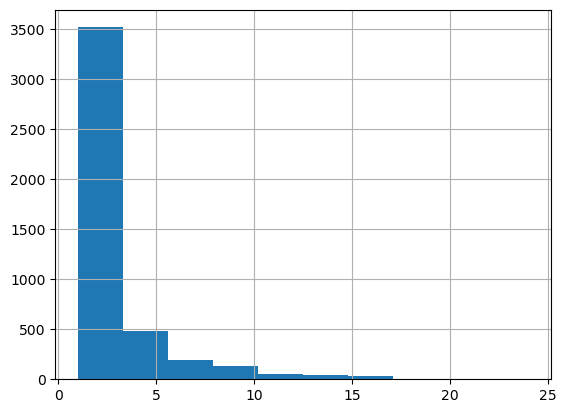

In [86]:
df.pos.hist()

<Axes: >

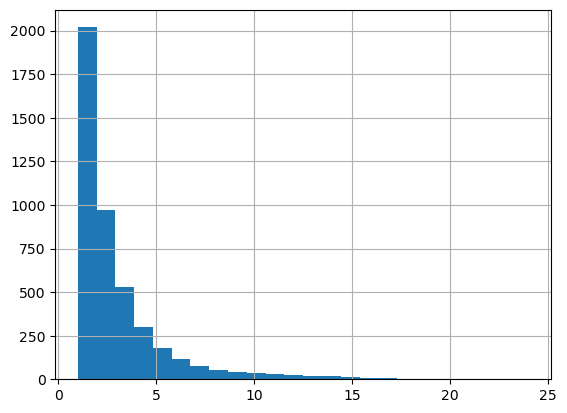

In [87]:
df.pos.hist(bins=24)

<Axes: >

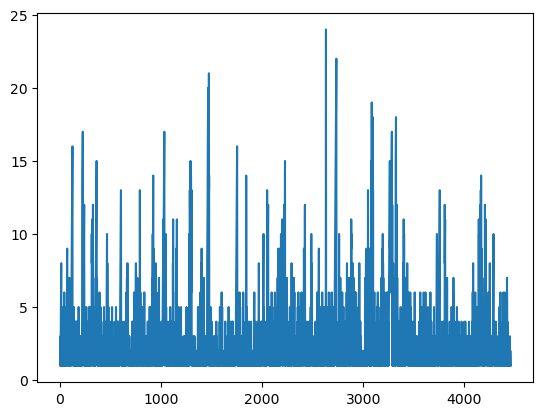

In [88]:
df.pos.plot()

In [89]:
import seaborn as sns

<Axes: >

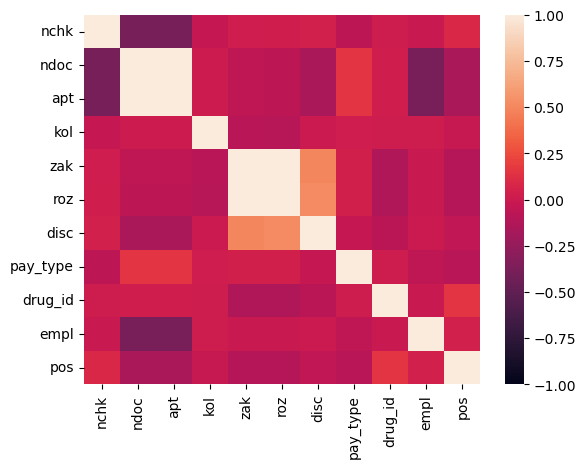

In [90]:
sns.heatmap(df.corr(numeric_only=True), vmax=1, vmin=-1)

<Axes: >

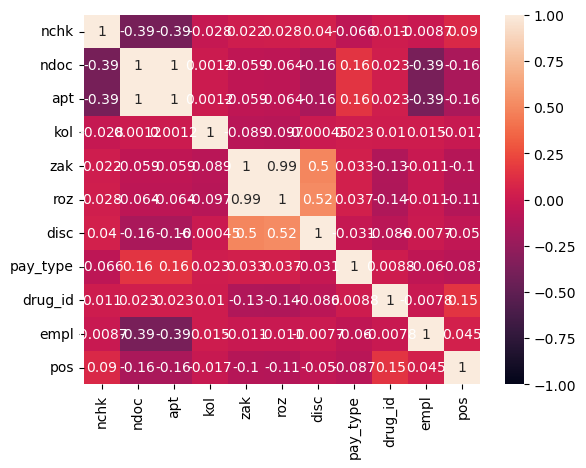

In [91]:
sns.heatmap(df.corr(numeric_only=True), vmax=1, vmin=-1, annot=True)

In [92]:
import matplotlib as plt

<Axes: >

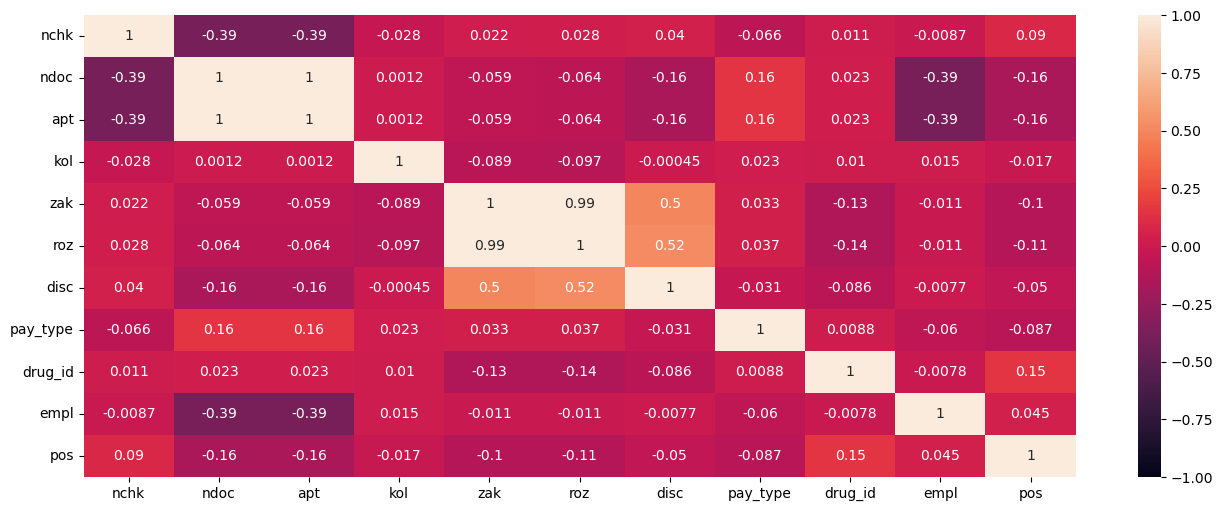

In [93]:
plt.pyplot.figure(figsize=(16,6))
sns.heatmap(df.corr(numeric_only=True), vmax=1, vmin=-1, annot=True)

In [94]:
plt.rcParams['figure.figsize'] = (16, 6)

<Axes: >

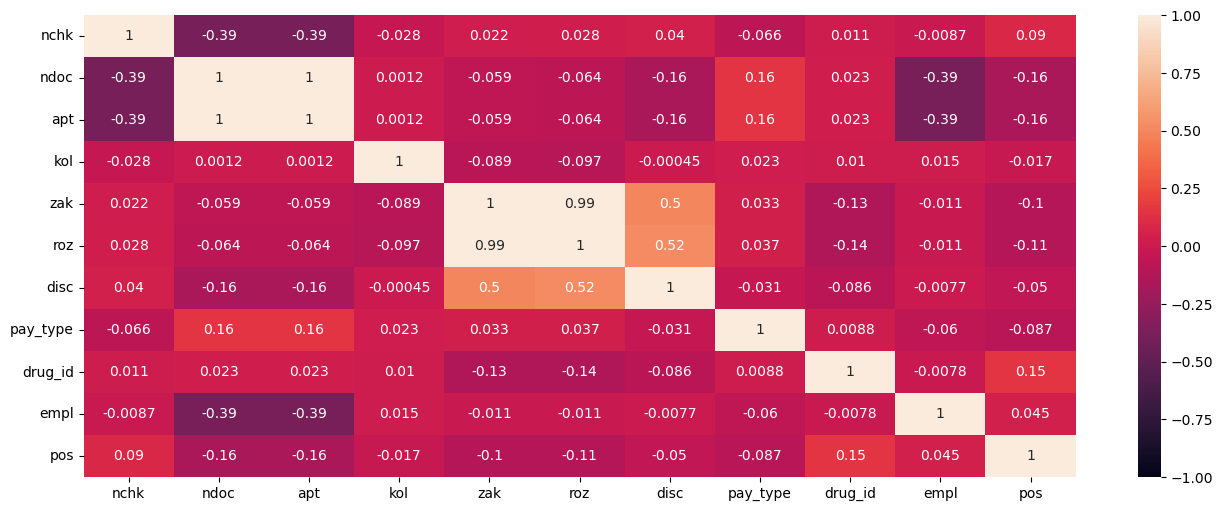

In [95]:
sns.heatmap(df.corr(numeric_only=True), vmax=1, vmin=-1, annot=True)

## Создание вычислимых столбцов, оценка распределений с box plot

In [96]:
df.c_time

0       10:15:35
1       10:27:46
2       10:27:46
3       10:27:46
4       10:33:56
          ...   
4457    21:40:17
4458    21:40:59
4459    21:43:48
4460    21:44:46
4461    21:46:08
Name: c_time, Length: 4462, dtype: object

In [97]:
df['hour'] = pd.to_datetime(df.c_time).dt.hour

/var/folders/2b/mnj6w0nn13b3lrzf9wf2gz4m0000gn/T/ipykernel_1155/2984645179.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df.c_time).dt.hour
/var/folders/2b/mnj6w0nn13b3lrzf9wf2gz4m0000gn/T/ipykernel_1155/2984645179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = pd.to_datetime(df.c_time).dt.hour


In [98]:
df.head(5)

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,auppl,disc_id,disc_barcode,empl,vzak,pos,hour
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,Обычный,1.00,10
1,11.08.2022,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9,200010010204,205,Обычный,1.00,10
2,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9,200010010204,205,Обычный,2.00,10
3,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9,200010010204,205,Обычный,3.00,10
4,11.08.2022,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,Обычный,1.00,10


In [99]:
gr = df.groupby(['hour'])['kol'].agg('sum')
gr

hour
8     20.10
9    236.50
10   361.65
11   326.55
12   311.59
13   422.80
14   358.30
15   432.97
16   375.88
17   375.45
18   457.50
19   419.29
20   388.57
21    97.71
22     1.00
Name: kol, dtype: float64

In [100]:
df.groupby(['hour'])['kol'].agg('sum').index

Index([8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], dtype='int32', name='hour')

<Axes: ylabel='kol'>

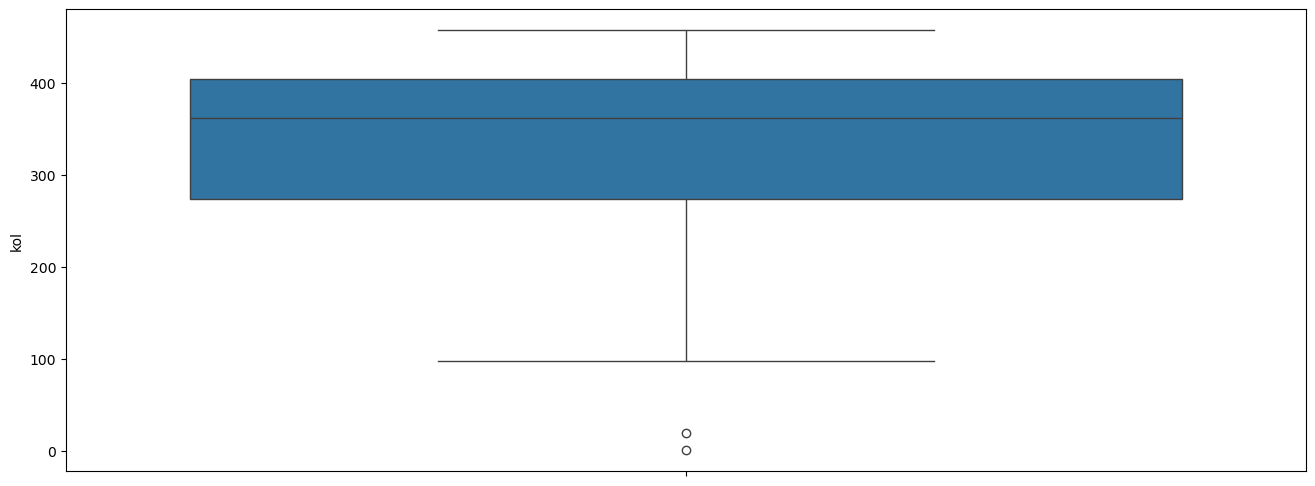

In [101]:
sns.boxplot(gr)

## Группировка данных

In [102]:
df.head(1)

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,auppl,disc_id,disc_barcode,empl,vzak,pos,hour
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,Обычный,1.00,10


In [103]:
a = df.groupby(['dt', 'nchk'])[['kol', 'roz', 'zak']].agg({
    'kol': 'sum',
    'roz': ['sum', 'max'],
    'zak': 'sum'
})
a

kol     roz           zak
                  sum     sum    max    sum
dt         nchk                            
11.08.2022 1698  1.00  463.00 463.00 342.30
           1699  1.00  720.00 720.00 545.27
           1700  1.00   60.00  60.00  36.68
           1701  4.00  955.00 443.00 756.12
           1702  1.00   94.00  94.00  76.55
...               ...     ...    ...    ...
12.08.2022 8486  1.00  460.00 460.00 302.07
           8487  1.00  476.00 476.00 396.66
           8488  1.00  220.00 220.00 187.84
           8489 18.00 1089.00 180.00 778.61
           8490  3.00  869.00 775.00 626.13

[1941 rows x 4 columns]

In [104]:
a.index

MultiIndex([('11.08.2022', 1698),
            ('11.08.2022', 1699),
            ('11.08.2022', 1700),
            ('11.08.2022', 1701),
            ('11.08.2022', 1702),
            ('11.08.2022', 1703),
            ('11.08.2022', 1704),
            ('11.08.2022', 1705),
            ('11.08.2022', 1706),
            ('11.08.2022', 1707),
            ...
            ('12.08.2022', 8481),
            ('12.08.2022', 8482),
            ('12.08.2022', 8483),
            ('12.08.2022', 8484),
            ('12.08.2022', 8485),
            ('12.08.2022', 8486),
            ('12.08.2022', 8487),
            ('12.08.2022', 8488),
            ('12.08.2022', 8489),
            ('12.08.2022', 8490)],
           names=['dt', 'nchk'], length=1941)

In [105]:
a.reset_index()

dt  nchk   kol     roz           zak
                         sum     sum    max    sum
0     11.08.2022  1698  1.00  463.00 463.00 342.30
1     11.08.2022  1699  1.00  720.00 720.00 545.27
2     11.08.2022  1700  1.00   60.00  60.00  36.68
3     11.08.2022  1701  4.00  955.00 443.00 756.12
4     11.08.2022  1702  1.00   94.00  94.00  76.55
...          ...   ...   ...     ...    ...    ...
1936  12.08.2022  8486  1.00  460.00 460.00 302.07
1937  12.08.2022  8487  1.00  476.00 476.00 396.66
1938  12.08.2022  8488  1.00  220.00 220.00 187.84
1939  12.08.2022  8489 18.00 1089.00 180.00 778.61
1940  12.08.2022  8490  3.00  869.00 775.00 626.13

[1941 rows x 6 columns]

In [106]:
a.reset_index().dt

0       11.08.2022
1       11.08.2022
2       11.08.2022
3       11.08.2022
4       11.08.2022
           ...    
1936    12.08.2022
1937    12.08.2022
1938    12.08.2022
1939    12.08.2022
1940    12.08.2022
Name: dt, Length: 1941, dtype: object

In [107]:
b = df.groupby(['dt', 'empl'])[['zak', 'roz']].agg('sum')
b

zak       roz
dt         empl                   
11.08.2022 25   72004.24  93030.00
           30   90350.41 111916.97
           36   62425.32  77368.03
           47   68458.33  86626.01
           50   72304.41  90830.01
           53   37727.08  48746.00
           54   52880.81  67517.08
           123  88926.21 116678.03
           205  49904.42  59471.00
           605  28699.65  36954.01
12.08.2022 37   92688.93 118091.37
           48   72773.60  93032.02
           54   65852.52  83229.05
           110  89126.47 113275.05
           123  99298.80 124231.66
           205  34772.17  44595.01

In [108]:
b['revenue'] = b['roz'] - b['zak']

In [109]:
b

zak       roz  revenue
dt         empl                            
11.08.2022 25   72004.24  93030.00 21025.76
           30   90350.41 111916.97 21566.56
           36   62425.32  77368.03 14942.71
           47   68458.33  86626.01 18167.68
           50   72304.41  90830.01 18525.60
           53   37727.08  48746.00 11018.92
           54   52880.81  67517.08 14636.27
           123  88926.21 116678.03 27751.82
           205  49904.42  59471.00  9566.58
           605  28699.65  36954.01  8254.36
12.08.2022 37   92688.93 118091.37 25402.44
           48   72773.60  93032.02 20258.42
           54   65852.52  83229.05 17376.53
           110  89126.47 113275.05 24148.58
           123  99298.80 124231.66 24932.86
           205  34772.17  44595.01  9822.84

In [110]:
c = df.groupby(['dt', 'empl'])[['zak', 'roz']].apply(lambda x: sum(x['roz'] - x['zak']))
c

dt          empl
11.08.2022  25     21025.76
            30     21566.56
            36     14942.71
            47     18167.68
            50     18525.60
            53     11018.92
            54     14636.27
            123    27751.82
            205     9566.58
            605     8254.36
12.08.2022  37     25402.44
            48     20258.42
            54     17376.53
            110    24148.58
            123    24932.86
            205     9822.84
dtype: float64

In [111]:
c = df.groupby(['dt', 'empl'])[['zak', 'roz', 'kol']].apply(lambda x: sum(x['kol'] * (x['roz'] - x['zak'])))
c

dt          empl
11.08.2022  25     20642.29
            30     20328.67
            36     14090.04
            47     16983.79
            50     17384.41
            53     10056.40
            54     13981.47
            123    23756.34
            205     9724.19
            605     8341.71
12.08.2022  37     22613.80
            48     19244.82
            54     16801.83
            110    22711.32
            123    23167.41
            205     8873.30
dtype: float64

## Оценка связи переменных с разбивкой

In [112]:
import numpy as np

In [113]:
df.groupby(['dt', 'drug'])[['roz', 'kol']].agg({
    'roz': np.mean,
    'kol': sum
})

/var/folders/2b/mnj6w0nn13b3lrzf9wf2gz4m0000gn/T/ipykernel_1155/3510067344.py:1: FutureWarning: The provided callable <function mean at 0x1069f5940> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['dt', 'drug'])[['roz', 'kol']].agg({
/var/folders/2b/mnj6w0nn13b3lrzf9wf2gz4m0000gn/T/ipykernel_1155/3510067344.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby(['dt', 'drug'])[['roz', 'kol']].agg({


roz  kol
dt         drug                                                           
11.08.2022 911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ ОКОПНИК 100МЛ. ТУБА     111.00 1.00
           911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ САБЕЛЬНИК 100МЛ.        104.00 1.00
           L-ТИРОКСИН 150МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/          170.00 1.00
           L-ТИРОКСИН 50МКГ. №50 ТАБ. /БЕРЛИН ХЕМИ/             93.00 1.00
           ZD ТЕЙМУРОВА СПРЕЙ Д/НОГ П/ПОТА И ЗАПАХА 150МЛ....   96.00 1.00
...                                                               ...  ...
12.08.2022 ЭУФИЛЛИН 150МГ. №30 ТАБ. /ФАРМСТАНДАРТ/              31.00 2.00
           ЮНИЭНЗИМ С МПС №20 ТАБ. П/О                         141.00 1.00
           Я ЗАБОЧУСЬ О ЗДОРОВЬЕ ТРАВЯН.КОФЕ КОФЕЙНЫЙ НАПИ...  145.00 1.00
           ЯНТАРНАЯ К-ТА ФОРП 100МГ. №10 ТАБ.                   14.00 2.00
           ЯРИНА №21 ТАБ. П/П/О                               1292.00 1.00

[2304 rows x 2 columns]

In [114]:
df.groupby(['dt', 'drug'])[['roz', 'kol']].agg({
    'roz': np.mean,
    'kol': sum
})

/var/folders/2b/mnj6w0nn13b3lrzf9wf2gz4m0000gn/T/ipykernel_1155/3510067344.py:1: FutureWarning: The provided callable <function mean at 0x1069f5940> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(['dt', 'drug'])[['roz', 'kol']].agg({
/var/folders/2b/mnj6w0nn13b3lrzf9wf2gz4m0000gn/T/ipykernel_1155/3510067344.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby(['dt', 'drug'])[['roz', 'kol']].agg({


roz  kol
dt         drug                                                           
11.08.2022 911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ ОКОПНИК 100МЛ. ТУБА     111.00 1.00
           911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ САБЕЛЬНИК 100МЛ.        104.00 1.00
           L-ТИРОКСИН 150МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/          170.00 1.00
           L-ТИРОКСИН 50МКГ. №50 ТАБ. /БЕРЛИН ХЕМИ/             93.00 1.00
           ZD ТЕЙМУРОВА СПРЕЙ Д/НОГ П/ПОТА И ЗАПАХА 150МЛ....   96.00 1.00
...                                                               ...  ...
12.08.2022 ЭУФИЛЛИН 150МГ. №30 ТАБ. /ФАРМСТАНДАРТ/              31.00 2.00
           ЮНИЭНЗИМ С МПС №20 ТАБ. П/О                         141.00 1.00
           Я ЗАБОЧУСЬ О ЗДОРОВЬЕ ТРАВЯН.КОФЕ КОФЕЙНЫЙ НАПИ...  145.00 1.00
           ЯНТАРНАЯ К-ТА ФОРП 100МГ. №10 ТАБ.                   14.00 2.00
           ЯРИНА №21 ТАБ. П/П/О                               1292.00 1.00

[2304 rows x 2 columns]

In [115]:
df['rroz'] = df.roz.apply(lambda x: round(x, -2))
df

/var/folders/2b/mnj6w0nn13b3lrzf9wf2gz4m0000gn/T/ipykernel_1155/1037134761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rroz'] = df.roz.apply(lambda x: round(x, -2))


,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,auppl,disc_id,disc_barcode,empl,vzak,pos,hour,rroz
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,Обычный,1.00,10,100.00
1,11.08.2022,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9,200010010204,205,Обычный,1.00,10,0.00
2,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9,200010010204,205,Обычный,2.00,10,200.00
3,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9,200010010204,205,Обычный,3.00,10,200.00
4,11.08.2022,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,Обычный,1.00,10,800.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,12.08.2022,21:40:17,5690,18002542,18,КЕТОРОЛ ЭКСПРЕСС 10МГ. №20 ТАБ. ДИСПЕРГ. /Д-Р ...,1.00,47.88,75.00,0.00,18,463100,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,nan,nan,48,Обычный,1.00,21,100.00
4458,12.08.2022,21:40:59,5691,18002542,18,АНТИПОЛИЦАЙ ВАЙТ №6 ТАБ.,1.00,59.51,93.00,0.00,18,112158,Протек,nan,nan,48,Обычный,1.00,21,100.00
4459,12.08.2022,21:43:48,5692,18002542,18,СИЛДЕНАФИЛ-СЗ 50МГ. №10 ТАБ. П/П/О /СЕВЕРНАЯ З...,1.00,297.74,396.00,0.00,18,260990,Авеста,nan,nan,48,Обычный,1.00,21,400.00
4460,12.08.2022,21:44:46,5693,18002542,18,ТОБРАЗОН 5МЛ. ГЛ.КАПЛИ ФЛ.,1.00,322.06,419.00,0.00,18,41512,Катрен г.Химки,nan,nan,48,Обычный,1.00,21,400.00


In [116]:
d = df.groupby(['dt', 'rroz'])['kol'].agg('sum').reset_index()
d

,dt,rroz,kol
0,11.08.2022,0.00,770.00
1,11.08.2022,100.00,742.00
2,11.08.2022,200.00,328.43
3,11.08.2022,300.00,196.20
4,11.08.2022,400.00,133.00
...,...,...,...
68,12.08.2022,4400.00,1.00
69,12.08.2022,5000.00,1.00
70,12.08.2022,5800.00,1.00
71,12.08.2022,10200.00,1.00


<Axes: xlabel='rroz', ylabel='kol'>

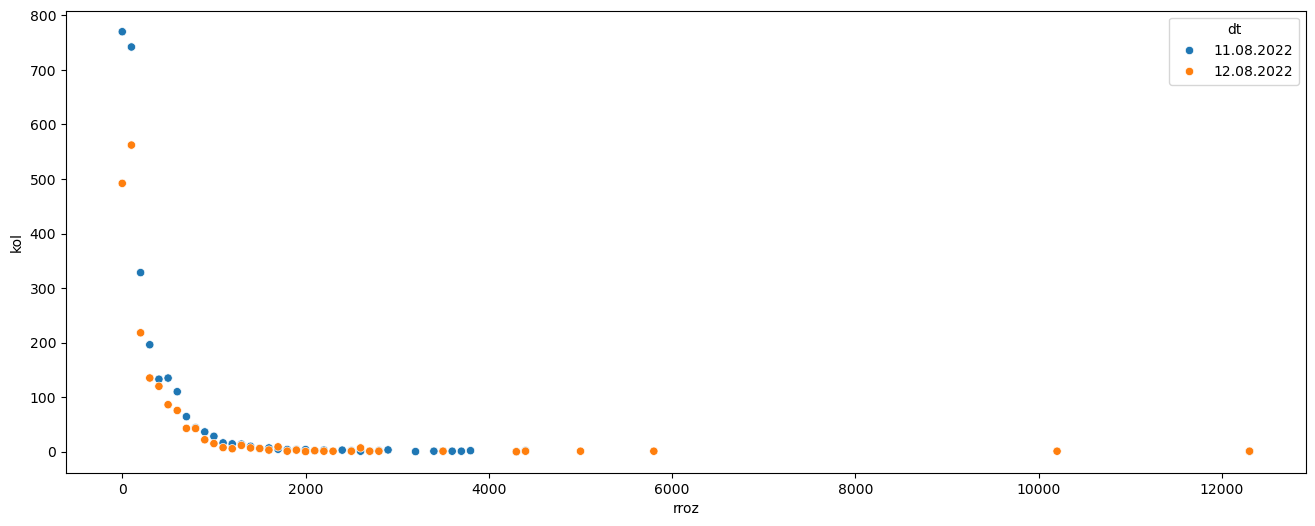

In [117]:
sns.scatterplot(data=d, x='rroz', y='kol', hue='dt')

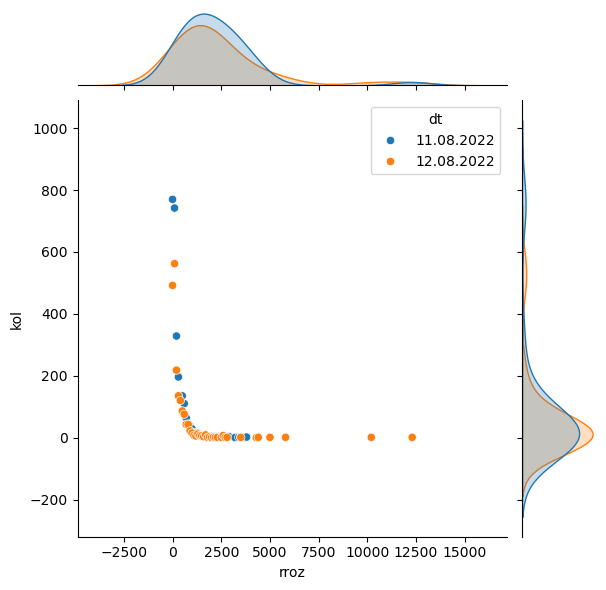

In [118]:
sns.jointplot(data=d, x='rroz', y='kol', hue='dt')

<Axes: xlabel='rroz', ylabel='kol'>

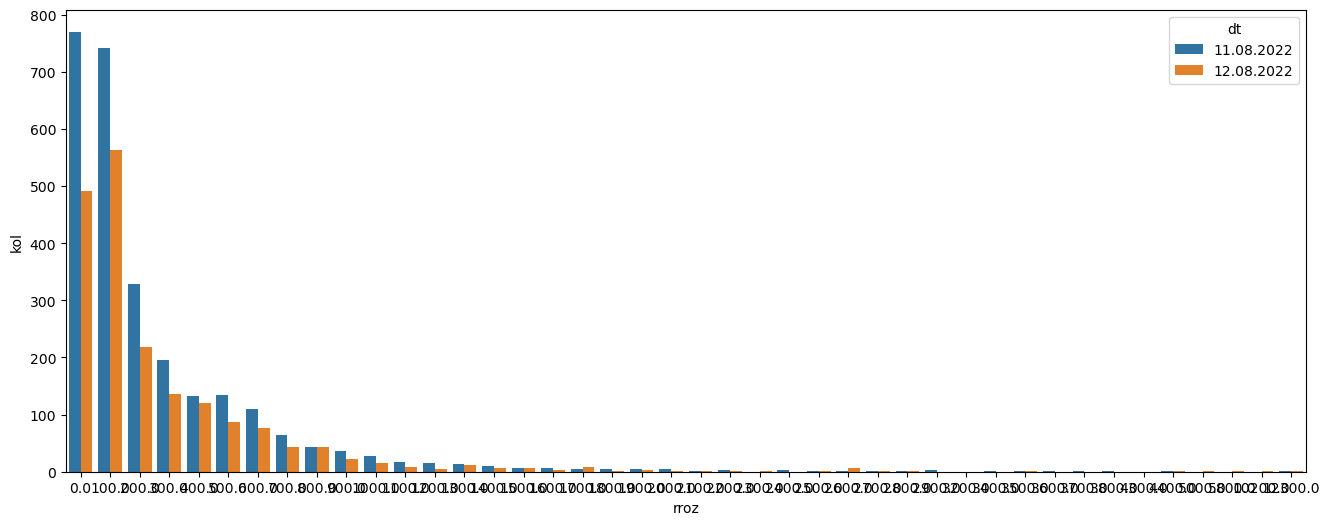

In [119]:
sns.barplot(
    data= d,
    x='rroz',
    y='kol', hue='dt')

## С доп фильтрацией

<Axes: xlabel='rroz', ylabel='kol'>

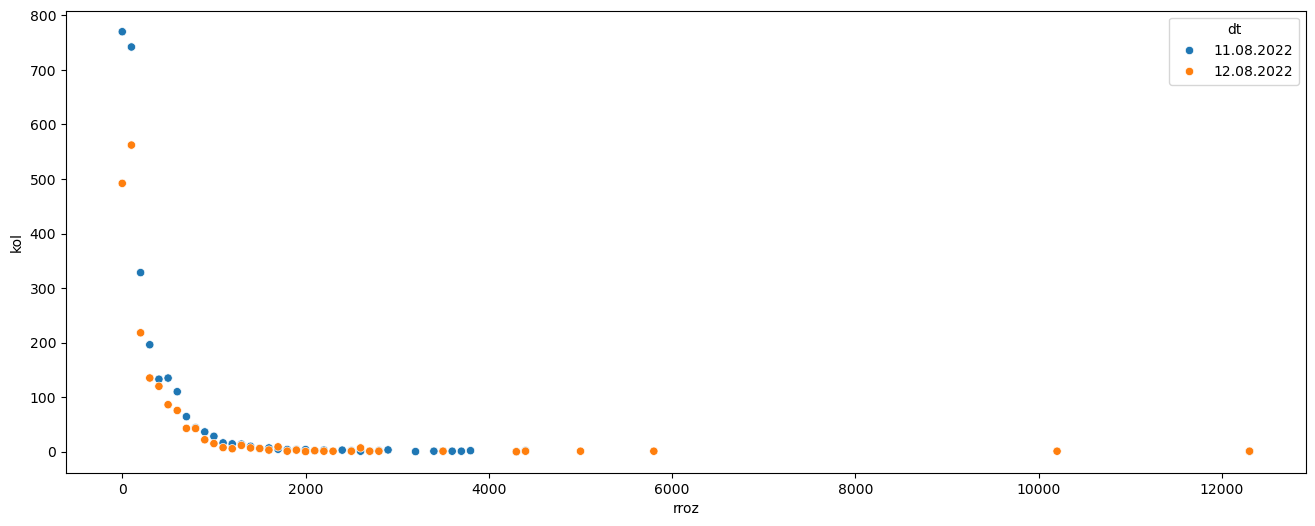

In [120]:
sns.scatterplot(data=d, x='rroz', y='kol', hue='dt')

In [121]:
d_new = d[d.loc[:, 'rroz'] < 2000]
d_new

,dt,rroz,kol
0,11.08.2022,0.00,770.00
1,11.08.2022,100.00,742.00
2,11.08.2022,200.00,328.43
3,11.08.2022,300.00,196.20
4,11.08.2022,400.00,133.00
5,11.08.2022,500.00,135.10
6,11.08.2022,600.00,110.10
7,11.08.2022,700.00,64.36
8,11.08.2022,800.00,44.12
9,11.08.2022,900.00,36.38


<Axes: xlabel='rroz', ylabel='kol'>

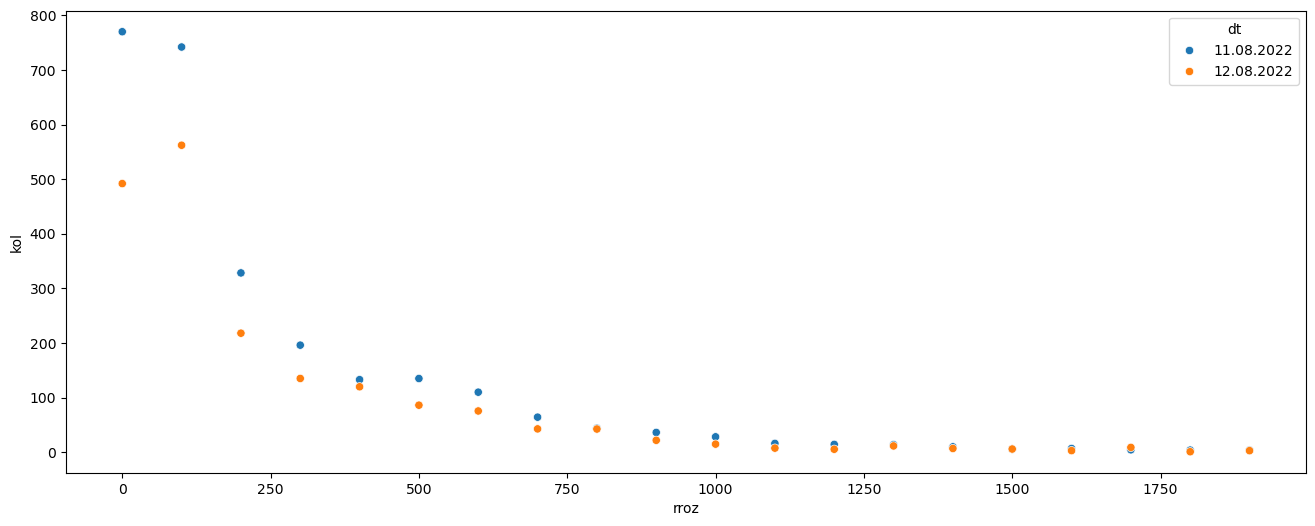

In [122]:
sns.scatterplot(data=d_new, x='rroz', y='kol', hue='dt')

## Группировка по нескольким столбцам

In [123]:
df.groupby(['dt', 'apt', 'empl', 'pay_type']).agg({'kol': 'sum'})

kol
dt         apt empl pay_type       
11.08.2022 2   123  15       151.05
                    18       164.13
               205  15        65.11
                    18        66.00
           6   25   15        95.00
                    18       142.53
           7   605  15        67.04
                    18       101.85
           11  30   15       179.00
                    18       310.48
           13  50   15       180.40
                    18       151.78
           15  53   15        51.98
                    18       142.10
           17  36   15        54.73
                    18       186.94
           18  47   15        89.04
                    18       236.24
               54   15        65.10
                    18       198.77
12.08.2022 2   123  15       210.50
                    18       152.72
               205  15        88.41
                    18        80.19
           6   37   15        72.92
                    18       207.89
           11  110  15        91.67
                    18       363.08
           18  48   15       134.79
                    18       222.65
               54   15        64.10
                    18       197.65

In [124]:
a_6 = df.groupby(['dt', 'apt', 'empl', 'pay_type']).agg({'kol': 'sum'}).reset_index()
a_6

,dt,apt,empl,pay_type,kol
0,11.08.2022,2,123,15,151.05
1,11.08.2022,2,123,18,164.13
2,11.08.2022,2,205,15,65.11
3,11.08.2022,2,205,18,66.00
4,11.08.2022,6,25,15,95.00
5,11.08.2022,6,25,18,142.53
6,11.08.2022,7,605,15,67.04
7,11.08.2022,7,605,18,101.85
8,11.08.2022,11,30,15,179.00
9,11.08.2022,11,30,18,310.48


In [125]:
a_6.pivot_table(values='kol', index=['dt', 'apt', 'empl'], columns=['pay_type'])

pay_type                15     18
dt         apt empl              
11.08.2022 2   123  151.05 164.13
               205   65.11  66.00
           6   25    95.00 142.53
           7   605   67.04 101.85
           11  30   179.00 310.48
           13  50   180.40 151.78
           15  53    51.98 142.10
           17  36    54.73 186.94
           18  47    89.04 236.24
               54    65.10 198.77
12.08.2022 2   123  210.50 152.72
               205   88.41  80.19
           6   37    72.92 207.89
           11  110   91.67 363.08
           18  48   134.79 222.65
               54    64.10 197.65

In [126]:
с_6 = df.pivot_table(values='roz', index=['dt', 'apt', 'empl'], columns=['pay_type'], aggfunc='sum')
с_6

pay_type                  15       18
dt         apt empl                  
11.08.2022 2   123  55981.01 60697.02
               205  27403.00 32068.00
           6   25   27402.00 65628.00
           7   605  17618.00 19336.01
           11  30   38692.32 73224.65
           13  50   44746.00 46084.01
           15  53   20155.00 28591.00
           17  36   20890.00 56478.03
           18  47   25685.01 60941.00
               54   12118.00 55399.08
12.08.2022 2   123  48816.00 75415.66
               205  16604.00 27991.01
           6   37   37812.00 80279.37
           11  110  14770.03 98505.02
           18  48   37226.00 55806.02
               54   14297.00 68932.05

In [127]:
pd.melt(с_6.reset_index(), id_vars=['dt', 'apt', 'empl'], value_vars=[15, 18], var_name='p_type')

,dt,apt,empl,p_type,value
0,11.08.2022,2,123,15,55981.01
1,11.08.2022,2,205,15,27403.00
2,11.08.2022,6,25,15,27402.00
3,11.08.2022,7,605,15,17618.00
4,11.08.2022,11,30,15,38692.32
5,11.08.2022,13,50,15,44746.00
6,11.08.2022,15,53,15,20155.00
7,11.08.2022,17,36,15,20890.00
8,11.08.2022,18,47,15,25685.01
9,11.08.2022,18,54,15,12118.00


## Индексация строк/столбцов, фильтрация, перекодировка

In [128]:
df[['zak', 'roz']]

,zak,roz
0,41.08,51.00
1,18.61,31.00
2,132.69,209.00
3,133.65,210.00
4,709.95,787.00
...,...,...
4457,47.88,75.00
4458,59.51,93.00
4459,297.74,396.00
4460,322.06,419.00


In [129]:
df.zak

0       41.08
1       18.61
2      132.69
3      133.65
4      709.95
        ...  
4457    47.88
4458    59.51
4459   297.74
4460   322.06
4461   238.62
Name: zak, Length: 4462, dtype: float64

In [130]:
df.head(1)

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,auppl,disc_id,disc_barcode,empl,vzak,pos,hour,rroz
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,Обычный,1.00,10,100.00


In [131]:
df.iloc[2, 5] 
# 3 строка и 6 столбец

'СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ 125МЛ.'

In [132]:
df.iloc[:5, 5]
# все строки до 5 и 6 столбец

0    ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...
1              ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.
2    СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...
3    СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...
4                     ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/
Name: drug, dtype: object

In [133]:
df.iloc[:5, :5]
# все строки до 5 и все столбцы с 0 по 5

,dt,c_time,nchk,ndoc,apt
0,11.08.2022,10:15:35,2173,2004598,2
1,11.08.2022,10:27:46,2174,2004598,2
2,11.08.2022,10:27:46,2174,2004598,2
3,11.08.2022,10:27:46,2174,2004598,2
4,11.08.2022,10:33:56,2175,2004598,2


In [134]:
df.iloc[:5, 1:5]
# все строки до 5 и столбцы с 1 до 5

,c_time,nchk,ndoc,apt
0,10:15:35,2173,2004598,2
1,10:27:46,2174,2004598,2
2,10:27:46,2174,2004598,2
3,10:27:46,2174,2004598,2
4,10:33:56,2175,2004598,2


In [135]:
df.loc[2:5, 'zak']

2   132.69
3   133.65
4   709.95
5   152.90
Name: zak, dtype: float64

In [136]:
df.loc[2:5, ['zak', 'roz']]

,zak,roz
2,132.69,209.00
3,133.65,210.00
4,709.95,787.00
5,152.90,182.00


In [137]:
df.at[2, 'zak']

np.float64(132.69)

In [138]:
df.iat[2, 5]

'СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ 125МЛ.'

In [139]:
df['kol'] > 5

0       False
1       False
2       False
3       False
4       False
        ...  
4457    False
4458    False
4459    False
4460    False
4461    False
Name: kol, Length: 4462, dtype: bool

In [140]:
df[df['kol'] > 5]

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,auppl,disc_id,disc_barcode,empl,vzak,pos,hour,rroz
202,11.08.2022,14:03:40,4206,7002453,7,АСКОРБИНОВАЯ К-ТА 25МГ. №10 ТАБ. КРУТКА САХ. /...,7.00,4.98,9.00,0.00,18,564894,Катрен г.Химки,nan,nan,605,Обычный,1.00,14,0.00
698,11.08.2022,18:40:22,1773,15002523,15,"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/",6.00,16.05,22.00,0.00,18,496504,Катрен г.Химки,nan,nan,53,Обычный,2.00,18,0.00
699,11.08.2022,19:44:25,1787,15002523,15,"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/",10.00,16.05,22.00,0.00,18,496504,Катрен г.Химки,nan,nan,53,Обычный,1.00,19,0.00
834,11.08.2022,10:36:28,8277,2004595,2,"СФМ СИСТЕМА Д/ПЕРЕЛ. Р-РОВ ИГЛА G21 0,8Х40ММ №...",10.00,25.61,42.00,0.00,18,419205,Арал плюс,nan,nan,123,Обычный,6.00,10,0.00
1151,11.08.2022,13:10:36,5115,6003620,6,СФМ СИСТЕМА Д/ПЕРЕЛИВ. ИНФУЗ. Р-РОВ №1 ПЛАСТ.И...,10.00,29.80,52.00,62.00,15,422260,Пульс,35,200000000022,25,Обычный,9.00,13,100.00
2256,11.08.2022,11:27:32,4672,11007004,11,"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /СЛАВ...",20.00,5.74,8.00,0.00,18,348186,Норман,nan,nan,30,Обычный,1.00,11,0.00
2495,11.08.2022,18:13:44,4778,11007004,11,"ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 2,5Х7,2 №1 /ВЕРОФАРМ/",8.00,1.98,4.00,0.00,18,33001,ВИТТА КОМПАНИ ООО,nan,nan,30,Обычный,2.00,18,0.00
2497,11.08.2022,19:36:44,4805,11007004,11,"ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 2,5Х7,2 №1 /ВЕРОФАРМ/",8.00,1.98,4.00,0.00,18,33001,ВИТТА КОМПАНИ ООО,nan,nan,30,Обычный,1.00,19,0.00
2595,12.08.2022,10:26:56,2236,2004623,2,ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 6X10 №1 /ВЕРОФАРМ/,9.00,6.19,11.00,9.00,15,81988,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,9,200010021585,205,Обычный,2.00,10,0.00
3468,12.08.2022,19:24:24,5007,11007039,11,"ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 2,5Х7,2 №1 /ВЕРОФАРМ/",8.00,1.98,4.00,0.00,18,33001,ВИТТА КОМПАНИ ООО,nan,nan,110,Обычный,2.00,19,0.00


In [141]:
df[(df['kol'] > 5) | (df['roz'] > 2000)]

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,auppl,disc_id,disc_barcode,empl,vzak,pos,hour,rroz
27,11.08.2022,11:50:16,2184,2004598,2,АКАТИНОЛ МЕМАНТИН 20МГ. №28 ТАБ. П/П/О /МЕРЦ Ф...,1.00,2545.84,2824.00,141.00,15,153467,ВИТТА КОМПАНИ ООО,9,200010014079,205,Обычный,1.00,11,2800.00
29,11.08.2022,11:50:16,2184,2004598,2,ПРАДАКСА 110МГ. №60 КАПС. /БЕРИНГЕР/,1.00,3076.03,3432.00,171.00,15,154600,Протек,9,200010014079,205,Обычный,5.00,11,3400.00
45,11.08.2022,13:10:54,2192,2004598,2,ЦЕФАЛИ АППАРАТ Д/ТЕРАПИИ МИГРЕНИ С ПРИНАДЛ.,1.00,11851.13,12345.00,0.00,18,455413,Протек,nan,nan,205,Интернет,1.00,13,12300.00
62,11.08.2022,14:47:12,2201,2004598,2,ДЖАРДИНС 10МГ. №30 ТАБ. П/П/О /БЕРИНГЕР/,1.00,2669.94,2945.00,147.00,15,296849,Катрен г.Химки,9,200010024690,205,Обычный,1.00,14,2900.00
65,11.08.2022,14:52:33,2203,2004598,2,"АКСАМОН 15МГ/МЛ. 1МЛ. №10 Р-Р Д/В/М,П/К АМП.",1.00,1559.37,2106.00,147.00,15,254247,Здравсервис,9,200010018590,205,Обычный,1.00,14,2100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,12.08.2022,16:33:37,4368,18002543,18,КРЕСТОР 5МГ. №28 ТАБ. П/П/О,1.00,1848.83,2275.00,0.00,18,151718,Фармкомплект ООО,nan,nan,54,Обычный,1.00,16,2300.00
3983,12.08.2022,17:02:34,4375,18002543,18,СОЛГАР ТРОЙНАЯ ОМЕГА-3 ЭПК/ДГК 950МГ. №50 КАПС...,1.00,1944.66,2529.00,0.00,18,168640,Здравсервис,nan,nan,54,Обычный,3.00,17,2500.00
4057,12.08.2022,19:29:31,4422,18002543,18,СОЛКОСЕРИЛ 20Г. ГЕЛЬ Д/НАРУЖ.ПРИМ. ТУБА,1.00,3778.85,4422.00,0.00,18,1131,Авеста,nan,nan,54,Обычный,3.00,19,4400.00
4058,12.08.2022,19:29:31,4422,18002543,18,ВИАГРА 100МГ. №12 ТАБ. П/П/О,1.00,8706.40,10187.00,0.00,18,353730,ГК Надежда Фарм,nan,nan,54,Обычный,1.00,19,10200.00


In [142]:
df[(df['kol'] > 5) & (df['roz'] > 50)]

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,auppl,disc_id,disc_barcode,empl,vzak,pos,hour,rroz
1151,11.08.2022,13:10:36,5115,6003620,6,СФМ СИСТЕМА Д/ПЕРЕЛИВ. ИНФУЗ. Р-РОВ №1 ПЛАСТ.И...,10.00,29.80,52.00,62.00,15,422260,Пульс,35,200000000022,25,Обычный,9.00,13,100.00


In [143]:
df.pay_type

0       18
1       15
2       15
3       15
4       18
        ..
4457    18
4458    18
4459    18
4460    18
4461    15
Name: pay_type, Length: 4462, dtype: int64

In [144]:
df.loc[:, 'pay_type']

0       18
1       15
2       15
3       15
4       18
        ..
4457    18
4458    18
4459    18
4460    18
4461    15
Name: pay_type, Length: 4462, dtype: int64

In [145]:
df.loc[:, 'pay_type'].isin([15, 20])

0       False
1        True
2        True
3        True
4       False
        ...  
4457    False
4458    False
4459    False
4460    False
4461     True
Name: pay_type, Length: 4462, dtype: bool

In [146]:
df[df.loc[:, 'pay_type'].isin([15, 20])]

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,auppl,disc_id,disc_barcode,empl,vzak,pos,hour,rroz
1,11.08.2022,10:27:46,2174,2004598,2,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,18.61,31.00,3.00,15,261519,Катрен г.Химки,9,200010010204,205,Обычный,1.00,10,0.00
2,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,132.69,209.00,20.00,15,460864,Катрен г.Химки,9,200010010204,205,Обычный,2.00,10,200.00
3,11.08.2022,10:27:46,2174,2004598,2,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,133.65,210.00,21.00,15,172823,Катрен г.Химки,9,200010010204,205,Обычный,3.00,10,200.00
18,11.08.2022,11:23:22,2180,2004598,2,ЦИТРАМОН П №20 ТАБ. /ФАРМСТАНДАРТ/,1.00,43.31,66.00,4.00,15,393314,Катрен г.Химки,9,200010020147,205,Обычный,1.00,11,100.00
19,11.08.2022,11:23:22,2180,2004598,2,ЦИТРАМОН П №20 ТАБ. /ФАРМСТАНДАРТ/,1.00,42.08,64.00,4.00,15,393314,"ООО ""Акцентмед""",9,200010020147,205,Обычный,2.00,11,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,12.08.2022,21:31:20,5684,18002542,18,ИХТИОЛОВАЯ 20% 25Г. МАЗЬ Д/НАРУЖ.ПРИМ. ТУБА /У...,2.00,37.48,59.00,0.00,15,565799,Протек,nan,nan,48,Обычный,1.00,21,100.00
4453,12.08.2022,21:36:07,5687,18002542,18,"СНУП 0,1% 90МКГ/ДОЗА 15МЛ. НАЗАЛ.СПРЕЙ ФЛ. /ШТ...",1.00,102.45,120.00,6.00,15,72392,Пульс,9,200010027575,48,Обычный,1.00,21,100.00
4454,12.08.2022,21:38:35,5688,18002542,18,МАКСИКОЛД РИНО АПЕЛЬСИН 15Г. №10 ПОР. Д/Р-РА Д...,1.00,221.60,295.00,20.00,15,126129,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,9,200010027575,48,Обычный,1.00,21,300.00
4455,12.08.2022,21:38:35,5688,18002542,18,ЭДАС-306 ПАССАМБРА НЕВРОЗЫ 100МЛ. СИРОП ФЛ.,1.00,160.73,221.00,22.00,15,5852,Катрен г.Химки,9,200010027575,48,Обычный,2.00,21,200.00


In [147]:
df[~df.loc[:, 'pay_type'].isin([15, 20])]

,dt,c_time,nchk,ndoc,apt,drug,kol,zak,roz,disc,pay_type,drug_id,auppl,disc_id,disc_barcode,empl,vzak,pos,hour,rroz
0,11.08.2022,10:15:35,2173,2004598,2,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,41.08,51.00,12.00,18,45399,Катрен г.Химки,925,200000000492,205,Обычный,1.00,10,100.00
4,11.08.2022,10:33:56,2175,2004598,2,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,709.95,787.00,49.00,18,79056,Катрен г.Химки,925,200000000492,205,Обычный,1.00,10,800.00
5,11.08.2022,10:40:38,2176,2004598,2,БИСОПРОЛОЛ 5МГ. №60 ТАБ. П/П/О /ВЕРТЕКС/,1.00,152.90,182.00,9.00,18,187304,Пульс,9,200010001947,205,Обычный,1.00,10,200.00
6,11.08.2022,10:40:38,2176,2004598,2,ТРИХОПОЛ 250МГ. №20 ТАБ. /ПОЛЬФАРМА/,1.00,67.94,85.00,4.00,18,1261,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,9,200010001947,205,Обычный,2.00,10,100.00
7,11.08.2022,10:52:52,2177,2004598,2,НОРВАСК 5МГ. №30 ТАБ. /ПФАЙЗЕР/АПДЖОН/,1.00,157.76,189.00,9.00,18,2566,Катрен г.Химки,9,200010013331,205,Обычный,3.00,10,200.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4456,12.08.2022,21:39:23,5689,18002542,18,АЛЬБАДЕНТ ОСВЕЖИТЕЛЬ Д/РТА ЛИМОН 35МЛ. СПРЕЙ,1.00,62.34,97.00,0.00,18,28488,Здравсервис,nan,nan,48,Обычный,1.00,21,100.00
4457,12.08.2022,21:40:17,5690,18002542,18,КЕТОРОЛ ЭКСПРЕСС 10МГ. №20 ТАБ. ДИСПЕРГ. /Д-Р ...,1.00,47.88,75.00,0.00,18,463100,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,nan,nan,48,Обычный,1.00,21,100.00
4458,12.08.2022,21:40:59,5691,18002542,18,АНТИПОЛИЦАЙ ВАЙТ №6 ТАБ.,1.00,59.51,93.00,0.00,18,112158,Протек,nan,nan,48,Обычный,1.00,21,100.00
4459,12.08.2022,21:43:48,5692,18002542,18,СИЛДЕНАФИЛ-СЗ 50МГ. №10 ТАБ. П/П/О /СЕВЕРНАЯ З...,1.00,297.74,396.00,0.00,18,260990,Авеста,nan,nan,48,Обычный,1.00,21,400.00


In [148]:
df['vzak']

0       Обычный
1       Обычный
2       Обычный
3       Обычный
4       Обычный
         ...   
4457    Обычный
4458    Обычный
4459    Обычный
4460    Обычный
4461    Обычный
Name: vzak, Length: 4462, dtype: object

In [149]:
cd = {
    'Обычный': 'Simple',
    'Интернет': 'Web'
}

In [150]:
df['vzak'].map(cd)

0       Simple
1       Simple
2       Simple
3       Simple
4       Simple
         ...  
4457    Simple
4458    Simple
4459    Simple
4460    Simple
4461    Simple
Name: vzak, Length: 4462, dtype: object

# ДЗ 2

1. Создайте столбец weekday, в котором будет храниться день недели в русском варианте (Понедельник, Вторник, ...)
1. Создайте столбец date, в котором будет храниться дата регистрации пользователя (без времени)
1. Создайте датафрейм res, который получится в результате группировки исходного датафрейма по дням недели и расчета:
* Количества регистраций в этот день недели
* Количества уникальных дат, в которые были регистрации для этого дня недели
  
Важно: Столбец с днями недели должен быть не в индексе, а просто столбцом датафрейма

In [151]:
coderun = pd.read_csv(r'/Users/alex/Downloads/itresume-coderun.csv', encoding='1251')
coderun

,id,created_at,problem_id,user_id,language_id
0,1,2021-04-07 06:06:20.000,13,10,3
1,2,2021-03-31 07:10:06.000,15,13,3
2,3,2021-04-04 14:55:26.000,1,6,3
3,4,2021-03-29 21:24:51.000,26,4,3
4,5,2021-03-30 11:29:12.000,21,18,3
...,...,...,...,...,...
55717,55718,2022-05-17 09:00:51.743,101,171,2
55718,55719,2022-05-17 09:01:04.210,101,171,2
55719,55720,2022-05-17 09:02:06.203,101,171,2
55720,55721,2022-05-17 09:03:45.265,102,171,2


In [152]:
users_pd = pd.read_csv(r'/Users/alex/Downloads/itresume-users-pandas.csv', encoding='1251', sep=';', skiprows=1)
users_pd

,id,username,date_joined
0,416,nsosabisfsobm,2022-01-02 12:22:43
1,43,NbabnnbTona,2021-07-01 09:11:42
2,50,jbdn,2021-08-04 09:01:56
3,249,Kbaoxsnb,2021-11-27 07:03:35
4,77,bxakbasmo$$$,2021-11-09 14:31:46
...,...,...,...
95,946,Mbbn$xb$eo,2022-01-29 18:04:23
96,947,NaN,2022-01-29 18:31:26
97,1050,nsosabndsi,2022-02-01 21:02:59
98,1076,SbsdSaobdox,2022-02-02 19:31:21


In [153]:
res = users_pd.copy()
res

,id,username,date_joined
0,416,nsosabisfsobm,2022-01-02 12:22:43
1,43,NbabnnbTona,2021-07-01 09:11:42
2,50,jbdn,2021-08-04 09:01:56
3,249,Kbaoxsnb,2021-11-27 07:03:35
4,77,bxakbasmo$$$,2021-11-09 14:31:46
...,...,...,...
95,946,Mbbn$xb$eo,2022-01-29 18:04:23
96,947,NaN,2022-01-29 18:31:26
97,1050,nsosabndsi,2022-02-01 21:02:59
98,1076,SbsdSaobdox,2022-02-02 19:31:21


In [154]:
res['weekday'] = pd.to_datetime(res['date_joined']).dt.day_name()
res['date'] = pd.to_datetime(res['date_joined']).dt.date
res['weekday'] = res['weekday'].map(
        {'Monday': 'Понедельник', 
         'Tuesday': 'Вторник',
         'Wednesday': 'Среда',
         'Thursday': 'Четверг',
         'Friday': 'Пятница',
         'Saturday': 'Суббота',
         'Sunday': 'Воскресенье'})
res = res.groupby(['weekday']).agg({'date': ['count', 'nunique']}).reset_index()
res

weekday  date        
               count nunique
0  Воскресенье    11       6
1      Вторник    12       7
2  Понедельник    18       6
3      Пятница     9       6
4        Среда    19      11
5      Суббота    16       8
6      Четверг    15       7

In [155]:
res = users_pd.copy()
res

res['weekday'] = pd.to_datetime(res['date_joined']).dt.day_name().map(
        {'Monday': 'Понедельник', 
         'Tuesday': 'Вторник',
         'Wednesday': 'Среда',
         'Thursday': 'Четверг',
         'Friday': 'Пятница',
         'Saturday': 'Суббота',
         'Sunday': 'Воскресенье'})
res['date'] = pd.to_datetime(res['date_joined']).dt.date
res = res.groupby(['weekday'], as_index = False).agg({'date': ['count', 'nunique']})
res

weekday  date        
               count nunique
0  Воскресенье    11       6
1      Вторник    12       7
2  Понедельник    18       6
3      Пятница     9       6
4        Среда    19      11
5      Суббота    16       8
6      Четверг    15       7

1. Отфильтруйте только тех пользователей, у которых id >= 94. Пользователи с меньшим id - фейковые, они сбивают статистику.
2. Также уберите пользователей с одним из этих ников: 'fnoxonsnbkbxsnb', 'Jonns21241412', 'fbxbnsn'. Это также фейковые юзеры. \
Постарайтесь выполнить фильтрацию одним запросом, а не перезаписывать каждый раз датафрейм.
* Создайте столбец cohort, который будет содержать год и месяц регистрации в формате YYYY-MM.
Год и месяц регистрации пользователя - основной признак когорты, который мы используем при проведении когортного анализа
* Создайте переменную res, которая будет содержать долю каждой когорты в общем количестве зарегистрированных пользователей. В сумме все доли должны давать 100.

In [156]:
res = users_pd.copy()
res

,id,username,date_joined
0,416,nsosabisfsobm,2022-01-02 12:22:43
1,43,NbabnnbTona,2021-07-01 09:11:42
2,50,jbdn,2021-08-04 09:01:56
3,249,Kbaoxsnb,2021-11-27 07:03:35
4,77,bxakbasmo$$$,2021-11-09 14:31:46
...,...,...,...
95,946,Mbbn$xb$eo,2022-01-29 18:04:23
96,947,NaN,2022-01-29 18:31:26
97,1050,nsosabndsi,2022-02-01 21:02:59
98,1076,SbsdSaobdox,2022-02-02 19:31:21


In [157]:
res = res[(res['id'] >= 94) | (~res['username'].isin(['fnoxonsnbkbxsnb', 'Jonns21241412', 'fbxbnsn']))]
res['cohort'] = pd.to_datetime(res['date_joined']).dt.strftime('%Y-%m')
res = res.cohort.value_counts(normalize=True)*100
res

cohort
2021-11   40.00
2021-12   29.00
2022-01   24.00
2022-02    3.00
2022-04    2.00
2021-07    1.00
2021-08    1.00
Name: proportion, dtype: float64

Загрузите файл в датафрейм Pandas и назовите его coderun. 

1. Создайте столбец cohort, который будет содержать год и месяц регистрации в формате YYYY-MM. 
2. Создайте столбец language, который проводит соответствие между языком и language_id по правилу:
```
Python -> 3
SQL -> 2
```

3. А теперь давайте посчитаем - в скольких задачах в среднем один пользователь отправлял на выполнение код в каждой когорте по каждому языку. \
Примечание: Задача не может быть одновременно и на SQL, и на Python.

Результатом должна стать «широкая» таблица, где:
* строки - когорты, но только после января 2022 года (включительно)
* столбцы - языки
* значения - число задач, по которым пользователи в данной когорте отправляют код на выполнение по данному языку в среднем
* Результат сохраните в датафрейм df

In [158]:
df2 = coderun.copy()
df2

,id,created_at,problem_id,user_id,language_id
0,1,2021-04-07 06:06:20.000,13,10,3
1,2,2021-03-31 07:10:06.000,15,13,3
2,3,2021-04-04 14:55:26.000,1,6,3
3,4,2021-03-29 21:24:51.000,26,4,3
4,5,2021-03-30 11:29:12.000,21,18,3
...,...,...,...,...,...
55717,55718,2022-05-17 09:00:51.743,101,171,2
55718,55719,2022-05-17 09:01:04.210,101,171,2
55719,55720,2022-05-17 09:02:06.203,101,171,2
55720,55721,2022-05-17 09:03:45.265,102,171,2


In [159]:
df2 = coderun.copy()
df2['cohort'] = pd.to_datetime(df2['created_at']).dt.strftime('%Y-%m')
df2['language'] = df2['language_id'].map({3: 'Python', 2: 'SQL'})
df_final = df2[df2.cohort >= '2022-01']\
    .groupby(['user_id', 'cohort', 'language']).agg({'problem_id': 'nunique'}).reset_index()\
    .groupby(['cohort', 'language']).agg({'problem_id': 'mean'}).reset_index()\
    .pivot_table(values='problem_id', index=['cohort'], columns=['language'])
df_final 

language,Python,SQL
cohort,,
2022-01,3.43,6.76
2022-02,2.68,4.74
2022-03,2.33,5.28
2022-04,6.66,8.07
2022-05,5.83,10.45


В Pandas можно фильтровать датафрейм не только с помощью логической фильтрации df[(condition_1) & (condition_2)]. \
В Pandas также есть гибкий инструмент - функция query, которая позволяет писать интуитивные «запросы» к датафрейму, как мы это делаем в SQL.

Загрузите файл в датафрейм Pandas и назовите его coderun. Далее создайте 2 переменные:
1. problem_id - список задач, которые нужно исключить. Значения: 1, 2, 3, 13, 15, 26.
2. language_id - номер языка, который нужно оставить. Значение: 2.
3. С помощью query отфильтруйте coderun по этим двум переменным. Результат сохраните в датафрейм df.

In [160]:
df3 = coderun.copy()
df3

,id,created_at,problem_id,user_id,language_id
0,1,2021-04-07 06:06:20.000,13,10,3
1,2,2021-03-31 07:10:06.000,15,13,3
2,3,2021-04-04 14:55:26.000,1,6,3
3,4,2021-03-29 21:24:51.000,26,4,3
4,5,2021-03-30 11:29:12.000,21,18,3
...,...,...,...,...,...
55717,55718,2022-05-17 09:00:51.743,101,171,2
55718,55719,2022-05-17 09:01:04.210,101,171,2
55719,55720,2022-05-17 09:02:06.203,101,171,2
55720,55721,2022-05-17 09:03:45.265,102,171,2


In [161]:
bad_problems = [1, 2, 3, 13, 15, 26]
good_language = 2

In [162]:
df3.query('problem_id != [1, 2, 3, 13, 15, 26] & language_id == 2')
# df3.query('problem_id not in [1, 2, 3, 13, 15, 26] & language_id == 2')

,id,created_at,problem_id,user_id,language_id
391,392,2021-09-20 18:01:45.592,82,63,2
425,426,2021-09-21 08:10:09.720,75,63,2
426,427,2021-09-21 08:11:21.734,75,63,2
427,428,2021-09-21 08:13:06.417,81,63,2
428,429,2021-09-21 08:13:11.887,81,63,2
...,...,...,...,...,...
55717,55718,2022-05-17 09:00:51.743,101,171,2
55718,55719,2022-05-17 09:01:04.210,101,171,2
55719,55720,2022-05-17 09:02:06.203,101,171,2
55720,55721,2022-05-17 09:03:45.265,102,171,2


In [163]:
df3.query(f'problem_id not in {bad_problems} & language_id == 2')

,id,created_at,problem_id,user_id,language_id
391,392,2021-09-20 18:01:45.592,82,63,2
425,426,2021-09-21 08:10:09.720,75,63,2
426,427,2021-09-21 08:11:21.734,75,63,2
427,428,2021-09-21 08:13:06.417,81,63,2
428,429,2021-09-21 08:13:11.887,81,63,2
...,...,...,...,...,...
55717,55718,2022-05-17 09:00:51.743,101,171,2
55718,55719,2022-05-17 09:01:04.210,101,171,2
55719,55720,2022-05-17 09:02:06.203,101,171,2
55720,55721,2022-05-17 09:03:45.265,102,171,2


In [164]:
df3.query('problem_id not in @bad_problems and language_id == @good_language')

,id,created_at,problem_id,user_id,language_id
391,392,2021-09-20 18:01:45.592,82,63,2
425,426,2021-09-21 08:10:09.720,75,63,2
426,427,2021-09-21 08:11:21.734,75,63,2
427,428,2021-09-21 08:13:06.417,81,63,2
428,429,2021-09-21 08:13:11.887,81,63,2
...,...,...,...,...,...
55717,55718,2022-05-17 09:00:51.743,101,171,2
55718,55719,2022-05-17 09:01:04.210,101,171,2
55719,55720,2022-05-17 09:02:06.203,101,171,2
55720,55721,2022-05-17 09:03:45.265,102,171,2


In [165]:
df3[(~df3.problem_id.isin([1, 2, 3, 13, 15, 26])) & (df3.language_id.isin([2]))]

,id,created_at,problem_id,user_id,language_id
391,392,2021-09-20 18:01:45.592,82,63,2
425,426,2021-09-21 08:10:09.720,75,63,2
426,427,2021-09-21 08:11:21.734,75,63,2
427,428,2021-09-21 08:13:06.417,81,63,2
428,429,2021-09-21 08:13:11.887,81,63,2
...,...,...,...,...,...
55717,55718,2022-05-17 09:00:51.743,101,171,2
55718,55719,2022-05-17 09:01:04.210,101,171,2
55719,55720,2022-05-17 09:02:06.203,101,171,2
55720,55721,2022-05-17 09:03:45.265,102,171,2


# Добро пожаловать в Главу 4: Расчеты метрик

Весь мир - воронки, а деньги в нем - это метрики. \
И это чистая правда - именно глубокое понимание того, как одна метрика влияет на другую и как все эти метрики влияют на бизнес, позволяют компании расти. \
Простой пример из жизни:
```
Наши маркетологи долгое время отводили самый большой рекламный бюджет тем рекламным баннерам, которые приводили самых дешевых лидов. 
А потом мы провели глубокую аналитику и поняли, что на самом деле больше всего покупок у нас совершенно с других баннеров!
То есть CPL там был в 2 раза выше, но CAC ниже втрое и самих продаж было больше по количеству!
Поэтому мы просто поменяли стратегию, начали усиливать открутку этих баннеров и наша выручка выросла в 2 раза очень быстро!
А все дело было в том, что мы считали неправильную метрику (а точней не смотрели разные метрики в связке).
```


Собственно, к чему это мы. \
У Pandas, как и у любого другого инструмента аналитика, есть понятная задача - облегчить процесс расчета этих самых метрик. \
Поэтому сегодня мы поговорим как раз об этом! Мы посчитаем:


* Классический ABC-анализ

* Многомерный ABC-анализ

* Создадим функцию для универсального расчета ABC-анализа

* Динамику продаж

* XYZ-анализ

## Полезные ссылки
- ABC-XYZ анализ \
https://www.retailcrm.ru/blog/abc-i-xyz-analiz

## ABC-анализ

- Загрузить датафрейм
- Посчитать продажи по товарам
- Посчитать вклад каждого товара
- Посчитать сумму продаж накопительным итогом
- Определяем группу

In [166]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.float_format', '{:.2f}'.format)

In [167]:
# - Загрузить датафрейм
df4 = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/data.csv', encoding='1251')
df4.head(5)

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-11,10:15:35,2173,2004598,2,22577,Розничная реализация,18,45399,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,Катрен г.Химки,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.00,41.08,51.00,12.00,925.00,200000000492.00,205,1,1.00
1,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,261519,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,Катрен г.Химки,ФЛОРА КАВКАЗА ОАО,1.00,18.61,31.00,3.00,9.00,200010010204.00,205,1,1.00
2,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,460864,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.00,132.69,209.00,20.00,9.00,200010010204.00,205,1,2.00
3,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,172823,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.00,133.65,210.00,21.00,9.00,200010010204.00,205,1,3.00
4,2022-08-11,10:33:56,2175,2004598,2,22577,Розничная реализация,18,79056,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,Катрен г.Химки,Новартис Фарма АГ,1.00,709.95,787.00,49.00,925.00,200000000492.00,205,1,1.00


In [168]:
# - Посчитать продажи по товарам
groupped_df4 = df4.groupby(['DR_NDrugs']).agg({'DR_Kol': 'sum'})
groupped_df4

,DR_Kol
DR_NDrugs,
7 СЕМЬ ДНЕЙ МАСКА Д/ЛИЦА СУББОТА РОМАНТ. ПЕРЕД СВИДАНИЕМ КРАСН.АПЕЛЬС.+ПАПАЙЯ 28МЛ. №1 [7 DAYS VILEN,1.00
"9 МЕСЯЦЕВ ФОЛИЕВАЯ К-ТА 0,4МГ. №30 ТАБ. П/П/О /ВАЛЕНТА/",1.00
911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ ОКОПНИК 100МЛ. ТУБА,2.00
911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ САБЕЛЬНИК 100МЛ.,2.00
911-ГЕЛЬ-БАЛЬЗАМ Д/ТЕЛА БИШОФИТ П/БОЛИ В СУСТАВАХ И МЫШЦАХ 100МЛ.,1.00
...,...
Я САМАЯ ВАТНЫЕ ПАЛОЧКИ №100 СТАКАН,1.00
ЯНТАРНАЯ К-ТА 100МГ. №10 ТАБ. (БАД) /МАРБИОФАРМ/,2.00
ЯНТАРНАЯ К-ТА ПРЕМИУМ 100МГ. №20 ТАБ. (БАД) /БАРНАУЛЬСКИЙ ЗМП/,1.00


In [169]:
# - Посчитать вклад каждого товара
groupped_df4 = (groupped_df4['DR_Kol'] / sum(groupped_df4['DR_Kol'])).sort_values(ascending=False)
groupped_df4

DR_NDrugs
ПАКЕТ                                                                         0.03
ЦЕФТРИАКСОН 1Г. №1 ПОР. Д/Р-РА Д/В/В,В/М ФЛ. /ЛЕККО/                          0.01
НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/                              0.01
ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 2,5Х7,2 №1 /ВЕРОФАРМ/                                   0.01
СНУП 0,1% 90МКГ/ДОЗА 15МЛ. НАЗАЛ.СПРЕЙ ФЛ. /ШТАДА/                            0.01
                                                                              ... 
НАТРИЯ ХЛОРИД 0,9% 400МЛ. №16 Р-Р Д/ИНФ. КОНТ. /МОСФАРМ/                      0.00
СФМ ШПРИЦ 2МЛ. 3-Х КОМП. 0,63Х32ММ 23G №100 [SFM]                             0.00
ДЕРМАГРИП ХАЙ РИСК ПЕРЧАТКИ ЛАТ. СМОТР. Н/СТЕР. Н/ОПУДР Р.L №50 (25ПАР)       0.00
СФМ ШПРИЦ 50МЛ. 3-Х КОМП. 1,2X40ММ 18G №25 [SFM]                              0.00
СФМ ПЕРЧАТКИ СМОТР. Н/СТЕР. ЛАТ. ТЕКСТУРИР. Н/ОПУДР. Р.L №100 (50ПАР) [SFM]   0.00
Name: DR_Kol, Length: 1876, dtype: float64

In [170]:
# - Посчитать сумму продаж накопительным итогом
groupped_df4 = groupped_df4.cumsum().reset_index()
groupped_df4

,DR_NDrugs,DR_Kol
0,ПАКЕТ,0.03
1,"ЦЕФТРИАКСОН 1Г. №1 ПОР. Д/Р-РА Д/В/В,В/М ФЛ. /...",0.04
2,"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/",0.05
3,"ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 2,5Х7,2 №1 /ВЕРОФАРМ/",0.06
4,"СНУП 0,1% 90МКГ/ДОЗА 15МЛ. НАЗАЛ.СПРЕЙ ФЛ. /ШТ...",0.07
...,...,...
1871,"НАТРИЯ ХЛОРИД 0,9% 400МЛ. №16 Р-Р Д/ИНФ. КОНТ....",1.00
1872,"СФМ ШПРИЦ 2МЛ. 3-Х КОМП. 0,63Х32ММ 23G №100 [SFM]",1.00
1873,ДЕРМАГРИП ХАЙ РИСК ПЕРЧАТКИ ЛАТ. СМОТР. Н/СТЕР...,1.00
1874,"СФМ ШПРИЦ 50МЛ. 3-Х КОМП. 1,2X40ММ 18G №25 [SFM]",1.00


In [171]:
# - Определяем группу
groupped_df4['abc'] = np.where(groupped_df4['DR_Kol'] < 0.8, 'A', np.where(groupped_df4['DR_Kol'] < 0.95, 'B', 'C'))
groupped_df4

,DR_NDrugs,DR_Kol,abc
0,ПАКЕТ,0.03,A
1,"ЦЕФТРИАКСОН 1Г. №1 ПОР. Д/Р-РА Д/В/В,В/М ФЛ. /...",0.04,A
2,"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/",0.05,A
3,"ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 2,5Х7,2 №1 /ВЕРОФАРМ/",0.06,A
4,"СНУП 0,1% 90МКГ/ДОЗА 15МЛ. НАЗАЛ.СПРЕЙ ФЛ. /ШТ...",0.07,A
...,...,...,...
1871,"НАТРИЯ ХЛОРИД 0,9% 400МЛ. №16 Р-Р Д/ИНФ. КОНТ....",1.00,C
1872,"СФМ ШПРИЦ 2МЛ. 3-Х КОМП. 0,63Х32ММ 23G №100 [SFM]",1.00,C
1873,ДЕРМАГРИП ХАЙ РИСК ПЕРЧАТКИ ЛАТ. СМОТР. Н/СТЕР...,1.00,C
1874,"СФМ ШПРИЦ 50МЛ. 3-Х КОМП. 1,2X40ММ 18G №25 [SFM]",1.00,C


In [172]:
groupped_df4[groupped_df4['abc'] == 'B']

,DR_NDrugs,DR_Kol,abc
938,ЭДАРБИ 80МГ. №28 ТАБ.,0.80,B
939,ЭГИЛОК 50МГ. №60 ТАБ. /ЭГИС/,0.80,B
940,ЭГИЛОК 100МГ. №30 ТАБ. /ЭГИС/,0.80,B
941,ЭВО ПАНТЕНОЛ МОЛОЧКО Д/ТЕЛА 150МЛ. [EVO] /АВАНТА/,0.80,B
942,"ЭВКАЗОЛИН АКВА 0,1% 10МЛ. НАЗАЛ.СПРЕЙ ФЛ. /ФАР...",0.80,B
...,...,...,...
1621,"ОВИПОЛ КЛИО 0,5МГ. №15 СУПП. ВАГ. /АКРИХИН/",0.95,B
1622,"ОВЕСОЛ 0,25Г. №40 ТАБ. /ЭВАЛАР/",0.95,B
1623,О.Б. ТАМПОНЫ ОРИДЖИНАЛ НОРМАЛ №16 [OB],0.95,B
1624,НЮДА СР-ВО ПЕДИКУЛИЦИДНОЕ 50МЛ. СПРЕЙ ФЛ. +РАС...,0.95,B


## Многомерный ABC-анализ

In [173]:
# - Загрузить датафрейм
df4 = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/data.csv', encoding='1251')
df4.head(5)

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-11,10:15:35,2173,2004598,2,22577,Розничная реализация,18,45399,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,Катрен г.Химки,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.00,41.08,51.00,12.00,925.00,200000000492.00,205,1,1.00
1,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,261519,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,Катрен г.Химки,ФЛОРА КАВКАЗА ОАО,1.00,18.61,31.00,3.00,9.00,200010010204.00,205,1,1.00
2,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,460864,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.00,132.69,209.00,20.00,9.00,200010010204.00,205,1,2.00
3,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,172823,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.00,133.65,210.00,21.00,9.00,200010010204.00,205,1,3.00
4,2022-08-11,10:33:56,2175,2004598,2,22577,Розничная реализация,18,79056,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,Катрен г.Химки,Новартис Фарма АГ,1.00,709.95,787.00,49.00,925.00,200000000492.00,205,1,1.00


In [174]:
# - Посчитать продажи по товарам
groupped_df4 = df4.groupby(['DR_NDrugs']).agg({'DR_Kol': 'sum', 'DR_CRoz': 'sum'})
groupped_df4

,DR_Kol,DR_CRoz
DR_NDrugs,,
7 СЕМЬ ДНЕЙ МАСКА Д/ЛИЦА СУББОТА РОМАНТ. ПЕРЕД СВИДАНИЕМ КРАСН.АПЕЛЬС.+ПАПАЙЯ 28МЛ. №1 [7 DAYS VILEN,1.00,93.00
"9 МЕСЯЦЕВ ФОЛИЕВАЯ К-ТА 0,4МГ. №30 ТАБ. П/П/О /ВАЛЕНТА/",1.00,144.00
911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ ОКОПНИК 100МЛ. ТУБА,2.00,216.00
911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ САБЕЛЬНИК 100МЛ.,2.00,208.00
911-ГЕЛЬ-БАЛЬЗАМ Д/ТЕЛА БИШОФИТ П/БОЛИ В СУСТАВАХ И МЫШЦАХ 100МЛ.,1.00,100.00
...,...,...
Я САМАЯ ВАТНЫЕ ПАЛОЧКИ №100 СТАКАН,1.00,65.00
ЯНТАРНАЯ К-ТА 100МГ. №10 ТАБ. (БАД) /МАРБИОФАРМ/,2.00,27.00
ЯНТАРНАЯ К-ТА ПРЕМИУМ 100МГ. №20 ТАБ. (БАД) /БАРНАУЛЬСКИЙ ЗМП/,1.00,52.00


In [175]:
# - Посчитать вклад каждого товара
groupped_df4['rel_kol'] = (groupped_df4['DR_Kol'] / sum(groupped_df4['DR_Kol']))
groupped_df4

,DR_Kol,DR_CRoz,rel_kol
DR_NDrugs,,,
7 СЕМЬ ДНЕЙ МАСКА Д/ЛИЦА СУББОТА РОМАНТ. ПЕРЕД СВИДАНИЕМ КРАСН.АПЕЛЬС.+ПАПАЙЯ 28МЛ. №1 [7 DAYS VILEN,1.00,93.00,0.00
"9 МЕСЯЦЕВ ФОЛИЕВАЯ К-ТА 0,4МГ. №30 ТАБ. П/П/О /ВАЛЕНТА/",1.00,144.00,0.00
911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ ОКОПНИК 100МЛ. ТУБА,2.00,216.00,0.00
911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ САБЕЛЬНИК 100МЛ.,2.00,208.00,0.00
911-ГЕЛЬ-БАЛЬЗАМ Д/ТЕЛА БИШОФИТ П/БОЛИ В СУСТАВАХ И МЫШЦАХ 100МЛ.,1.00,100.00,0.00
...,...,...,...
Я САМАЯ ВАТНЫЕ ПАЛОЧКИ №100 СТАКАН,1.00,65.00,0.00
ЯНТАРНАЯ К-ТА 100МГ. №10 ТАБ. (БАД) /МАРБИОФАРМ/,2.00,27.00,0.00
ЯНТАРНАЯ К-ТА ПРЕМИУМ 100МГ. №20 ТАБ. (БАД) /БАРНАУЛЬСКИЙ ЗМП/,1.00,52.00,0.00


In [176]:
groupped_df4 = groupped_df4.sort_values('rel_kol', ascending=False)
groupped_df4

,DR_Kol,DR_CRoz,rel_kol
DR_NDrugs,,,
ПАКЕТ,126.00,248.00,0.03
"ЦЕФТРИАКСОН 1Г. №1 ПОР. Д/Р-РА Д/В/В,В/М ФЛ. /ЛЕККО/",60.00,2280.00,0.01
"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/",48.00,552.00,0.01
"ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 2,5Х7,2 №1 /ВЕРОФАРМ/",40.00,28.00,0.01
"СНУП 0,1% 90МКГ/ДОЗА 15МЛ. НАЗАЛ.СПРЕЙ ФЛ. /ШТАДА/",35.00,4215.00,0.01
...,...,...,...
"НАТРИЯ ХЛОРИД 0,9% 400МЛ. №16 Р-Р Д/ИНФ. КОНТ. /МОСФАРМ/",0.06,669.00,0.00
"СФМ ШПРИЦ 2МЛ. 3-Х КОМП. 0,63Х32ММ 23G №100 [SFM]",0.05,918.00,0.00
ДЕРМАГРИП ХАЙ РИСК ПЕРЧАТКИ ЛАТ. СМОТР. Н/СТЕР. Н/ОПУДР Р.L №50 (25ПАР),0.04,2000.00,0.00


In [177]:
# - Посчитать сумму продаж накопительным итогом
groupped_df4['cumsum_kol'] = groupped_df4['rel_kol'].cumsum()
groupped_df4

,DR_Kol,DR_CRoz,rel_kol,cumsum_kol
DR_NDrugs,,,,
ПАКЕТ,126.00,248.00,0.03,0.03
"ЦЕФТРИАКСОН 1Г. №1 ПОР. Д/Р-РА Д/В/В,В/М ФЛ. /ЛЕККО/",60.00,2280.00,0.01,0.04
"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/",48.00,552.00,0.01,0.05
"ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 2,5Х7,2 №1 /ВЕРОФАРМ/",40.00,28.00,0.01,0.06
"СНУП 0,1% 90МКГ/ДОЗА 15МЛ. НАЗАЛ.СПРЕЙ ФЛ. /ШТАДА/",35.00,4215.00,0.01,0.07
...,...,...,...,...
"НАТРИЯ ХЛОРИД 0,9% 400МЛ. №16 Р-Р Д/ИНФ. КОНТ. /МОСФАРМ/",0.06,669.00,0.00,1.00
"СФМ ШПРИЦ 2МЛ. 3-Х КОМП. 0,63Х32ММ 23G №100 [SFM]",0.05,918.00,0.00,1.00
ДЕРМАГРИП ХАЙ РИСК ПЕРЧАТКИ ЛАТ. СМОТР. Н/СТЕР. Н/ОПУДР Р.L №50 (25ПАР),0.04,2000.00,0.00,1.00


In [178]:
# - Определяем группу
groupped_df4['abc_kol'] = np.where(groupped_df4['cumsum_kol'] < 0.8, 'A', np.where(groupped_df4['cumsum_kol'] < 0.95, 'B', 'C'))
groupped_df4

,DR_Kol,DR_CRoz,rel_kol,cumsum_kol,abc_kol
DR_NDrugs,,,,,
ПАКЕТ,126.00,248.00,0.03,0.03,A
"ЦЕФТРИАКСОН 1Г. №1 ПОР. Д/Р-РА Д/В/В,В/М ФЛ. /ЛЕККО/",60.00,2280.00,0.01,0.04,A
"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /ЛЕККО/",48.00,552.00,0.01,0.05,A
"ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 2,5Х7,2 №1 /ВЕРОФАРМ/",40.00,28.00,0.01,0.06,A
"СНУП 0,1% 90МКГ/ДОЗА 15МЛ. НАЗАЛ.СПРЕЙ ФЛ. /ШТАДА/",35.00,4215.00,0.01,0.07,A
...,...,...,...,...,...
"НАТРИЯ ХЛОРИД 0,9% 400МЛ. №16 Р-Р Д/ИНФ. КОНТ. /МОСФАРМ/",0.06,669.00,0.00,1.00,C
"СФМ ШПРИЦ 2МЛ. 3-Х КОМП. 0,63Х32ММ 23G №100 [SFM]",0.05,918.00,0.00,1.00,C
ДЕРМАГРИП ХАЙ РИСК ПЕРЧАТКИ ЛАТ. СМОТР. Н/СТЕР. Н/ОПУДР Р.L №50 (25ПАР),0.04,2000.00,0.00,1.00,C


In [179]:
# - Посчитать вклад каждого товара
groupped_df4['rel_roz'] = (groupped_df4['DR_CRoz'] / sum(groupped_df4['DR_CRoz']))
groupped_df4 = groupped_df4.sort_values('rel_roz', ascending=False)

# - Посчитать сумму продаж накопительным итогом
groupped_df4['cumsum_roz'] = groupped_df4['rel_roz'].cumsum()

# - Определяем группу
groupped_df4['abc_roz'] = np.where(groupped_df4['cumsum_roz'] < 0.8, 'A', np.where(groupped_df4['cumsum_roz'] < 0.95, 'B', 'C'))
groupped_df4

,DR_Kol,DR_CRoz,rel_kol,cumsum_kol,abc_kol,rel_roz,cumsum_roz,abc_roz
DR_NDrugs,,,,,,,,
"ТЕРАФЛЮ ЛИМОН ОТ ГРИППА И ПРОСТУДЫ 22,1Г. №14 ПОР. Д/Р-РА Д/ПРИЕМА ВНУТРЬ ПАК.",7.00,15638.00,0.00,0.36,A,0.01,0.01,A
НИМЕСИЛ 100МГ. 2Г. №30 ГРАН. Д/СУСП. Д/ПРИЕМА ВНУТРЬ ПАК. /ГУИДОТТИ/МЕНАРИНИ/,2.80,14445.00,0.00,0.61,A,0.01,0.02,A
ИНГАВИРИН 90МГ. №10 КАПС. /ВАЛЕНТА/,18.00,13750.00,0.00,0.19,A,0.01,0.03,A
ХАРТМАНН БРАНОЛИНД H ПОВЯЗКА СТЕР. 10Х20СМ. №30 ПЕРУАН.БАЛЬЗАМ /АРТ.4923462/ [BRANOLIND],0.17,12908.00,0.00,1.00,C,0.01,0.04,A
"ЭЛИКВИС 2,5МГ. №60 ТАБ. П/П/О /ПФАЙЗЕР/БРИСТОЛ-МАЙЕРС/",5.00,12731.00,0.00,0.43,A,0.01,0.05,A
...,...,...,...,...,...,...,...,...
КОНТЕЙНЕР Д/СБОРА БИОМАТЕРИАЛА 60МЛ. +ШПАТЕЛЬ СТЕР. И/У (БАНКА),1.00,10.00,0.00,1.00,C,0.00,1.00,C
АСКОРБИНОВАЯ К-ТА 25МГ. АПЕЛЬСИН №10 ТАБ. КРУТКА САХ. /АСКОПРОМ/,1.00,10.00,0.00,0.92,B,0.00,1.00,C
АСКОРБИНОВАЯ К-ТА 25МГ. №10 ТАБ. КРУТКА САХ. /АСКОПРОМ/,7.00,9.00,0.00,0.34,A,0.00,1.00,C


In [180]:
groupped_df4[['DR_Kol', 'DR_CRoz', 'abc_kol', 'abc_roz']].reset_index().sort_values('DR_CRoz', ascending=False)

,DR_NDrugs,DR_Kol,DR_CRoz,abc_kol,abc_roz
0,"ТЕРАФЛЮ ЛИМОН ОТ ГРИППА И ПРОСТУДЫ 22,1Г. №14 ...",7.00,15638.00,A,A
1,НИМЕСИЛ 100МГ. 2Г. №30 ГРАН. Д/СУСП. Д/ПРИЕМА ...,2.80,14445.00,A,A
2,ИНГАВИРИН 90МГ. №10 КАПС. /ВАЛЕНТА/,18.00,13750.00,A,A
3,ХАРТМАНН БРАНОЛИНД H ПОВЯЗКА СТЕР. 10Х20СМ. №3...,0.17,12908.00,C,A
4,"ЭЛИКВИС 2,5МГ. №60 ТАБ. П/П/О /ПФАЙЗЕР/БРИСТОЛ...",5.00,12731.00,A,A
...,...,...,...,...,...
1871,КОНТЕЙНЕР Д/СБОРА БИОМАТЕРИАЛА 60МЛ. +ШПАТЕЛЬ ...,1.00,10.00,C,C
1872,АСКОРБИНОВАЯ К-ТА 25МГ. АПЕЛЬСИН №10 ТАБ. КРУТ...,1.00,10.00,B,C
1873,АСКОРБИНОВАЯ К-ТА 25МГ. №10 ТАБ. КРУТКА САХ. /...,7.00,9.00,A,C
1874,КЛИНСА БАХИЛЫ СТАНДАРТ №2 (1ПАРА),2.00,7.00,A,C


## Делаем универсальную функцию для ABC-анализа


In [181]:
def perform_abc(df, index):
    cols = list(df.columns)
    cols.remove(index)
    # - Посчитать продажи по товарам
    groupped_df = df.groupby([index]).agg({col: 'sum' for col in cols})
    for col in cols:
        # - Посчитать вклад каждого товара
        groupped_df[f'rel_{col}'] = (groupped_df[col] / sum(groupped_df[col]))
        groupped_df = groupped_df.sort_values(f'rel_{col}', ascending=False)

        # - Посчитать сумму продаж накопительным итогом
        groupped_df[f'cumsum_{col}'] = groupped_df[f'rel_{col}'].cumsum()

        # - Определяем группу
        groupped_df[f'abc_{col}'] = np.where(groupped_df[f'cumsum_{col}'] < 0.8, 'A', np.where(groupped_df[f'cumsum_{col}'] < 0.95, 'B', 'C'))
    return groupped_df[cols + [f'abc_{col}' for col in cols]]

In [182]:
# - Посчитать продажи по товарам
df4_2 = df4[['DR_NDrugs', 'DR_Kol', 'DR_CRoz']]
df4_2

,DR_NDrugs,DR_Kol,DR_CRoz
0,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,1.00,51.00
1,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,1.00,31.00
2,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,1.00,209.00
3,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,1.00,210.00
4,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,1.00,787.00
...,...,...,...
4457,КЕТОРОЛ ЭКСПРЕСС 10МГ. №20 ТАБ. ДИСПЕРГ. /Д-Р ...,1.00,75.00
4458,АНТИПОЛИЦАЙ ВАЙТ №6 ТАБ.,1.00,93.00
4459,СИЛДЕНАФИЛ-СЗ 50МГ. №10 ТАБ. П/П/О /СЕВЕРНАЯ З...,1.00,396.00
4460,ТОБРАЗОН 5МЛ. ГЛ.КАПЛИ ФЛ.,1.00,419.00


In [183]:
perform_abc(df4_2, index='DR_NDrugs')

,DR_Kol,DR_CRoz,abc_DR_Kol,abc_DR_CRoz
DR_NDrugs,,,,
"ТЕРАФЛЮ ЛИМОН ОТ ГРИППА И ПРОСТУДЫ 22,1Г. №14 ПОР. Д/Р-РА Д/ПРИЕМА ВНУТРЬ ПАК.",7.00,15638.00,A,A
НИМЕСИЛ 100МГ. 2Г. №30 ГРАН. Д/СУСП. Д/ПРИЕМА ВНУТРЬ ПАК. /ГУИДОТТИ/МЕНАРИНИ/,2.80,14445.00,A,A
ИНГАВИРИН 90МГ. №10 КАПС. /ВАЛЕНТА/,18.00,13750.00,A,A
ХАРТМАНН БРАНОЛИНД H ПОВЯЗКА СТЕР. 10Х20СМ. №30 ПЕРУАН.БАЛЬЗАМ /АРТ.4923462/ [BRANOLIND],0.17,12908.00,C,A
"ЭЛИКВИС 2,5МГ. №60 ТАБ. П/П/О /ПФАЙЗЕР/БРИСТОЛ-МАЙЕРС/",5.00,12731.00,A,A
...,...,...,...,...
КОНТЕЙНЕР Д/СБОРА БИОМАТЕРИАЛА 60МЛ. +ШПАТЕЛЬ СТЕР. И/У (БАНКА),1.00,10.00,C,C
АСКОРБИНОВАЯ К-ТА 25МГ. АПЕЛЬСИН №10 ТАБ. КРУТКА САХ. /АСКОПРОМ/,1.00,10.00,B,C
АСКОРБИНОВАЯ К-ТА 25МГ. №10 ТАБ. КРУТКА САХ. /АСКОПРОМ/,7.00,9.00,A,C


## Динамика продаж

- Загрузить датафрейм
- Оценить структуру
- Посчитать сумму продаж за каждый день
- Посчитать динамику с помощью `rolling`
- Посчитать динамику с помощью `shift`
- Посчитать динамику с помощью `pct_change`

In [184]:
df4 = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/data1.csv', encoding='1251')

In [185]:
df4.head(3)

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-01,08:06:18,1272,13002561,13,22589,Розничная реализация,18,144734,ГАСТАЛ №12 ТАБ. Д/РАСС.,Пульс,TEVA Pharvaceutical Industries Ltd,1.00,196.71,270.00,0.00,NaN,NaN,29,1,1.00
1,2022-08-01,08:38:53,1273,13002561,13,22589,Розничная реализация,15,69661,"ТОБРОПТ 0,3% 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /РОМФАРМ/",Пульс,РОМФАРМ КОМПАНИ ( ROMPHARM ),1.00,106.21,127.00,6.00,9.00,200010004357.00,29,1,1.00
2,2022-08-01,08:55:38,1274,13002561,13,22589,Розничная реализация,18,190635,ЭЛИКВИС 5МГ. №60 ТАБ. П/П/О /ПФАЙЗЕР/БРИСТОЛ-М...,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,Пфайзер,1.00,2320.99,2563.00,76.00,9.00,200010018491.00,29,1,1.00


In [186]:
df4.DR_Dat.unique()

array(['2022-08-01', '2022-08-02', '2022-08-03', '2022-08-04',
       '2022-08-05'], dtype=object)

In [187]:
df4.DR_Apt.unique()

array([13])

In [188]:
df4 = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/data1.csv', encoding='1251')
df4 = df4.groupby(['DR_Dat']).apply(lambda x: sum(x['DR_Kol'] * x['DR_CRoz'] - x['DR_SDisc']), include_groups=False)
df4

DR_Dat
2022-08-01   84681.52
2022-08-02   71389.37
2022-08-03   78050.82
2022-08-04   59187.36
2022-08-05   56458.81
dtype: float64

In [189]:
df4.rolling(2).apply(lambda x: ((x.iloc[1] - x.iloc[0]) / x.iloc[0]))

DR_Dat
2022-08-01     NaN
2022-08-02   -0.16
2022-08-03    0.09
2022-08-04   -0.24
2022-08-05   -0.05
dtype: float64

In [190]:
df4.shift(1)

DR_Dat
2022-08-01        NaN
2022-08-02   84681.52
2022-08-03   71389.37
2022-08-04   78050.82
2022-08-05   59187.36
dtype: float64

In [191]:
df4_2 = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/data1.csv', encoding='1251')
df4_2 = df4_2.groupby(['DR_Dat']).apply(lambda x: pd.Series({'revenue': sum(x['DR_Kol'] * x['DR_CRoz'] - x['DR_SDisc'])}),  include_groups=False).reset_index()
df4_2

,DR_Dat,revenue
0,2022-08-01,84681.52
1,2022-08-02,71389.37
2,2022-08-03,78050.82
3,2022-08-04,59187.36
4,2022-08-05,56458.81


In [192]:
df4 = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/data1.csv', encoding='1251')
df4 = df4.groupby(['DR_Dat']).apply(lambda x: sum(x['DR_Kol'] * x['DR_CRoz'] - x['DR_SDisc']), include_groups=False).reset_index()
df4.columns = ['DR_Dat', 'revenue']
df4

,DR_Dat,revenue
0,2022-08-01,84681.52
1,2022-08-02,71389.37
2,2022-08-03,78050.82
3,2022-08-04,59187.36
4,2022-08-05,56458.81


In [193]:
df4['revenue_d'] = df4['revenue'].rolling(2).apply(lambda x: ((x.iloc[1] - x.iloc[0]) / x.iloc[0]))
df4

,DR_Dat,revenue,revenue_d
0,2022-08-01,84681.52,NaN
1,2022-08-02,71389.37,-0.16
2,2022-08-03,78050.82,0.09
3,2022-08-04,59187.36,-0.24
4,2022-08-05,56458.81,-0.05


In [194]:
df4['revenue_shifted'] = df4['revenue'].shift(1)
df4

,DR_Dat,revenue,revenue_d,revenue_shifted
0,2022-08-01,84681.52,NaN,NaN
1,2022-08-02,71389.37,-0.16,84681.52
2,2022-08-03,78050.82,0.09,71389.37
3,2022-08-04,59187.36,-0.24,78050.82
4,2022-08-05,56458.81,-0.05,59187.36


In [195]:
df4['revenue_d2'] = (df4['revenue'] - df4['revenue_shifted']) / df4['revenue_shifted']
df4

,DR_Dat,revenue,revenue_d,revenue_shifted,revenue_d2
0,2022-08-01,84681.52,NaN,NaN,NaN
1,2022-08-02,71389.37,-0.16,84681.52,-0.16
2,2022-08-03,78050.82,0.09,71389.37,0.09
3,2022-08-04,59187.36,-0.24,78050.82,-0.24
4,2022-08-05,56458.81,-0.05,59187.36,-0.05


In [196]:
df4['revenue_d3'] = df4['revenue'].pct_change(1)
df4

,DR_Dat,revenue,revenue_d,revenue_shifted,revenue_d2,revenue_d3
0,2022-08-01,84681.52,NaN,NaN,NaN,NaN
1,2022-08-02,71389.37,-0.16,84681.52,-0.16,-0.16
2,2022-08-03,78050.82,0.09,71389.37,0.09,0.09
3,2022-08-04,59187.36,-0.24,78050.82,-0.24,-0.24
4,2022-08-05,56458.81,-0.05,59187.36,-0.05,-0.05


## XYZ-анализ
- Загрузить датафрейм
- Считаем продажи по дням
- Фильтруем только те товары, что продавались несколько дней
- Считаем коэффицент вариации \
(`Коэффициент вариации` – это статистическая мера, которая показывает относительный разброс данных (дисперсию) вокруг среднего значения, выраженный в процентах)
- Определяем группу

In [197]:
df4 = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/data1.csv', encoding='1251')
df4.head(3)

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-01,08:06:18,1272,13002561,13,22589,Розничная реализация,18,144734,ГАСТАЛ №12 ТАБ. Д/РАСС.,Пульс,TEVA Pharvaceutical Industries Ltd,1.00,196.71,270.00,0.00,NaN,NaN,29,1,1.00
1,2022-08-01,08:38:53,1273,13002561,13,22589,Розничная реализация,15,69661,"ТОБРОПТ 0,3% 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /РОМФАРМ/",Пульс,РОМФАРМ КОМПАНИ ( ROMPHARM ),1.00,106.21,127.00,6.00,9.00,200010004357.00,29,1,1.00
2,2022-08-01,08:55:38,1274,13002561,13,22589,Розничная реализация,18,190635,ЭЛИКВИС 5МГ. №60 ТАБ. П/П/О /ПФАЙЗЕР/БРИСТОЛ-М...,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,Пфайзер,1.00,2320.99,2563.00,76.00,9.00,200010018491.00,29,1,1.00


In [198]:
df4 = df4.groupby(['DR_Dat', 'DR_NDrugs']).agg({'DR_Kol': 'sum'}).reset_index()
df4

,DR_Dat,DR_NDrugs,DR_Kol
0,2022-08-01,"911-ВЕНОЛГОН ГЕЛЬ Д/НОГ ПРИ ТЯЖЕСТИ,БОЛИ,ОТЕКА...",1.00
1,2022-08-01,L-ТИРОКСИН 100МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,1.00
2,2022-08-01,L-ТИРОКСИН 50МКГ. №50 ТАБ. /БЕРЛИН ХЕМИ/,1.00
3,2022-08-01,L-ТИРОКСИН 75МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,2.00
4,2022-08-01,NF ВАТА ХИРУРГ. СТЕР. 100Г. /НЬЮФАРМ/,1.00
...,...,...,...
1084,2022-08-05,"ЭВО ПАНТЕНОЛ ПОМАДА ГИГИЕН. 2,8Г. [EVO] /АВАНТА/",1.00
1085,2022-08-05,ЭМОКСИПИН 10МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ. КРЫШ/КАП.,2.00
1086,2022-08-05,ЭСВИЦИН СР-ВО П/ОБЛЫСЕНИЯ ЛОСЬОН-ТОНИК 250МЛ. ...,1.00
1087,2022-08-05,ЭТОРИАКС 90МГ. №7 ТАБ. П/П/О,1.00


In [199]:
df4.groupby(['DR_NDrugs']).apply(lambda x: x['DR_Kol'].std() / x['DR_Kol'].mean(), include_groups=False).reset_index()

,DR_NDrugs,0
0,"911-ВЕНОЛГОН ГЕЛЬ Д/НОГ ПРИ ТЯЖЕСТИ,БОЛИ,ОТЕКА...",NaN
1,911-ГЕЛЬ-БАЛЬЗАМ Д/НОГ КОНСКИЙ КАШТАН 100МЛ. ТУБА,NaN
2,911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ РАЗОГР. ОКОПНИК+МУ...,NaN
3,L-ТИРОКСИН 100МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,NaN
4,L-ТИРОКСИН 150МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,NaN
...,...,...
798,ЭСВИЦИН СР-ВО П/ОБЛЫСЕНИЯ ЛОСЬОН-ТОНИК 250МЛ. ...,0.29
799,ЭСПУМИЗАН 40МГ. №25 КАПС. /БЕРЛИН-ХЕМИ/,NaN
800,ЭТОРИАКС 90МГ. №7 ТАБ. П/П/О,NaN
801,ЮНИДОКС СОЛЮТАБ 100МГ. №10 ТАБ.ДИСПЕРГ. /АСТЕЛ...,NaN


In [200]:
df4.groupby(['DR_NDrugs']).apply(lambda x: np.std(x['DR_Kol']) / x['DR_Kol'].mean(), include_groups=False).reset_index()

,DR_NDrugs,0
0,"911-ВЕНОЛГОН ГЕЛЬ Д/НОГ ПРИ ТЯЖЕСТИ,БОЛИ,ОТЕКА...",0.00
1,911-ГЕЛЬ-БАЛЬЗАМ Д/НОГ КОНСКИЙ КАШТАН 100МЛ. ТУБА,0.00
2,911-ГЕЛЬ-БАЛЬЗАМ Д/СУСТАВОВ РАЗОГР. ОКОПНИК+МУ...,0.00
3,L-ТИРОКСИН 100МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,0.00
4,L-ТИРОКСИН 150МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,0.00
...,...,...
798,ЭСВИЦИН СР-ВО П/ОБЛЫСЕНИЯ ЛОСЬОН-ТОНИК 250МЛ. ...,0.25
799,ЭСПУМИЗАН 40МГ. №25 КАПС. /БЕРЛИН-ХЕМИ/,0.00
800,ЭТОРИАКС 90МГ. №7 ТАБ. П/П/О,0.00
801,ЮНИДОКС СОЛЮТАБ 100МГ. №10 ТАБ.ДИСПЕРГ. /АСТЕЛ...,0.00


In [201]:
a_t = {'b': [1]}
a_t = pd.DataFrame(a_t)
a_t

,b
0,1


In [202]:
a_t['b'].std()

nan

In [203]:
df4.head()

,DR_Dat,DR_NDrugs,DR_Kol
0,2022-08-01,"911-ВЕНОЛГОН ГЕЛЬ Д/НОГ ПРИ ТЯЖЕСТИ,БОЛИ,ОТЕКА...",1.00
1,2022-08-01,L-ТИРОКСИН 100МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,1.00
2,2022-08-01,L-ТИРОКСИН 50МКГ. №50 ТАБ. /БЕРЛИН ХЕМИ/,1.00
3,2022-08-01,L-ТИРОКСИН 75МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,2.00
4,2022-08-01,NF ВАТА ХИРУРГ. СТЕР. 100Г. /НЬЮФАРМ/,1.00


In [204]:
df4_1 = df4.groupby(['DR_NDrugs']).agg({'DR_Dat': 'count'}).reset_index()
xyz_names = list(df4_1[df4_1['DR_Dat'] > 1]['DR_NDrugs'])
xyz_names

['L-ТИРОКСИН 50МКГ. №50 ТАБ. /БЕРЛИН ХЕМИ/',
 'L-ТИРОКСИН 75МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/',
 'АЗАРГА 10МГ/МЛ.+5МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП.',
 'АМОКСИЦИЛЛИН 500МГ. №16 КАПС. /ХЕМОФАРМ/',
 'АРБИДОЛ МАКСИМУМ 200МГ. №10 КАПС. /ОТИСИФАРМ/ФАРМСТАНДАРТ/',
 'АСЕПТИКА САЛФЕТКА СПИРТОВАЯ 60Х100 №20',
 'АСКОРБИНКА ЛУНТИК ВИТ.С КЛУБНИКА №10 ТАБ. (30Г.) /ФАРМ-ПРО/ТИГОДА-ФАРМ/',
 'АСКОРБИНКА ЛУНТИК ВИТ.С №10 ТАБ. (30Г.) /ФАРМ-ПРО/ТИГОДА-ФАРМ/',
 'АСКОРБИНОВАЯ К-ТА 25МГ. ВИШНЯ №10 ТАБ. КРУТКА САХ. /АСКОПРОМ/',
 'АСКОРБИНОВАЯ К-ТА 25МГ. ЯБЛОКО №10 ТАБ. КРУТКА САХ. /АСКОПРОМ/',
 'АСПАРКАМ №60 ТАБ. /ФАРМАПОЛ-ВОЛГА/',
 'АСПЕРА СУПЕРЧИСТОТЕЛ 3МЛ. ФЛ.',
 'АТЕНОЛОЛ РЕНЕВАЛ 50МГ. №30 ТАБ. /ОБНОВЛЕНИЕ/',
 'АТОПИК КРЕМ-СТИК УСПОКАИВАЮЩИЙ Д/ДЕТ. 0+ 4,9МЛ. ПЕНАЛ [ATOPIC]',
 'АТОРВАСТАТИН-СЗ 20МГ. №60 ТАБ. П/П/О /СЕВЕРНАЯ ЗВЕЗДА/',
 'АФОБАЗОЛ 10МГ. №60 ТАБ.',
 'АЦЕТИЛСАЛИЦИЛОВАЯ К-ТА 500МГ. №20 ТАБ. /ФАРМСТАНДАРТ/',
 'АЦИКЛОВИР-БЕЛУПО 5% 10Г. №1 КРЕМ Д/НАРУЖ.ПРИМ. ТУБА /БЕЛУПО/',
 'БЕТАГИСТИН-СЗ 16МГ. №60 ТАБ

In [205]:
df4.head()

,DR_Dat,DR_NDrugs,DR_Kol
0,2022-08-01,"911-ВЕНОЛГОН ГЕЛЬ Д/НОГ ПРИ ТЯЖЕСТИ,БОЛИ,ОТЕКА...",1.00
1,2022-08-01,L-ТИРОКСИН 100МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,1.00
2,2022-08-01,L-ТИРОКСИН 50МКГ. №50 ТАБ. /БЕРЛИН ХЕМИ/,1.00
3,2022-08-01,L-ТИРОКСИН 75МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,2.00
4,2022-08-01,NF ВАТА ХИРУРГ. СТЕР. 100Г. /НЬЮФАРМ/,1.00


In [206]:
df4 = df4[df4['DR_NDrugs'].isin(xyz_names)]
df4 = df4.groupby(['DR_NDrugs']).apply(lambda x: x['DR_Kol'].std() / x['DR_Kol'].mean(), include_groups=False).reset_index()
df4.columns = ['DR_NDrugs', 'coeff_var']

In [207]:
df4['xyz'] = np.where(df4['coeff_var'] < 0.1, 'X', np.where(df4['coeff_var'] < 0.25, 'Y', 'Z'))
df4

,DR_NDrugs,coeff_var,xyz
0,L-ТИРОКСИН 50МКГ. №50 ТАБ. /БЕРЛИН ХЕМИ/,0.00,X
1,L-ТИРОКСИН 75МКГ. №100 ТАБ. /БЕРЛИН ХЕМИ/,0.47,Z
2,АЗАРГА 10МГ/МЛ.+5МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП.,0.00,X
3,АМОКСИЦИЛЛИН 500МГ. №16 КАПС. /ХЕМОФАРМ/,0.47,Z
4,АРБИДОЛ МАКСИМУМ 200МГ. №10 КАПС. /ОТИСИФАРМ/Ф...,0.43,Z
...,...,...,...
177,"ЭВО ПАНТЕНОЛ ПОМАДА ГИГИЕН. 2,8Г. [EVO] /АВАНТА/",0.47,Z
178,ЭЛИКВИС 5МГ. №60 ТАБ. П/П/О /ПФАЙЗЕР/БРИСТОЛ-М...,0.00,X
179,ЭМОКСИПИН 10МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ. КРЫШ/КАП.,0.47,Z
180,ЭНАЛАПРИЛ 5МГ. №20 ТАБ. /ХЕМОФАРМ/,0.47,Z


# Добро пожаловать в Главу 5: Дополнительные методы

Добро пожаловать в Главу 5: Дополнительные методы. Кажется, мы разобрали уже все, что можно из Pandas - но на самом деле нет. \
Сегодня мы подготовили для вас еще несколько уроков, где расскажем про методы и функции, которые не состоят в какой-то группе и стоят обособленно. \
Однако, мы все равно очень часто их используем на своей практике.

Например:
- `pd.DataFrame` + список списков, словари
- `equals`
- `merge`
- `sample`
- `drop`
- `filter`
- `to_excel`
- `read_excel`
- модуль `glob`
- `concat`
- `iterrows`
  
Перейдем к делу!

## Полезные ссылки
- Example: Pandas Excel output with column formatting \
https://xlsxwriter.readthedocs.io/example_pandas_column_formats.html
- Improving Pandas Excel Output \
https://pbpython.com/improve-pandas-excel-output.html

## Создание и сравнение датафреймов, выбор случайных записей
- Создаем датафрейм сами
- Сравниваем датафреймы
- Берем случайные числа
- Мержим датафрейм
- Фильтруем столбцы
- Удаляем лишнее
- Разбиваем датафрейм на отдельные
- Сохраняем маленькие датафреймы в файл по аптекам
- Загружаем датафреймы из файлов, объединяем
- Пробегаемся по строкам и генерируем сообщения

In [208]:
d = {
    'name': ['andron', 'liza', 'nikita'],
    'color': ['green', 'red', 'blue']
}

pd.DataFrame(d)

,name,color
0,andron,green
1,liza,red
2,nikita,blue


In [209]:
a = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

pd.DataFrame(a, columns=['A', 'B', 'C'])

,A,B,C
0,1,2,3
1,4,5,6
2,7,8,9


In [210]:
a = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

pd.DataFrame(a).T

,0,1,2
0,1,4,7
1,2,5,8
2,3,6,9


In [211]:
d = {
    'name': ['andron', 'liza', 'nikita'],
    'color': ['green', 'red', 'blue']
}

d1 = pd.DataFrame(d)

In [212]:
d = {
    'name': ['andron', 'liza', 'nikita'],
    'color': ['green', 'red', 'blue']
}

d2 = pd.DataFrame(d)

In [213]:
d1 == d2

,name,color
0,True,True
1,True,True
2,True,True


In [214]:
(d1 == d2).all()

name     True
color    True
dtype: bool

In [215]:
d1.equals(d2)

True

In [216]:
df5 = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/data.csv', encoding='1251')
df5

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-11,10:15:35,2173,2004598,2,22577,Розничная реализация,18,45399,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,Катрен г.Химки,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.00,41.08,51.00,12.00,925.00,200000000492.00,205,1,1.00
1,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,261519,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,Катрен г.Химки,ФЛОРА КАВКАЗА ОАО,1.00,18.61,31.00,3.00,9.00,200010010204.00,205,1,1.00
2,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,460864,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.00,132.69,209.00,20.00,9.00,200010010204.00,205,1,2.00
3,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,172823,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.00,133.65,210.00,21.00,9.00,200010010204.00,205,1,3.00
4,2022-08-11,10:33:56,2175,2004598,2,22577,Розничная реализация,18,79056,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,Катрен г.Химки,Новартис Фарма АГ,1.00,709.95,787.00,49.00,925.00,200000000492.00,205,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,2022-08-12,21:40:17,5690,18002542,18,9907,Розничная реализация,18,463100,КЕТОРОЛ ЭКСПРЕСС 10МГ. №20 ТАБ. ДИСПЕРГ. /Д-Р ...,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.00,47.88,75.00,0.00,NaN,NaN,48,1,1.00
4458,2022-08-12,21:40:59,5691,18002542,18,9907,Розничная реализация,18,112158,АНТИПОЛИЦАЙ ВАЙТ №6 ТАБ.,Протек,ИНАТ-ФАРМА,1.00,59.51,93.00,0.00,NaN,NaN,48,1,1.00
4459,2022-08-12,21:43:48,5692,18002542,18,9907,Розничная реализация,18,260990,СИЛДЕНАФИЛ-СЗ 50МГ. №10 ТАБ. П/П/О /СЕВЕРНАЯ З...,Авеста,Северная Звезда,1.00,297.74,396.00,0.00,NaN,NaN,48,1,1.00
4460,2022-08-12,21:44:46,5693,18002542,18,9907,Розничная реализация,18,41512,ТОБРАЗОН 5МЛ. ГЛ.КАПЛИ ФЛ.,Катрен г.Химки,Кадила Фармасьютикалз Лтд ( CADILA ),1.00,322.06,419.00,0.00,NaN,NaN,48,1,1.00


In [217]:
df5.sample(3)

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
1546,2022-08-11,20:03:46,3533,17005029,17,8712,Розничная реализация,18,67526,ОМАРОН 400+25МГ. №60 ТАБ. /НИЖФАРМ/ХЕМОФАРМ/,Катрен г.Химки,Хемофарм А.Д. (HEMOFARM ),1.00,211.06,279.00,19.00,9.00,200010021766.00,36,1,4.00
1228,2022-08-11,16:32:31,5153,6003620,6,22568,Розничная реализация,18,2887,"ВИЗИН КЛАССИЧЕСКИЙ 0,05% 15МЛ. №1 ГЛ.КАПЛИ ФЛ....",Протек,ЯНССЕН ФАРМАЦЕВТИКА,1.00,375.85,433.00,43.00,35.00,200000000022.00,25,1,1.00
1864,2022-08-11,12:49:35,5395,18002536,18,9907,Розничная реализация,18,28870,ИБУПРОФЕН 100МГ/5МЛ. 100МЛ. СУСП. Д/ПРИЕМА ВНУ...,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,ЭКОЛАБ ЗАО,1.00,78.65,98.00,0.00,NaN,NaN,47,1,1.00


## Мержим, загружаем датафреймы, фильтруем столбцы, удаляем лишнее

In [218]:
abc = pd.DataFrame({
    'name': ['кабачок', 'помидор', 'огурец'],
    'abc': ['A', 'A', 'C']
})

xyz = pd.DataFrame({
    'name_xyz': ['кабачок', 'баклажан', 'огурец'],
    'xyz': ['X', 'Y', 'Z']
})

In [219]:
abc.merge(xyz, left_on='name', right_on='name_xyz')

,name,abc,name_xyz,xyz
0,кабачок,A,кабачок,X
1,огурец,C,огурец,Z


In [220]:
abc.merge(xyz, left_on='name', right_on='name_xyz', how='left')

,name,abc,name_xyz,xyz
0,кабачок,A,кабачок,X
1,помидор,A,NaN,NaN
2,огурец,C,огурец,Z


In [221]:
abc.merge(xyz, left_on='name', right_on='name_xyz', how='right')

,name,abc,name_xyz,xyz
0,кабачок,A,кабачок,X
1,NaN,NaN,баклажан,Y
2,огурец,C,огурец,Z


In [222]:
abc_xyz = abc.merge(xyz, left_on='name', right_on='name_xyz', how='outer')
abc_xyz

,name,abc,name_xyz,xyz
0,NaN,NaN,баклажан,Y
1,кабачок,A,кабачок,X
2,огурец,C,огурец,Z
3,помидор,A,NaN,NaN


In [223]:
abc_xyz['name'] = np.where(abc_xyz['name'].isnull(), abc_xyz['name_xyz'], abc_xyz['name'])
abc_xyz

,name,abc,name_xyz,xyz
0,баклажан,NaN,баклажан,Y
1,кабачок,A,кабачок,X
2,огурец,C,огурец,Z
3,помидор,A,NaN,NaN


In [224]:
abc_xyz = abc_xyz.drop('name_xyz', axis=1)
abc_xyz

,name,abc,xyz
0,баклажан,NaN,Y
1,кабачок,A,X
2,огурец,C,Z
3,помидор,A,NaN


In [225]:
df5

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-11,10:15:35,2173,2004598,2,22577,Розничная реализация,18,45399,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,Катрен г.Химки,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.00,41.08,51.00,12.00,925.00,200000000492.00,205,1,1.00
1,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,261519,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,Катрен г.Химки,ФЛОРА КАВКАЗА ОАО,1.00,18.61,31.00,3.00,9.00,200010010204.00,205,1,1.00
2,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,460864,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.00,132.69,209.00,20.00,9.00,200010010204.00,205,1,2.00
3,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,172823,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.00,133.65,210.00,21.00,9.00,200010010204.00,205,1,3.00
4,2022-08-11,10:33:56,2175,2004598,2,22577,Розничная реализация,18,79056,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,Катрен г.Химки,Новартис Фарма АГ,1.00,709.95,787.00,49.00,925.00,200000000492.00,205,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,2022-08-12,21:40:17,5690,18002542,18,9907,Розничная реализация,18,463100,КЕТОРОЛ ЭКСПРЕСС 10МГ. №20 ТАБ. ДИСПЕРГ. /Д-Р ...,ГРАНД КАПИТАЛ СМОЛЕНСК ООО ФК,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.00,47.88,75.00,0.00,NaN,NaN,48,1,1.00
4458,2022-08-12,21:40:59,5691,18002542,18,9907,Розничная реализация,18,112158,АНТИПОЛИЦАЙ ВАЙТ №6 ТАБ.,Протек,ИНАТ-ФАРМА,1.00,59.51,93.00,0.00,NaN,NaN,48,1,1.00
4459,2022-08-12,21:43:48,5692,18002542,18,9907,Розничная реализация,18,260990,СИЛДЕНАФИЛ-СЗ 50МГ. №10 ТАБ. П/П/О /СЕВЕРНАЯ З...,Авеста,Северная Звезда,1.00,297.74,396.00,0.00,NaN,NaN,48,1,1.00
4460,2022-08-12,21:44:46,5693,18002542,18,9907,Розничная реализация,18,41512,ТОБРАЗОН 5МЛ. ГЛ.КАПЛИ ФЛ.,Катрен г.Химки,Кадила Фармасьютикалз Лтд ( CADILA ),1.00,322.06,419.00,0.00,NaN,NaN,48,1,1.00


In [226]:
df5.filter(like='ug', axis=1)

,DR_CDrugs,DR_NDrugs
0,45399,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...
1,261519,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.
2,460864,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...
3,172823,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...
4,79056,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/
...,...,...
4457,463100,КЕТОРОЛ ЭКСПРЕСС 10МГ. №20 ТАБ. ДИСПЕРГ. /Д-Р ...
4458,112158,АНТИПОЛИЦАЙ ВАЙТ №6 ТАБ.
4459,260990,СИЛДЕНАФИЛ-СЗ 50МГ. №10 ТАБ. П/П/О /СЕВЕРНАЯ З...
4460,41512,ТОБРАЗОН 5МЛ. ГЛ.КАПЛИ ФЛ.


## Разбивка датафреймов и сохранение в файл
- Создаем новую папку "extra"

In [227]:
df5 = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/data.csv', encoding='1251')
df5.head(5)

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-11,10:15:35,2173,2004598,2,22577,Розничная реализация,18,45399,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,Катрен г.Химки,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.00,41.08,51.00,12.00,925.00,200000000492.00,205,1,1.00
1,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,261519,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,Катрен г.Химки,ФЛОРА КАВКАЗА ОАО,1.00,18.61,31.00,3.00,9.00,200010010204.00,205,1,1.00
2,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,460864,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.00,132.69,209.00,20.00,9.00,200010010204.00,205,1,2.00
3,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,172823,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.00,133.65,210.00,21.00,9.00,200010010204.00,205,1,3.00
4,2022-08-11,10:33:56,2175,2004598,2,22577,Розничная реализация,18,79056,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,Катрен г.Химки,Новартис Фарма АГ,1.00,709.95,787.00,49.00,925.00,200000000492.00,205,1,1.00


In [228]:
shops = df5['DR_Apt'].unique().tolist()
shops

[2, 7, 13, 15, 6, 17, 18, 11]

In [229]:
for shop in shops:
    small_df = df5[df5['DR_Apt'] == shop]
    small_df.to_excel(f'/Users/alex/git_hub/simulative/Курс по Pandas/extra/{shop}.xlsx', sheet_name=f'{shop}', index=False)

## Загрузка датафреймов из файлов, объединение, пробегаемся по строкам датафрейма

In [230]:
pd.read_excel('/Users/alex/git_hub/simulative/Курс по Pandas/extra/2.xlsx')

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-11,10:15:35,2173,2004598,2,22577,Розничная реализация,18,45399,ЦИПРОЛЕТ 3МГ/МЛ. 5МЛ. №1 ГЛ.КАПЛИ ФЛ./КАП. /Д-...,Катрен г.Химки,Д-р Редди с Лабораторис Лтд / Dr.REDDY's,1.00,41.08,51.00,12.00,925.00,200000000492.00,205,1,1
1,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,261519,ПЕРЕКИСЬ ВОДОРОДА 3% 100МЛ. №40 Р-Р ФЛ.,Катрен г.Химки,ФЛОРА КАВКАЗА ОАО,1.00,18.61,31.00,3.00,9.00,200010010204.00,205,1,1
2,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,460864,СОФЬЯ ГЕЛЬ Д/НОГ ВЕНОТОНИЗ. ТРОКСЕРУТИН ФОРТЕ ...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.00,132.69,209.00,20.00,9.00,200010010204.00,205,1,2
3,2022-08-11,10:27:46,2174,2004598,2,22577,Розничная реализация,15,172823,СОФЬЯ ГХК КРЕМ Д/ТЕЛА ХОНДРОИТИН+ГЛЮКОЗАМИН 12...,Катрен г.Химки,КОРОЛЕВФАРМ ООО,1.00,133.65,210.00,21.00,9.00,200010010204.00,205,1,3
4,2022-08-11,10:33:56,2175,2004598,2,22577,Розничная реализация,18,79056,ГАЛВУС 50МГ. №28 ТАБ. /НОВАРТИС/,Катрен г.Химки,Новартис Фарма АГ,1.00,709.95,787.00,49.00,925.00,200000000492.00,205,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,2022-08-12,20:45:40,8489,2004621,2,22569,Розничная реализация,15,28345,АЛЬПИНА СПРИНЦОВКА ПВХ №7Б ТВЕРД.НАКОН. ПЛАСТИ...,Катрен г.Химки,АЛЬПИНА ПЛАСТ ООО,1.00,112.90,178.00,0.00,NaN,NaN,123,1,1
975,2022-08-12,20:45:40,8489,2004621,2,22569,Розничная реализация,15,490990,СИЛЬВЕР КАПИТАН БАТОНЧИК КОКОС ВАР.СГУЩ.+ЙОГУР...,Катрен г.Химки,ФАКЕЛ-ДИЗАЙН ООО,2.00,24.48,40.00,0.00,NaN,NaN,123,1,10
976,2022-08-12,20:45:40,8489,2004621,2,22569,Розничная реализация,15,337422,АСКОРБИНКА ВИТАМИН С 25МГ. ДЕТСК. 3Г. №10 ТАБ....,Катрен г.Химки,ФАРМГРУПП,1.00,8.41,14.00,0.00,NaN,NaN,123,1,2
977,2022-08-12,20:51:41,8490,2004621,2,22569,Розничная реализация,18,4146,ТОТЕМА 10МЛ. №20 Р-Р Д/ПРИЕМА ВНУТРЬ АМП.,Пульс,Иннотера Шузи (INNOTERA),1.00,565.69,775.00,97.21,925.00,200000000492.00,123,1,3


In [231]:
import glob

glob.glob('extra/*.xlsx')

['extra/15.xlsx',
 'extra/18.xlsx',
 'extra/13.xlsx',
 'extra/2.xlsx',
 'extra/11.xlsx',
 'extra/7.xlsx',
 'extra/17.xlsx',
 'extra/6.xlsx']

In [232]:
files = glob.glob('extra/*.xlsx')

dfs = []

for file_name in files:
    small_df = pd.read_excel(f'/Users/alex/git_hub/simulative/Курс по Pandas/{file_name}')
    dfs.append(small_df)

In [233]:
dfs

[         DR_Dat    DR_Tim  DR_NChk   DR_NDoc  DR_Apt  DR_Kkm  \
 0    2022-08-11  09:03:36     1698  15002523      15   22573   
 1    2022-08-11  09:04:16     1699  15002523      15   22573   
 2    2022-08-11  09:17:29     1700  15002523      15   22573   
 3    2022-08-11  09:22:40     1701  15002523      15   22573   
 4    2022-08-11  09:22:40     1701  15002523      15   22573   
 ..          ...       ...      ...       ...     ...     ...   
 172  2022-08-11  20:16:10     1790  15002523      15   22573   
 173  2022-08-11  20:19:12     1791  15002523      15   22573   
 174  2022-08-11  20:19:12     1791  15002523      15   22573   
 175  2022-08-11  20:46:30     1792  15002523      15   22573   
 176  2022-08-11  20:46:30     1792  15002523      15   22573   
 
                   DR_TDoc  DR_TPay  DR_CDrugs  \
 0    Розничная реализация       15        545   
 1    Розничная реализация       15      76851   
 2    Розничная реализация       15     105888   
 3    Розничная ре

In [234]:
len(dfs)

8

In [235]:
df5 = pd.concat(dfs, ignore_index=True)
df5

,DR_Dat,DR_Tim,DR_NChk,DR_NDoc,DR_Apt,DR_Kkm,DR_TDoc,DR_TPay,DR_CDrugs,DR_NDrugs,DR_Suppl,DR_Prod,DR_Kol,DR_CZak,DR_CRoz,DR_SDisc,DR_CDisc,DR_BCDisc,DR_TabEmpl,DR_VZak,DR_Pos
0,2022-08-11,09:03:36,1698,15002523,15,22573,Розничная реализация,15,545,КАРСИЛ 35МГ. №80 ТАБ. П/О,Пульс,Софарма АО / SOFARMA,1.00,342.30,463.00,0.00,NaN,NaN,53,1,1
1,2022-08-11,09:04:16,1699,15002523,15,22573,Розничная реализация,15,76851,КОНВАЛИС 300МГ. №50 КАПС.,Катрен г.Химки,ФАРМСТАНДАРТ ЛЕКСРЕДСТВА ОАО,1.00,545.27,720.00,0.00,NaN,NaN,53,1,1
2,2022-08-11,09:17:29,1700,15002523,15,22573,Розничная реализация,15,105888,АСЕПТИКА САЛФЕТКА СПИРТОВАЯ 60Х100 №20,Катрен г.Химки,АСЕПТИКА ООО,1.00,36.68,60.00,0.00,NaN,NaN,53,1,1
3,2022-08-11,09:22:40,1701,15002523,15,22573,Розничная реализация,15,184993,ЛИЗИНОПРИЛ 10МГ. №60 ТАБ. /ВЕРТЕКС/,Пульс,ВЕРТЕКС,1.00,198.00,236.00,11.00,9.00,200010019969.00,53,1,2
4,2022-08-11,09:22:40,1701,15002523,15,22573,Розничная реализация,15,338588,КЛОПИДОГРЕЛ-СЗ 75МГ. №28 ТАБ. П/П/О /СЕВЕРНАЯ ...,Пульс,Северная Звезда,1.00,364.08,443.00,22.00,9.00,200010019969.00,53,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,2022-08-12,20:35:15,5316,6003642,6,22568,Розничная реализация,15,180799,"МЕНОПЕЙС ПЛЮС 577,1МГ. №28 КАПС.+940МГ. №28 ТА...",Авеста,VITABIOTICS (ВИТАБИОТИКС ),1.00,1380.96,1892.00,227.00,35.00,200000000022.00,37,1,1
4458,2022-08-12,20:43:03,5317,6003642,6,22568,Розничная реализация,18,125843,ПЕНТАЛГИН №12 ТАБ. П/П/О /ОТИСИФАРМ/,Катрен г.Химки,ФАРМСТАНДАРТ ЛЕКСРЕДСТВА ОАО,1.00,110.13,138.00,13.00,35.00,200000000022.00,37,1,1
4459,2022-08-12,20:50:57,5319,6003642,6,22568,Розничная реализация,18,125843,ПЕНТАЛГИН №12 ТАБ. П/П/О /ОТИСИФАРМ/,Катрен г.Химки,ФАРМСТАНДАРТ ЛЕКСРЕДСТВА ОАО,1.00,110.13,138.00,13.00,35.00,200000000022.00,37,1,2
4460,2022-08-12,20:49:40,5318,6003642,6,22568,Розничная реализация,18,339691,ТЕЛЗАП 80МГ. №90 ТАБ.,Протек,САНОФИ ЗАО,0.33,945.26,1277.00,41.67,35.00,200000000022.00,37,1,1


In [236]:
for i, row in df5.iterrows():
    print(f'Номер строки: {i}, строка: {row}')
    if i == 10:
        break

Номер строки: 0, строка: DR_Dat                       2022-08-11
DR_Tim                         09:03:36
DR_NChk                            1698
DR_NDoc                        15002523
DR_Apt                               15
DR_Kkm                            22573
DR_TDoc            Розничная реализация
DR_TPay                              15
DR_CDrugs                           545
DR_NDrugs     КАРСИЛ 35МГ. №80 ТАБ. П/О
DR_Suppl                          Пульс
DR_Prod            Софарма АО / SOFARMA
DR_Kol                             1.00
DR_CZak                          342.30
DR_CRoz                          463.00
DR_SDisc                           0.00
DR_CDisc                            NaN
DR_BCDisc                           NaN
DR_TabEmpl                           53
DR_VZak                               1
DR_Pos                                1
Name: 0, dtype: object
Номер строки: 1, строка: DR_Dat                          2022-08-11
DR_Tim                            09:04:16
D

In [237]:
for i, row in df5.iterrows():
    print(f'Номер строки: {i}, дата: {row['DR_Dat']}')
    if i == 10:
        break

Номер строки: 0, дата: 2022-08-11
Номер строки: 1, дата: 2022-08-11
Номер строки: 2, дата: 2022-08-11
Номер строки: 3, дата: 2022-08-11
Номер строки: 4, дата: 2022-08-11
Номер строки: 5, дата: 2022-08-11
Номер строки: 6, дата: 2022-08-11
Номер строки: 7, дата: 2022-08-11
Номер строки: 8, дата: 2022-08-11
Номер строки: 9, дата: 2022-08-11
Номер строки: 10, дата: 2022-08-11


In [238]:
for i, row in df5.iterrows():
    print(f'Номер строки: {i}, дата: {row['DR_Dat']}')
    if i == 10:
        break

Номер строки: 0, дата: 2022-08-11
Номер строки: 1, дата: 2022-08-11
Номер строки: 2, дата: 2022-08-11
Номер строки: 3, дата: 2022-08-11
Номер строки: 4, дата: 2022-08-11
Номер строки: 5, дата: 2022-08-11
Номер строки: 6, дата: 2022-08-11
Номер строки: 7, дата: 2022-08-11
Номер строки: 8, дата: 2022-08-11
Номер строки: 9, дата: 2022-08-11
Номер строки: 10, дата: 2022-08-11


In [239]:
for i, row in df5.iterrows():
    s = f'insert into sale values ({row['DR_Dat']}, {row['DR_Kol']})'
    print(s)
    if i == 10:
        break

insert into sale values (2022-08-11, 1.0)
insert into sale values (2022-08-11, 1.0)
insert into sale values (2022-08-11, 1.0)
insert into sale values (2022-08-11, 1.0)
insert into sale values (2022-08-11, 1.0)
insert into sale values (2022-08-11, 1.0)
insert into sale values (2022-08-11, 1.0)
insert into sale values (2022-08-11, 1.0)
insert into sale values (2022-08-11, 1.0)
insert into sale values (2022-08-11, 1.0)
insert into sale values (2022-08-11, 1.0)


## ДЗ 3

### Комплексная обработка датафреймов
#### Задание
1) Загрузите файлы в датафреймы `Pandas` и назовите их `coderun` и `users`. Далее создайте новый датафрейм `df`, который получается в результате:
- Объединения двух датафреймов по полям с пользователем
- Если для каких-то кодранов не найдена пара в таблице `users`, такие записи нужно все равно оставить в результирующей таблице
- Если есть совпадающие названия столбцов, то у них в результате должны быть суффиксы `_run` и `_user`
  
2) Далее выполните действия:
- Создайте новый датафрейм `df2`, который будет хранить информацию о том, сколько дней прошло между последним выполнением кода конкретного юзера и днем его регистрации. \
Столбец с разницей должен называться `diff`.
- Округлите `diff` до ближайшего меньшего числа, кратного 50. Результат должен остаться целым числом.
- Создайте датафрейм `df3`, в который запишите количество юзеров, сгруппированных по разнице дней.
- Результат отсортируйте по убыванию количества `user_id`

In [240]:
coderun = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/itresume-coderun.csv', encoding='1251')
coderun

,id,created_at,problem_id,user_id,language_id
0,1,2021-04-07 06:06:20.000,13,10,3
1,2,2021-03-31 07:10:06.000,15,13,3
2,3,2021-04-04 14:55:26.000,1,6,3
3,4,2021-03-29 21:24:51.000,26,4,3
4,5,2021-03-30 11:29:12.000,21,18,3
...,...,...,...,...,...
55717,55718,2022-05-17 09:00:51.743,101,171,2
55718,55719,2022-05-17 09:01:04.210,101,171,2
55719,55720,2022-05-17 09:02:06.203,101,171,2
55720,55721,2022-05-17 09:03:45.265,102,171,2


In [241]:
users = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/itresume-users-pandas.csv', skiprows=1, sep=';', encoding='1251')
users

,id,username,date_joined
0,416,nsosabisfsobm,2022-01-02 12:22:43
1,43,NbabnnbTona,2021-07-01 09:11:42
2,50,jbdn,2021-08-04 09:01:56
3,249,Kbaoxsnb,2021-11-27 07:03:35
4,77,bxakbasmo$$$,2021-11-09 14:31:46
...,...,...,...
95,946,Mbbn$xb$eo,2022-01-29 18:04:23
96,947,NaN,2022-01-29 18:31:26
97,1050,nsosabndsi,2022-02-01 21:02:59
98,1076,SbsdSaobdox,2022-02-02 19:31:21


In [242]:
df = coderun.merge(users, left_on='user_id', right_on='id', how='left', suffixes=['_run', '_user'])
df

,id_run,created_at,problem_id,user_id,language_id,id_user,username,date_joined
0,1,2021-04-07 06:06:20.000,13,10,3,NaN,NaN,NaN
1,2,2021-03-31 07:10:06.000,15,13,3,NaN,NaN,NaN
2,3,2021-04-04 14:55:26.000,1,6,3,NaN,NaN,NaN
3,4,2021-03-29 21:24:51.000,26,4,3,NaN,NaN,NaN
4,5,2021-03-30 11:29:12.000,21,18,3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
55717,55718,2022-05-17 09:00:51.743,101,171,2,NaN,NaN,NaN
55718,55719,2022-05-17 09:01:04.210,101,171,2,NaN,NaN,NaN
55719,55720,2022-05-17 09:02:06.203,101,171,2,NaN,NaN,NaN
55720,55721,2022-05-17 09:03:45.265,102,171,2,NaN,NaN,NaN


In [243]:
df2 = df.groupby(['user_id']).apply(lambda x: (max(pd.to_datetime(x['created_at'])) - min(pd.to_datetime(x['date_joined']))).days, include_groups=False).reset_index()
df2.columns = ['user_id', 'diff']
df2['diff'] = (round(df2['diff'] / 50, 0) * 50).astype("Int64")
df2

,user_id,diff
0,1,<NA>
1,2,<NA>
2,3,<NA>
3,4,<NA>
4,5,<NA>
...,...,...
863,2804,<NA>
864,2812,<NA>
865,2813,<NA>
866,2814,<NA>


In [244]:
df2 = (
    df
    .groupby('user_id')
    .apply(lambda x: pd.Series(
            data=(max(pd.to_datetime(x['created_at'])) - min(pd.to_datetime(x['date_joined']))).days,
            index=['diff']
        )
    )
    .reset_index()    
)

df2['diff'] = (
    (df2['diff']/50)
    .apply(np.floor)*50
).astype("Int64")

df2

/var/folders/2b/mnj6w0nn13b3lrzf9wf2gz4m0000gn/T/ipykernel_1155/221093056.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series(


,user_id,diff
0,1,<NA>
1,2,<NA>
2,3,<NA>
3,4,<NA>
4,5,<NA>
...,...,...
863,2804,<NA>
864,2812,<NA>
865,2813,<NA>
866,2814,<NA>


In [245]:
df3 = df2.groupby(['diff'], dropna=False).agg({'user_id': 'count'}).reset_index().sort_values(by='user_id', ascending=False)
df3

,diff,user_id
5,<NA>,795
0,0,41
2,100,16
1,50,11
3,150,3
4,250,2


In [246]:
df = coderun.merge(users, how='left', left_on='user_id', right_on='id', suffixes=['_run', '_user'])

df2 = (
    df
    .groupby('user_id')
    .apply(lambda x: pd.Series(
            data=(max(pd.to_datetime(x['created_at'])) - min(pd.to_datetime(x['date_joined']))).days,
            index=['diff']
        )
    )
    .reset_index()    
)

df2['diff'] = (
    (df2['diff']/50)
    .apply(np.floor)*50
).astype("Int64")

df3 = (
    df2
    .groupby('diff', dropna=False)
    .agg({'user_id': 'count'})
    .reset_index()
    .sort_values(by='user_id', ascending=False)
)

df3

/var/folders/2b/mnj6w0nn13b3lrzf9wf2gz4m0000gn/T/ipykernel_1155/1831562722.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series(


,diff,user_id
5,<NA>,795
0,0,41
2,100,16
1,50,11
3,150,3
4,250,2


### Скользящее среднее
#### Задание
1) Загрузите файл в датафрейм `Pandas` и назовите его `coderun`. Создайте в этом датафрейме столбец с датой и назовите его `date`.

2) Далее создайте новый датафрейм `df`, который получается в результате:
- отсечения всех дат до `01.01.2022`
- группировки по дате
- расчета количества задач, решаемых в каждый день (столбец назовите `problems`)
- «превращение» столбца с датой из индекса в обычный столбец
3) А далее необходимо выполнить действия, типичные для работы, например, с временными рядами. \
`Очень часто временные ряды настолько зашумленные, что определить какие-то существенные паттерны довольно сложно - даже на графике. 
Поэтому их сглаживают. Классический метод сглаживания - скользящее среднее.`

4) Создайте столбец `rolling_avg`, который получается в результате усреднения столбца `problems` по 7 соседним измерениям. \
При этом усреднение происходит не по последним 7, а по:
- предыдущим 3 элементам
- текущему элементу
- следующим 3 элементам
5) Возникшие в результате пропуск замените на `0`. Значения округлите до 2 знака после запятой.

In [247]:
coderun = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/itresume-coderun.csv', encoding='1251')
coderun

,id,created_at,problem_id,user_id,language_id
0,1,2021-04-07 06:06:20.000,13,10,3
1,2,2021-03-31 07:10:06.000,15,13,3
2,3,2021-04-04 14:55:26.000,1,6,3
3,4,2021-03-29 21:24:51.000,26,4,3
4,5,2021-03-30 11:29:12.000,21,18,3
...,...,...,...,...,...
55717,55718,2022-05-17 09:00:51.743,101,171,2
55718,55719,2022-05-17 09:01:04.210,101,171,2
55719,55720,2022-05-17 09:02:06.203,101,171,2
55720,55721,2022-05-17 09:03:45.265,102,171,2


In [248]:
coderun['date'] = pd.to_datetime(coderun['created_at']).dt.date
coderun

,id,created_at,problem_id,user_id,language_id,date
0,1,2021-04-07 06:06:20.000,13,10,3,2021-04-07
1,2,2021-03-31 07:10:06.000,15,13,3,2021-03-31
2,3,2021-04-04 14:55:26.000,1,6,3,2021-04-04
3,4,2021-03-29 21:24:51.000,26,4,3,2021-03-29
4,5,2021-03-30 11:29:12.000,21,18,3,2021-03-30
...,...,...,...,...,...,...
55717,55718,2022-05-17 09:00:51.743,101,171,2,2022-05-17
55718,55719,2022-05-17 09:01:04.210,101,171,2,2022-05-17
55719,55720,2022-05-17 09:02:06.203,101,171,2,2022-05-17
55720,55721,2022-05-17 09:03:45.265,102,171,2,2022-05-17


In [249]:
df = coderun[pd.to_datetime(coderun['date']) >= '2022-01-01']
df = df.groupby(['date']).agg(problems=('problem_id', 'count')).reset_index()
df

,date,problems
0,2022-01-01,83
1,2022-01-02,26
2,2022-01-03,55
3,2022-01-04,302
4,2022-01-05,503
...,...,...
131,2022-05-13,369
132,2022-05-14,201
133,2022-05-15,195
134,2022-05-16,397


In [250]:
df['rolling_avg'] = df['problems'].rolling(7, center=True).mean().fillna(0).round(2)
df

,date,problems,rolling_avg
0,2022-01-01,83,0.00
1,2022-01-02,26,0.00
2,2022-01-03,55,0.00
3,2022-01-04,302,185.86
4,2022-01-05,503,218.43
...,...,...,...
131,2022-05-13,369,292.71
132,2022-05-14,201,272.43
133,2022-05-15,195,0.00
134,2022-05-16,397,0.00


### Ранжирование и процентная динамика
#### Задание
1) Загрузите файл в датафрейм `Pandas` и назовите его `coderun`.

2) Создайте в датафрейме `coderun` столбец `rnk`, который ведет себя как оконная функция `RANK` в `SQL` - ранжирует строки по заданным правилам. Правила такие:
- ранжирование строк должно быть отдельным в рамках каждого пользователя
- ранжирование происходит на основании номера задачи и даты-времени ее решения
- если пользователь и задача совпадают, принимаем решение на основании даты-времени
- все сортировки берем по возрастанию
  
3) После этого создайте датафрейм `df`:
- оставьте только ранги, которые больше `3`
- по всем рангам посчитайте количество уникальных пользователей, у которых встречался данный ранг (назовите столбец `amount`)
- столбец с рангом должен быть не в индексе

4) А в конце добавьте столбец `diff`, который покажет процентную динамику между текущим `amount` и предыдущим. \
Возникшие в результате пропуски замените на `0`. Значения округлите до 2 знака после запятой. \
`Такой расчет потенциально поможет понять - после какой попытки большинство людей «отваливается» и перестает решать задачу`

In [251]:
coderun = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/itresume-coderun.csv', encoding='1251')
coderun

,id,created_at,problem_id,user_id,language_id
0,1,2021-04-07 06:06:20.000,13,10,3
1,2,2021-03-31 07:10:06.000,15,13,3
2,3,2021-04-04 14:55:26.000,1,6,3
3,4,2021-03-29 21:24:51.000,26,4,3
4,5,2021-03-30 11:29:12.000,21,18,3
...,...,...,...,...,...
55717,55718,2022-05-17 09:00:51.743,101,171,2
55718,55719,2022-05-17 09:01:04.210,101,171,2
55719,55720,2022-05-17 09:02:06.203,101,171,2
55720,55721,2022-05-17 09:03:45.265,102,171,2


In [252]:
coderun['rnk'] = coderun.sort_values(['user_id','problem_id', 'created_at']).groupby(['user_id']).cumcount() + 1
coderun

,id,created_at,problem_id,user_id,language_id,rnk
0,1,2021-04-07 06:06:20.000,13,10,3,2
1,2,2021-03-31 07:10:06.000,15,13,3,1
2,3,2021-04-04 14:55:26.000,1,6,3,1
3,4,2021-03-29 21:24:51.000,26,4,3,1
4,5,2021-03-30 11:29:12.000,21,18,3,2
...,...,...,...,...,...,...
55717,55718,2022-05-17 09:00:51.743,101,171,2,283
55718,55719,2022-05-17 09:01:04.210,101,171,2,284
55719,55720,2022-05-17 09:02:06.203,101,171,2,285
55720,55721,2022-05-17 09:03:45.265,102,171,2,286


In [253]:
df = coderun[coderun['rnk'] > 3].groupby(['rnk']).agg(amount=('user_id', 'nunique')).reset_index()
df

,rnk,amount
0,4,660
1,5,625
2,6,595
3,7,569
4,8,543
...,...,...
1458,1462,1
1459,1463,1
1460,1464,1
1461,1465,1


In [254]:
df['diff'] = df['amount'].pct_change().fillna(0).round(2)
df

,rnk,amount,diff
0,4,660,0.00
1,5,625,-0.05
2,6,595,-0.05
3,7,569,-0.04
4,8,543,-0.05
...,...,...,...
1458,1462,1,0.00
1459,1463,1,0.00
1460,1464,1,0.00
1461,1465,1,0.00


### Датафрейм из списка списков
#### Задание
1) Первичные действия:
- Прочитайте содержимое файла без участия `Pandas` в переменную `f`.
- Сформируйте список `lst`, который будет состоять из списков, где каждый список представляет собой строку файла. Длина каждого списка равняется количеству столбцов в файле.
- Если в названиях столбцов присутсвуют лишние символы - уберите их
  
2) В конце создайте датафрейм `Pandas` и назовите его `df`. Названия столбцов и содержимое возьмите из созданного ранее списка `lst`.

In [255]:
with open('/Users/alex/git_hub/simulative/Курс по Pandas/data/itresume-coderun.csv', 'r') as f:
    f = f.read()

In [256]:
lst = [el.split(",") for el in f.split("\n")]
lst[0] = [el.strip('"') for el in lst[0]]

df = pd.DataFrame(lst[1:], columns=lst[0])
df

,id,created_at,problem_id,user_id,language_id
0,1,2021-04-07 06:06:20.000,13,10,3
1,2,2021-03-31 07:10:06.000,15,13,3
2,3,2021-04-04 14:55:26.000,1,6,3
3,4,2021-03-29 21:24:51.000,26,4,3
4,5,2021-03-30 11:29:12.000,21,18,3
...,...,...,...,...,...
55718,55719,2022-05-17 09:01:04.210,101,171,2
55719,55720,2022-05-17 09:02:06.203,101,171,2
55720,55721,2022-05-17 09:03:45.265,102,171,2
55721,55722,2022-05-17 09:03:57.645,102,171,2


In [257]:
from datetime import date, datetime
import csv

with open('/Users/alex/git_hub/simulative/Курс по Pandas/data/itresume-coderun.csv', 'r') as file:
    f = file.read()
    
with open('/Users/alex/git_hub/simulative/Курс по Pandas/data/itresume-coderun.csv', 'r') as file:
    reader = csv.reader(file, delimiter = ',')
    lst = []
    for row in reader:
        lst.append(row)
    lst.pop()
df = pd.DataFrame(lst[1:], columns = lst[0])
df

,id,created_at,problem_id,user_id,language_id
0,1,2021-04-07 06:06:20.000,13,10,3
1,2,2021-03-31 07:10:06.000,15,13,3
2,3,2021-04-04 14:55:26.000,1,6,3
3,4,2021-03-29 21:24:51.000,26,4,3
4,5,2021-03-30 11:29:12.000,21,18,3
...,...,...,...,...,...
55716,55717,2022-05-17 08:58:57.562,101,171,2
55717,55718,2022-05-17 09:00:51.743,101,171,2
55718,55719,2022-05-17 09:01:04.210,101,171,2
55719,55720,2022-05-17 09:02:06.203,101,171,2


### Разность k порядка
#### Задание
1) Загрузите файл в датафрейм Pandas и назовите его coderun. Создайте в этом датафрейме столбец с датой и назовите его date.

2) Далее создайте новый датафрейм df, который получается в результате:
- группировки исходного датафрейма по дате
- расчету количества уникальных задач, решаемых в каждый день (столбец назовите problems)
- «превращение» столбца с датой из индекса в обычный столбец
 
3) А далее необходимо выполнить действия, типичные для работы, например, с временными рядами. \
`Одно из важнейших понятий во временных рядах - стационарность. Для определения стационарности часто оценивают автокорреляции.`
`Если вдруг обнаруживается сильная автокорреляция, то стандартный способ борьбы - взятие разности k порядка. Проще говоря, из каждого значения ряда вычитают значение, взятое на k ячеек назад. После этого происходит повторная оценка автокорреляции.`

4) Допустим, вы провели исследование и вас смущает автокорреляция 3 порядка. Вам необходимо:
- Создать столбец prev_problems и записать в него значения столбца problems, сдвинутые на 3 назад. Если есть пропуски - туда вставляем 0.
- Создать столбец diff и построчно посчитать разницу между problems и prev_problems.

In [258]:
coderun = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/itresume-coderun.csv', encoding='1251')
coderun

,id,created_at,problem_id,user_id,language_id
0,1,2021-04-07 06:06:20.000,13,10,3
1,2,2021-03-31 07:10:06.000,15,13,3
2,3,2021-04-04 14:55:26.000,1,6,3
3,4,2021-03-29 21:24:51.000,26,4,3
4,5,2021-03-30 11:29:12.000,21,18,3
...,...,...,...,...,...
55717,55718,2022-05-17 09:00:51.743,101,171,2
55718,55719,2022-05-17 09:01:04.210,101,171,2
55719,55720,2022-05-17 09:02:06.203,101,171,2
55720,55721,2022-05-17 09:03:45.265,102,171,2


In [259]:
coderun['date'] = pd.to_datetime(coderun['created_at']).dt.date
coderun

,id,created_at,problem_id,user_id,language_id,date
0,1,2021-04-07 06:06:20.000,13,10,3,2021-04-07
1,2,2021-03-31 07:10:06.000,15,13,3,2021-03-31
2,3,2021-04-04 14:55:26.000,1,6,3,2021-04-04
3,4,2021-03-29 21:24:51.000,26,4,3,2021-03-29
4,5,2021-03-30 11:29:12.000,21,18,3,2021-03-30
...,...,...,...,...,...,...
55717,55718,2022-05-17 09:00:51.743,101,171,2,2022-05-17
55718,55719,2022-05-17 09:01:04.210,101,171,2,2022-05-17
55719,55720,2022-05-17 09:02:06.203,101,171,2,2022-05-17
55720,55721,2022-05-17 09:03:45.265,102,171,2,2022-05-17


In [260]:
df = coderun.groupby(['date']).agg(problems=('problem_id', 'nunique')).reset_index()
df

,date,problems
0,2021-03-27,1
1,2021-03-28,1
2,2021-03-29,2
3,2021-03-30,1
4,2021-03-31,2
...,...,...
242,2022-05-13,41
243,2022-05-14,29
244,2022-05-15,32
245,2022-05-16,25


In [261]:
df['prev_problems'] = df['problems'].shift(3, fill_value=0)
df['diff'] = df['problems'] - df['prev_problems']  
df

,date,problems,prev_problems,diff
0,2021-03-27,1,0,1
1,2021-03-28,1,0,1
2,2021-03-29,2,0,2
3,2021-03-30,1,1,0
4,2021-03-31,2,1,1
...,...,...,...,...
242,2022-05-13,41,24,17
243,2022-05-14,29,56,-27
244,2022-05-15,32,51,-19
245,2022-05-16,25,41,-16


## Глава 6: Практический блиц-тест

### Описание теста
Мы уже довольно глубоко изучили теоретические аспекты Pandas, а также прорешали много задачек. А сейчас мы подготовили для вас интересный формат - блиц-тест по Pandas!

`Суть следующая:` у вас есть набор данных о продажах и продуктах интернет-магазина. Перед вами стоит 15 различных вопросов, ответить на которые можно, проанализировав эти данные. `Ваша задача` - написать код для решения каждой задачи и вписать в специальную форму получившийся ответ.

Исходные данные доступны по ссылкам:
- sales_data.csv
https://gist.githubusercontent.com/andron23/0675d643fe001b08a66271402a7b609b/raw/231deb6c35c43ca9089b197d94d7d48e093bfb06/sales_data.csv
- products_data.csv
https://gist.githubusercontent.com/andron23/fc2b28de07d5017f951c559f51fcb286/raw/be9f8cd81b28f3c19d314ef908aa68e9f41ae975/products_data.csv

#### Вопрос №1
В каком регионе было продано наибольшее количество продуктов категории "Смартфоны"?

In [447]:
products_data = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/products_data.csv')
products = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/products_data.csv')
products.head(5)

,product_id,product_name,category,manufacturer
0,101,Ноутбук HP Pavilion 15,Ноутбуки,A
1,102,Смартфон Samsung Galaxy S21,Смартфоны,B
2,103,Планшет Apple iPad Air,Планшеты,C
3,104,Наушники Sony WH-1000XM4,Наушники,D
4,105,Телевизор LG OLED CX,Телевизоры,E


In [448]:
sales_data = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/sales_data.csv')
sales = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/sales_data.csv')
sales.head(5)

,order_id,product_id,customer_id,order_date,quantity,price_per_unit,total_price,payment_method,region
0,1,101,1001,2022-02-15,2,500,1000,Карта,Север
1,2,102,1002,2022-03-20,1,800,800,Наличные,Юг
2,3,103,1003,2022-03-25,3,300,900,Карта,Запад
3,4,104,1001,2022-04-10,2,400,800,Карта,Восток
4,5,105,1004,2022-04-15,1,700,700,Наличные,Север


In [431]:
df = sales.merge(products[['product_id', 'category']], on='product_id', how='left')
df.head(10)

,order_id,product_id,customer_id,order_date,quantity,price_per_unit,total_price,payment_method,region,category
0,1,101,1001,2022-02-15,2,500,1000,Карта,Север,Ноутбуки
1,2,102,1002,2022-03-20,1,800,800,Наличные,Юг,Смартфоны
2,3,103,1003,2022-03-25,3,300,900,Карта,Запад,Планшеты
3,4,104,1001,2022-04-10,2,400,800,Карта,Восток,Наушники
4,5,105,1004,2022-04-15,1,700,700,Наличные,Север,Телевизоры
5,6,106,1005,2022-05-05,2,600,1200,Карта,Юг,Ноутбуки
6,7,107,1003,2022-05-20,1,200,200,Наличные,Запад,Смартфоны
7,8,108,1006,2022-06-01,3,450,1350,Карта,Восток,Планшеты
8,9,109,1007,2022-06-10,1,1000,1000,Карта,Север,Наушники
9,10,110,1004,2022-06-15,2,350,700,Наличные,Юг,Телевизоры


In [432]:
result = df[df['category'] == 'Смартфоны'].groupby(['region']).agg(sum=('quantity', 'sum')).reset_index().sort_values(by='sum', ascending=False)
result

,region,sum
0,Восток,4
3,Юг,3
1,Запад,2
2,Север,1


In [435]:
result[:1]

,region,sum
0,Восток,4


In [449]:
merged_data = sales_data.merge(products_data, on='product_id')

smartphones_data = merged_data[merged_data['category'] == 'Смартфоны']

region_with_most_smartphone_sales = smartphones_data.groupby('region')['quantity'].sum().idxmax()
region_with_most_smartphone_sales

'Восток'

#### Вопрос №2
Какова разница между максимальной и минимальной средней ценой продуктов категории "Ноутбуки" между всеми производителями? Ответ округлите до целых.

In [436]:
df = sales.merge(products[['product_id', 'category', 'manufacturer']], on='product_id', how='left')
df.head(10)

,order_id,product_id,customer_id,order_date,quantity,price_per_unit,total_price,payment_method,region,category,manufacturer
0,1,101,1001,2022-02-15,2,500,1000,Карта,Север,Ноутбуки,A
1,2,102,1002,2022-03-20,1,800,800,Наличные,Юг,Смартфоны,B
2,3,103,1003,2022-03-25,3,300,900,Карта,Запад,Планшеты,C
3,4,104,1001,2022-04-10,2,400,800,Карта,Восток,Наушники,D
4,5,105,1004,2022-04-15,1,700,700,Наличные,Север,Телевизоры,E
5,6,106,1005,2022-05-05,2,600,1200,Карта,Юг,Ноутбуки,A
6,7,107,1003,2022-05-20,1,200,200,Наличные,Запад,Смартфоны,C
7,8,108,1006,2022-06-01,3,450,1350,Карта,Восток,Планшеты,B
8,9,109,1007,2022-06-10,1,1000,1000,Карта,Север,Наушники,E
9,10,110,1004,2022-06-15,2,350,700,Наличные,Юг,Телевизоры,D


In [441]:
notebooks = df[df['category'] == 'Ноутбуки'].groupby(['manufacturer'])['price_per_unit'].agg(avg_price='mean').reset_index()
notebooks

,manufacturer,avg_price
0,A,550.00
1,C,583.33
2,E,750.00


In [445]:
round(notebooks['avg_price'].max() - notebooks['avg_price'].min())

200

In [450]:
merged_data = sales_data.merge(products_data, on='product_id')

laptops_data = merged_data[merged_data['category'] == 'Ноутбуки']

manufacturer_avg_price = laptops_data.groupby('manufacturer')['price_per_unit'].mean()
round(max(manufacturer_avg_price) - min(manufacturer_avg_price))

200

#### Вопрос №3
Какой покупатель совершил заказы на наибольшую сумму за все время?

In [274]:
sales = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/sales_data.csv')
sales.head(5)

,order_id,product_id,customer_id,order_date,quantity,price_per_unit,total_price,payment_method,region
0,1,101,1001,2022-02-15,2,500,1000,Карта,Север
1,2,102,1002,2022-03-20,1,800,800,Наличные,Юг
2,3,103,1003,2022-03-25,3,300,900,Карта,Запад
3,4,104,1001,2022-04-10,2,400,800,Карта,Восток
4,5,105,1004,2022-04-15,1,700,700,Наличные,Север


In [275]:
sales.groupby(['customer_id']).agg(sum_revenue=('total_price', 'sum')).reset_index().sort_values(by='sum_revenue', ascending=False)

,customer_id,sum_revenue
2,1003,3550
6,1007,3500
0,1001,3150
5,1006,2850
8,1009,2650
10,1011,2050
9,1010,2050
1,1002,2000
3,1004,1900
7,1008,1750


In [451]:
customer_total_spending = sales_data.groupby('customer_id')['total_price'].sum()

top_spending_customer = customer_total_spending.idxmax()
top_spending_customer

np.int64(1003)

#### Вопрос №4
Какова доля продаж продуктов категории "Планшеты" от общей выручки за все время (учитывая только продукты, информация о которых есть в products_data)? \
Ответ округлите до 2 знака после запятой. Разделитель разряда - точка.

In [282]:
df = sales.merge(products[['product_id', 'category']], on='product_id', how='inner')
df.head(5)

,order_id,product_id,customer_id,order_date,quantity,price_per_unit,total_price,payment_method,region,category
0,1,101,1001,2022-02-15,2,500,1000,Карта,Север,Ноутбуки
1,2,102,1002,2022-03-20,1,800,800,Наличные,Юг,Смартфоны
2,3,103,1003,2022-03-25,3,300,900,Карта,Запад,Планшеты
3,4,104,1001,2022-04-10,2,400,800,Карта,Восток,Наушники
4,5,105,1004,2022-04-15,1,700,700,Наличные,Север,Телевизоры


In [289]:
round(df[df['category'] == 'Планшеты']['total_price'].sum() / df['total_price'].sum(), 2)

np.float64(0.25)

In [452]:
merged_data = sales_data.merge(products_data, on='product_id')

tablets_data = merged_data[merged_data['category'] == 'Планшеты']

tablets_revenue_ratio = tablets_data['total_price'].sum() / merged_data['total_price'].sum()
tablets_revenue_ratio

np.float64(0.24848484848484848)

#### Вопрос №5
Какова абсолютная разница в средней цене за единицу продуктов категории "Смартфоны" между двумя регионами с наибольшей общей выручкой по всем категориям товаров (учитывая только продукты, информация о которых есть в products_data)? Ответ округлите до целых и возьмите по модулю.

In [290]:
df = sales.merge(products[['product_id', 'category']], on='product_id', how='inner')
df.head(5)

,order_id,product_id,customer_id,order_date,quantity,price_per_unit,total_price,payment_method,region,category
0,1,101,1001,2022-02-15,2,500,1000,Карта,Север,Ноутбуки
1,2,102,1002,2022-03-20,1,800,800,Наличные,Юг,Смартфоны
2,3,103,1003,2022-03-25,3,300,900,Карта,Запад,Планшеты
3,4,104,1001,2022-04-10,2,400,800,Карта,Восток,Наушники
4,5,105,1004,2022-04-15,1,700,700,Наличные,Север,Телевизоры


In [300]:
top_regions = list(df.groupby(['region'])['total_price'].agg(sum_revenue='sum').reset_index().sort_values(by='sum_revenue', ascending=False)['region'][:2])
top_regions

['Восток', 'Юг']

In [ ]:
result = df[(df['region'].isin(top_regions)) & (df['category'] == 'Смартфоны')]\
    .groupby(['region'])['price_per_unit']\
    .agg(avg_price='mean').reset_index()\
    .sort_values(by='avg_price', ascending=False)
    
result['avg_price'].tolist()[0] - result['avg_price'].tolist()[1]

275.0

In [453]:
merged_data = sales_data.merge(products_data, on='product_id')

region_revenue = merged_data.groupby('region')['total_price'].sum()

top_2_regions = region_revenue.nlargest(2)

top_regions_smartphones = merged_data[(merged_data['region'].isin(top_2_regions.index)) & (merged_data['category'] == 'Смартфоны')]

avg_price_by_region = top_regions_smartphones.groupby('region')['price_per_unit'].mean()

price_difference = avg_price_by_region.diff().abs().iloc[-1]
price_difference

np.float64(275.0)

#### Вопрос №6
Сколько в среднем уникальных категорий продуктов было продано по всем регионам?

In [308]:
sales = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/sales_data.csv')
sales.head(5)

,order_id,product_id,customer_id,order_date,quantity,price_per_unit,total_price,payment_method,region
0,1,101,1001,2022-02-15,2,500,1000,Карта,Север
1,2,102,1002,2022-03-20,1,800,800,Наличные,Юг
2,3,103,1003,2022-03-25,3,300,900,Карта,Запад
3,4,104,1001,2022-04-10,2,400,800,Карта,Восток
4,5,105,1004,2022-04-15,1,700,700,Наличные,Север


In [310]:
df = sales.merge(products[['product_id', 'category']], on='product_id', how='inner')
df.head(5)

,order_id,product_id,customer_id,order_date,quantity,price_per_unit,total_price,payment_method,region,category
0,1,101,1001,2022-02-15,2,500,1000,Карта,Север,Ноутбуки
1,2,102,1002,2022-03-20,1,800,800,Наличные,Юг,Смартфоны
2,3,103,1003,2022-03-25,3,300,900,Карта,Запад,Планшеты
3,4,104,1001,2022-04-10,2,400,800,Карта,Восток,Наушники
4,5,105,1004,2022-04-15,1,700,700,Наличные,Север,Телевизоры


In [311]:
df['category'].nunique()

5

In [454]:
merged_data = sales_data.merge(products_data, on='product_id')

unique_categories_per_region = merged_data.groupby('region')['category'].nunique()
unique_categories_per_region.mean()

np.float64(5.0)

#### Вопрос №7
Какой производитель представлен в наибольшем количестве различных категорий продуктов?

In [313]:
df = sales.merge(products[['product_id', 'category', 'manufacturer']], on='product_id', how='left')
df.head(10)

,order_id,product_id,customer_id,order_date,quantity,price_per_unit,total_price,payment_method,region,category,manufacturer
0,1,101,1001,2022-02-15,2,500,1000,Карта,Север,Ноутбуки,A
1,2,102,1002,2022-03-20,1,800,800,Наличные,Юг,Смартфоны,B
2,3,103,1003,2022-03-25,3,300,900,Карта,Запад,Планшеты,C
3,4,104,1001,2022-04-10,2,400,800,Карта,Восток,Наушники,D
4,5,105,1004,2022-04-15,1,700,700,Наличные,Север,Телевизоры,E
5,6,106,1005,2022-05-05,2,600,1200,Карта,Юг,Ноутбуки,A
6,7,107,1003,2022-05-20,1,200,200,Наличные,Запад,Смартфоны,C
7,8,108,1006,2022-06-01,3,450,1350,Карта,Восток,Планшеты,B
8,9,109,1007,2022-06-10,1,1000,1000,Карта,Север,Наушники,E
9,10,110,1004,2022-06-15,2,350,700,Наличные,Юг,Телевизоры,D


In [324]:
df.groupby(['manufacturer'])['category'].agg(count_category='nunique').reset_index().sort_values(by='count_category', ascending=False)

,manufacturer,count_category
4,E,4
1,B,3
2,C,3
3,D,3
0,A,2


In [455]:
merged_data = sales_data.merge(products_data, on='product_id')

manufacturer_unique_categories = merged_data.groupby('manufacturer')['category'].nunique()

manufacturer_with_most_unique_categories = manufacturer_unique_categories.idxmax()
manufacturer_with_most_unique_categories

'E'

#### Вопрос №8
В каком месяце было продано больше всего продуктов категории "Планшеты" в регионе "Север"?

In [325]:
df = sales.merge(products[['product_id', 'category']], on='product_id', how='left')
df.head(10)

,order_id,product_id,customer_id,order_date,quantity,price_per_unit,total_price,payment_method,region,category
0,1,101,1001,2022-02-15,2,500,1000,Карта,Север,Ноутбуки
1,2,102,1002,2022-03-20,1,800,800,Наличные,Юг,Смартфоны
2,3,103,1003,2022-03-25,3,300,900,Карта,Запад,Планшеты
3,4,104,1001,2022-04-10,2,400,800,Карта,Восток,Наушники
4,5,105,1004,2022-04-15,1,700,700,Наличные,Север,Телевизоры
5,6,106,1005,2022-05-05,2,600,1200,Карта,Юг,Ноутбуки
6,7,107,1003,2022-05-20,1,200,200,Наличные,Запад,Смартфоны
7,8,108,1006,2022-06-01,3,450,1350,Карта,Восток,Планшеты
8,9,109,1007,2022-06-10,1,1000,1000,Карта,Север,Наушники
9,10,110,1004,2022-06-15,2,350,700,Наличные,Юг,Телевизоры


In [330]:
df['month'] = pd.to_datetime(df['order_date']).dt.month
df.head(5)

,order_id,product_id,customer_id,order_date,quantity,price_per_unit,total_price,payment_method,region,category,month
0,1,101,1001,2022-02-15,2,500,1000,Карта,Север,Ноутбуки,2
1,2,102,1002,2022-03-20,1,800,800,Наличные,Юг,Смартфоны,3
2,3,103,1003,2022-03-25,3,300,900,Карта,Запад,Планшеты,3
3,4,104,1001,2022-04-10,2,400,800,Карта,Восток,Наушники,4
4,5,105,1004,2022-04-15,1,700,700,Наличные,Север,Телевизоры,4


In [335]:
df[(df['category'] == 'Планшеты') & (df['region'] == 'Север')]

,order_id,product_id,customer_id,order_date,quantity,price_per_unit,total_price,payment_method,region,category,month
12,13,113,1010,2022-08-05,1,900,900,Наличные,Север,Планшеты,8


#### Вопрос №9
Какой производитель продал продукты на наибольшую сумму в регионе "Юг" за март 2023 года?

In [337]:
df = sales.merge(products[['product_id', 'category', 'manufacturer']], on='product_id', how='left')
df['month'] = pd.to_datetime(df['order_date']).dt.month
df.head(5)

,order_id,product_id,customer_id,order_date,quantity,price_per_unit,total_price,payment_method,region,category,manufacturer,month
0,1,101,1001,2022-02-15,2,500,1000,Карта,Север,Ноутбуки,A,2
1,2,102,1002,2022-03-20,1,800,800,Наличные,Юг,Смартфоны,B,3
2,3,103,1003,2022-03-25,3,300,900,Карта,Запад,Планшеты,C,3
3,4,104,1001,2022-04-10,2,400,800,Карта,Восток,Наушники,D,4
4,5,105,1004,2022-04-15,1,700,700,Наличные,Север,Телевизоры,E,4


In [340]:
df[(df['month'] == 3) & (df['region'] == 'Юг')].groupby(['manufacturer'])['total_price']\
    .agg(sum_revenue='sum')\
    .reset_index()\
    .sort_values(by='sum_revenue', ascending=False)

,manufacturer,sum_revenue
0,B,1500


#### Вопрос №10
Сколько покупателей совершили заказы на продукты хотя бы трех разных категорий?

In [341]:
df = sales.merge(products[['product_id', 'category']], on='product_id', how='left')
df.head(5)

,order_id,product_id,customer_id,order_date,quantity,price_per_unit,total_price,payment_method,region,category
0,1,101,1001,2022-02-15,2,500,1000,Карта,Север,Ноутбуки
1,2,102,1002,2022-03-20,1,800,800,Наличные,Юг,Смартфоны
2,3,103,1003,2022-03-25,3,300,900,Карта,Запад,Планшеты
3,4,104,1001,2022-04-10,2,400,800,Карта,Восток,Наушники
4,5,105,1004,2022-04-15,1,700,700,Наличные,Север,Телевизоры


In [348]:
df.groupby(['customer_id'])['category'].agg(count = 'nunique').reset_index().loc[lambda x: x['count'] >= 3]

,customer_id,count
2,1003,3


In [459]:
merged_data = sales_data.merge(products_data, on='product_id')

customer_unique_categories = merged_data.groupby('customer_id')['category'].nunique()

customers_with_multiple_categories = customer_unique_categories[customer_unique_categories >= 3]

num_customers_with_multiple_categories = len(customers_with_multiple_categories)
num_customers_with_multiple_categories

1

#### Вопрос №11
Какова доля продаж продуктов производителя "C" от общей выручки за все время в регионе "Север"? Ответ округлите до 2 знака после запятой. В качестве разделителя разрядов используйте точку.

In [360]:
df = sales.merge(products[['product_id', 'category', 'manufacturer']], on='product_id', how='inner')
df.head(10)

,order_id,product_id,customer_id,order_date,quantity,price_per_unit,total_price,payment_method,region,category,manufacturer
0,1,101,1001,2022-02-15,2,500,1000,Карта,Север,Ноутбуки,A
1,2,102,1002,2022-03-20,1,800,800,Наличные,Юг,Смартфоны,B
2,3,103,1003,2022-03-25,3,300,900,Карта,Запад,Планшеты,C
3,4,104,1001,2022-04-10,2,400,800,Карта,Восток,Наушники,D
4,5,105,1004,2022-04-15,1,700,700,Наличные,Север,Телевизоры,E
5,6,106,1005,2022-05-05,2,600,1200,Карта,Юг,Ноутбуки,A
6,7,107,1003,2022-05-20,1,200,200,Наличные,Запад,Смартфоны,C
7,8,108,1006,2022-06-01,3,450,1350,Карта,Восток,Планшеты,B
8,9,109,1007,2022-06-10,1,1000,1000,Карта,Север,Наушники,E
9,10,110,1004,2022-06-15,2,350,700,Наличные,Юг,Телевизоры,D


In [361]:
round(df[(df['manufacturer'] == 'C') & (df['region'] == 'Север')]['total_price'].sum()
/
df[(df['region'] == 'Север')]['total_price'].sum(), 2)

np.float64(0.27)

In [460]:
merged_data = sales_data.merge(products_data, on='product_id')

manufacturer_c_north_data = merged_data[(merged_data['manufacturer'] == 'C') & (merged_data['region'] == 'Север')]

revenue_ratio_manufacturer_c_north = manufacturer_c_north_data['total_price'].sum() / merged_data[merged_data['region'] == 'Север']['total_price'].sum()
revenue_ratio_manufacturer_c_north

np.float64(0.26811594202898553)

#### Вопрос №12
Найдите покупателей, которые купили более чем 15% уникальных связок "Категория - Производитель". \
Если таких покупателей несколько - напишите их через запятую с пробелом в порядке возрастания.

In [362]:
df = sales.merge(products[['product_id', 'category', 'manufacturer']], on='product_id', how='inner')
df.head(10)

,order_id,product_id,customer_id,order_date,quantity,price_per_unit,total_price,payment_method,region,category,manufacturer
0,1,101,1001,2022-02-15,2,500,1000,Карта,Север,Ноутбуки,A
1,2,102,1002,2022-03-20,1,800,800,Наличные,Юг,Смартфоны,B
2,3,103,1003,2022-03-25,3,300,900,Карта,Запад,Планшеты,C
3,4,104,1001,2022-04-10,2,400,800,Карта,Восток,Наушники,D
4,5,105,1004,2022-04-15,1,700,700,Наличные,Север,Телевизоры,E
5,6,106,1005,2022-05-05,2,600,1200,Карта,Юг,Ноутбуки,A
6,7,107,1003,2022-05-20,1,200,200,Наличные,Запад,Смартфоны,C
7,8,108,1006,2022-06-01,3,450,1350,Карта,Восток,Планшеты,B
8,9,109,1007,2022-06-10,1,1000,1000,Карта,Север,Наушники,E
9,10,110,1004,2022-06-15,2,350,700,Наличные,Юг,Телевизоры,D


In [402]:
total_comb = len(df[['category', 'manufacturer']].drop_duplicates())
total_comb

15

In [409]:
result = df.groupby(['customer_id'])[['category', 'manufacturer']].apply(lambda x: len(x.drop_duplicates())).reset_index()
result.columns = ['customer_id', 'count_comb']
result['perc'] = result['count_comb'].apply(lambda x: (x / total_comb) * 100)
result = result[result['perc'] > 15].sort_values(by='customer_id')
result

,customer_id,count_comb,perc
0,1001,3,20.00
2,1003,3,20.00


In [461]:
merged_data = sales_data.merge(products_data, on='product_id')

total_manufactures = int(merged_data.groupby(['category', 'manufacturer'])['manufacturer'].agg({'nunique'}).sum())

unique_manufacturers_per_customer = merged_data.groupby(['customer_id', 'category', 'manufacturer'])['manufacturer'].agg({'nunique'})

percent_from_total = unique_manufacturers_per_customer.groupby('customer_id').sum().apply(lambda x: x / total_manufactures).reset_index()

customers_with_more_than_15 = percent_from_total[percent_from_total['nunique'] > 0.15]

customers_with_more_than_15['customer_id'].tolist()

/var/folders/2b/mnj6w0nn13b3lrzf9wf2gz4m0000gn/T/ipykernel_1155/2195229997.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  total_manufactures = int(merged_data.groupby(['category', 'manufacturer'])['manufacturer'].agg({'nunique'}).sum())


[1001, 1003]

#### Вопрос №13
Какое максимальное количество продуктов было продано в один заказ?

In [410]:
sales = pd.read_csv(r'/Users/alex/git_hub/simulative/Курс по Pandas/data/sales_data.csv')
sales.head(5)

,order_id,product_id,customer_id,order_date,quantity,price_per_unit,total_price,payment_method,region
0,1,101,1001,2022-02-15,2,500,1000,Карта,Север
1,2,102,1002,2022-03-20,1,800,800,Наличные,Юг
2,3,103,1003,2022-03-25,3,300,900,Карта,Запад
3,4,104,1001,2022-04-10,2,400,800,Карта,Восток
4,5,105,1004,2022-04-15,1,700,700,Наличные,Север


In [418]:
result = sales.groupby(['order_id'])['quantity'].agg(count='sum').reset_index()
result.head(5)

,order_id,count
0,1,2
1,2,1
2,3,3
3,4,2
4,5,1


In [419]:
result['count'].max()

4

In [462]:
max_quantity_per_order = sales_data.groupby('order_id')['quantity'].sum().max()
max_quantity_per_order

4

#### Вопрос №14
Какой производитель имеет самую высокую среднюю цену продукта среди всех категорий?

In [420]:
df = sales.merge(products[['product_id', 'category', 'manufacturer']], on='product_id', how='inner')
df.head(10)

,order_id,product_id,customer_id,order_date,quantity,price_per_unit,total_price,payment_method,region,category,manufacturer
0,1,101,1001,2022-02-15,2,500,1000,Карта,Север,Ноутбуки,A
1,2,102,1002,2022-03-20,1,800,800,Наличные,Юг,Смартфоны,B
2,3,103,1003,2022-03-25,3,300,900,Карта,Запад,Планшеты,C
3,4,104,1001,2022-04-10,2,400,800,Карта,Восток,Наушники,D
4,5,105,1004,2022-04-15,1,700,700,Наличные,Север,Телевизоры,E
5,6,106,1005,2022-05-05,2,600,1200,Карта,Юг,Ноутбуки,A
6,7,107,1003,2022-05-20,1,200,200,Наличные,Запад,Смартфоны,C
7,8,108,1006,2022-06-01,3,450,1350,Карта,Восток,Планшеты,B
8,9,109,1007,2022-06-10,1,1000,1000,Карта,Север,Наушники,E
9,10,110,1004,2022-06-15,2,350,700,Наличные,Юг,Телевизоры,D


In [423]:
df.groupby('manufacturer')['price_per_unit'].agg(avg_price='mean').reset_index().sort_values(by='avg_price', ascending=False)

,manufacturer,avg_price
4,E,683.33
1,B,566.67
2,C,525.00
0,A,491.67
3,D,362.50


In [463]:
merged_data = sales_data.merge(products_data, on='product_id')

average_price_per_manufacturer_per_category = merged_data.groupby(['manufacturer', 'category'])['price_per_unit'].mean()

manufacturer_with_highest_average_price = average_price_per_manufacturer_per_category.groupby('manufacturer').mean().idxmax()
manufacturer_with_highest_average_price

'E'

#### Вопрос №15
Каково общее количество уникальных производителей, чьи продукты были куплены менее чем в 3 регионах?

In [424]:
df = sales.merge(products[['product_id', 'category', 'manufacturer']], on='product_id', how='inner')
df.head(10)

,order_id,product_id,customer_id,order_date,quantity,price_per_unit,total_price,payment_method,region,category,manufacturer
0,1,101,1001,2022-02-15,2,500,1000,Карта,Север,Ноутбуки,A
1,2,102,1002,2022-03-20,1,800,800,Наличные,Юг,Смартфоны,B
2,3,103,1003,2022-03-25,3,300,900,Карта,Запад,Планшеты,C
3,4,104,1001,2022-04-10,2,400,800,Карта,Восток,Наушники,D
4,5,105,1004,2022-04-15,1,700,700,Наличные,Север,Телевизоры,E
5,6,106,1005,2022-05-05,2,600,1200,Карта,Юг,Ноутбуки,A
6,7,107,1003,2022-05-20,1,200,200,Наличные,Запад,Смартфоны,C
7,8,108,1006,2022-06-01,3,450,1350,Карта,Восток,Планшеты,B
8,9,109,1007,2022-06-10,1,1000,1000,Карта,Север,Наушники,E
9,10,110,1004,2022-06-15,2,350,700,Наличные,Юг,Телевизоры,D


In [426]:
df.groupby(['manufacturer'])['region'].agg(count='nunique').reset_index()

,manufacturer,count
0,A,4
1,B,4
2,C,4
3,D,4
4,E,4


In [464]:
merged_data = sales_data.merge(products_data, on='product_id')

unique_regions_per_manufacturer = merged_data.groupby(['manufacturer', 'region'])['region'].nunique()

manufacturers_with_products_in_multiple_regions = unique_regions_per_manufacturer.groupby('manufacturer').apply(lambda x: (len(x) <= 2))

total_manufacturers_with_products_in_multiple_regions = manufacturers_with_products_in_multiple_regions.sum()
total_manufacturers_with_products_in_multiple_regions

np.int64(0)

## Глава 7: Практический кейс

### Описание кейса

Итак, вы уже достаточно много знаете в Pandas и наверняка довольно свободно чувствуете себя в плане решения практических задач. \
Поэтому сегодня мы приготовили для вас очень интересный кейс на стыке Pandas + базовый Python. 

`Кстати, это абсолютно реальный кейс - такая задача возникла у нашего партнера, региональной аптечной сети.
Важный момент - это был запрос от бухгалтерии. Наверняка и у вас может быть подобный запрос в компании или на будущем месте работы.`

### Описание задачи

Ваша компания «переезжает» с упрощенной системы налогообложения на общую. К вам подошел главный бухгалтер с просьбой: \
`В нашей сети около 100 аптек. Нам нужно единоразово загрузить файл в 1С, но для этого надо сделать сравнение реализации по аптекам и выгрузки из СБИСа. Пункты, которые расходятся, мы подправим вручную. После этого будем загружать в 1С. Подробная информация ниже.`

- Выгрузка из СБИС находится в папке `Входящие`. Загрузите все `csv` файлы в один датафрейм. Если встретился файл с другим расширением, то его пропускаем. \
Будьте аккуратны с заголовками столбцов - не мешайте их с данными при объединении нескольких файлов.
- Дайте столбцам полученного датафрейма такие названия:

  - "Дата",
  - "Номер",
  - "Сумма",
  - "Статус",
  - "Примечание",
  - "Комментарий",
  - "Контрагент",
  - "ИНН/КПП",
  - "Организация",
  - "ИНН/КПП",
  - "Тип документа",
  - "Имя файла",
  - "Дата",
  - "Номер 1",
  - "Сумма 1",
  - "Сумма НДС",
  - "Ответственный",
  - "Подразделение",
  - "Код",
  - "Дата",
  - "Время",
  - "Тип пакета",
  - "Идентификатор пакета",
  - "Запущено в обработку",
  - "Получено контрагентом",
  - "Завершено",
  - "Увеличение суммы",
  - "НДC",
  - "Уменьшение суммы",
  - "НДС"
  
- Все названия из нескольких слов сцепите через нижнее подчеркивание в `одно_длинное_слово`.
- Файлы с выгрузкой из аптек находятся в папке `Аптеки/csv/correct/`.
- Загружайте на обработку по одному файлу. Содержимое каждого файла загружайте в датафрейм Pandas. Если встречаете не `csv` формат - игнорируйте его.
- Создайте столбцы:

  - "Номер счет-фактуры"
  - "Сумма счет-фактуры"
  - "Дата счет-фактуры"
  - "Сравнение дат"
  
- В каждой строке проверьте:
  
  - Если `"Поставщик"` - `ЕАПТЕКА`, то к `"Номер накладной"` нужно добавить `/15`.
  - Нужно найти все записи в выгрузке из СБИСа по данному номеру накладной
  - Из найденных строк нужно оставить только те, которые имеют один из типов документа: `["СчФктр", "УпдДоп", "УпдСчфДоп", "ЭДОНакл"]`
  - Если ничего не найдено - просто переходим к следующей строке
  - Если найдено - нужно сохранить значения `Номер, Сумма и Дата`
  - Дату нужно представить в формате `25.05.2021`
  - В столбцы из пункта 5 нужно записать найденные для данной строки значения
  - В столбец `Сравнение дат` помещаем `"Не совпадает!"`, если найденная дата и дата накладной отличаются. Иначе - пустая строка.

    Обратите внимание: если по заданным условиям находится несколько подходящих документов - выбираем значения из первого найденного. \
    Это означает, что если у документов разные суммы, берется та, что стоит первой в выгрузке из СБИС.

- Итоговый файл выгрузки по аптеке должен содержать такие столбцы в заданном порядке:

  - '№ п/п', 'Штрих-код партии', 'Наименование товара', 'Поставщик',
  - 'Дата приходного документа', 'Номер приходного документа',
  - 'Дата накладной', 'Номер накладной', 'Номер счет-фактуры',
  - 'Сумма счет-фактуры', 'Кол-во',
  - 'Сумма в закупочных ценах без НДС', 'Ставка НДС поставщика',
  - 'Сумма НДС', 'Сумма в закупочных ценах с НДС', 'Дата счет-фактуры', 'Сравнение дат'

- Файл сохраните по пути `Результат/{полная сегодняшняя дата}/{имя исходного файла без расширения} - результат.xlsx` \
Если таких папок не существует - создайте их (проверку и создание нужно реализовать средствами Python, автоматически).

### Исходные данные
- Папка Входящие - 
https://disk.yandex.ru/d/xKJ4KlXJIJEULw
- Папка Аптеки - 
https://disk.yandex.ru/d/m9MtFWt56fDW7g
- Пример результата - 
https://disk.yandex.ru/i/5zP9oR5UxakpwQ